## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

Site #        S_m2    WGS84 N   WGS 84 E Origin Dominant_specias  \
0      1  500.343869  51.435741  30.107979      n            Birch   
1      2   99.932806  51.434093  30.108523      a             Pine   
2      3   99.932806  51.434163  30.109196      a             Pine   
3      4  500.343869  51.434217  30.110484      a             Pine   
4      5  249.965218  51.434056  30.111980      a             Pine   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ln_Sr_wood  ...  idm_g_Q25  \
0            920       6.824          10300       9.240  ...   0.042167   
1           3600       8.189          15100       9.622  ...   0.040919   
2           4360       8.380          14600       9.589  ...   0.042397   
3           3420       8.137          12700       9.449  ...   0.043719   
4           2200       7.696          12100       9.401  ...   0.040659   

   idm_g_Q50  idm_g_Q75  idm_b_MIN idm_b_MAX  idm_b_MEAN  idm_b_STD  \
0   0.050549   0.062270   0.017730  0.408966    0.059749   0.030217   
1   0.048889   0.060698   0.020078  0.258602    0.057223   0.025515   
2   0.050463   0.060603   0.020761  0.156265    0.056571   0.016629   
3   0.052974   0.066027   0.017239  0.327465    0.060880   0.023964   
4   0.049303   0.061803   0.014276  0.274420    0.057902   0.024283   

   idm_b_Q25  idm_b_Q50  idm_b_Q75  
0   0.043539   0.052312   0.064544  
1   0.043035   0.050941   0.062608  
2   0.045142   0.053495   0.064635  
3   0.046111   0.055601   0.069182  
4   0.043045   0.051566   0.065078  

[5 rows x 164 columns]

# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN','contr_b_MAX', 'contr_b_STD'])
            
# Show the first five columns
select.head()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  ln_Tag_Sr  \
0       6.824       9.240           1912            784     -0.731      2.576   
1       8.189       9.622           2005            818      0.585      2.915   
2       8.380       9.589           2001            818      0.779      2.882   
3       8.137       9.449           2040            833      0.517      2.724   
4       7.696       9.401           1758            717      0.224      2.826   

   AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  corr_r_Q25  \
0       2.33    0.445070     13  35.145074   360.273487    0.488754   
1       2.47   12.465903     24  36.135511   323.958625    0.501683   
2       2.44   13.028298     18  35.938764   299.438354    0.540056   
3       2.55    2.128231     15  35.908361   319.773395    0.480991   
4       2.14   12.171553      8  38.062522   353.104284    0.505257   

   corr_r_MIN  contr_b_MAX  contr_b_STD  
0    0.072792  2713.600586   332.963753  
1    0.098347  1793.493042   293.868420  
2    0.187811  1761.097900   272.526176  
3    0.020686  2518.435303   299.595643  
4    0.106549  2525.819336   327.599176

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   b_STD          103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_MIN     103 non-null    float64
 13  contr_b_MAX    103 non-null    float64
 14  contr_b_STD    103 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 12.2 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Cs_wood", "ln_Sr_wood"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Cs_wood                                                 \
                      count       mean       std     min      25%      50%   
Dominant_specias                                                             
Alder                   4.0   7.305000  1.427622   5.886   6.6765   7.0235   
Aspen                   1.0  11.367000       NaN  11.367  11.3670  11.3670   
Birch                  23.0   7.304652  1.533182   4.533   6.3365   7.2150   
Oak                     3.0   7.430333  1.260072   6.040   6.8970   7.7540   
Pine                   71.0   6.901690  1.650166   3.526   6.3790   6.9470   
Spruce                  1.0   5.176000       NaN   5.176   5.1760   5.1760   

                                  ln_Sr_wood                               \
                      75%     max      count       mean       std     min   
Dominant_specias                                                            
Alder              7.6520   9.287        4.0   7.206000  0.650057   6.265   
Aspen             11.3670  11.367        1.0  11.090000       NaN  11.090   
Birch              8.0320  10.332       23.0   9.345478  1.626360   7.139   
Oak                8.1255   8.497        3.0   7.483667  0.815040   6.565   
Pine               7.6960  10.469       71.0   8.542592  1.359020   6.075   
Spruce             5.1760   5.176        1.0   7.783000       NaN   7.783   

                                                     
                      25%      50%      75%     max  
Dominant_specias                                     
Alder              7.0255   7.4545   7.6350   7.650  
Aspen             11.0900  11.0900  11.0900  11.090  
Birch              8.4000   8.9910   9.9365  13.864  
Oak                7.1655   7.7660   7.9430   8.120  
Pine               7.6450   8.4720   9.3710  12.687  
Spruce             7.7830   7.7830   7.7830   7.783

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m   ln_Tag_Cs  \
count   103.00000  103.000000     103.000000     103.000000  103.000000   
mean      7.04933    8.656485    3014.359223    1136.436893   -0.252563   
std       1.64946    1.472424    4988.505540    2019.773384    1.104610   
min       3.52600    6.075000     423.000000      98.000000   -3.033000   
25%       6.31900    7.664000     635.500000     199.500000   -0.727500   
50%       6.95700    8.472000    1145.000000     362.000000   -0.025000   
75%       7.91350    9.421000    2423.500000     966.000000    0.516500   
max      11.36700   13.864000   25173.000000   10477.000000    1.652000   

        ln_Tag_Sr   AEDR_mean  mf_chm_MIN       r_MIN       b_STD  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     2.464709    3.570291    3.368496   11.378641   35.164575   
std      0.904675    6.089170    4.845054    9.139568    5.338700   
min      0.391000    0.480000   -0.018586    2.000000   20.570709   
25%      1.803000    0.710000    0.482279    5.000000   31.746440   
50%      2.603000    1.290000    0.642883    8.000000   36.135511   
75%      3.159000    2.960000    3.921804   15.000000   39.139044   
max      4.659000   36.590000   17.862923   56.000000   45.825416   

       contr_r_STD  corr_r_Q25  corr_r_MIN  contr_b_MAX  contr_b_STD  
count   103.000000  103.000000  103.000000   103.000000   103.000000  
mean    327.115078    0.393571    0.073579  2712.352866   349.854034  
std     167.617957    0.151801    0.056017   864.116297    93.673105  
min       0.091058    0.033797   -0.062450   832.155518   109.232976  
25%     283.887328    0.407228    0.027204  2123.614868   292.544440  
50%     353.034542    0.449670    0.063714  2601.248047   341.904211  
75%     448.017711    0.476635    0.110983  3045.944336   427.359073  
max     652.546648    0.555648    0.241284  6252.923340   588.661708

# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_Tag_Sr"
indep_variables = ['mf_chm_MIN', 'r_MIN', 'contr_b_MAX', 'contr_b_STD']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  \
0         6.824       9.240           1912            784     -0.731   
1         8.189       9.622           2005            818      0.585   
2         8.380       9.589           2001            818      0.779   
3         8.137       9.449           2040            833      0.517   
4         7.696       9.401           1758            717      0.224   
..          ...         ...            ...            ...        ...   
98        8.071       8.434           2548           1012      0.228   
99        7.993      10.042           2267            908      0.266   
100       8.343      10.488           2441            975      0.543   
101       3.638       6.399            632            269     -2.811   
102       4.787       6.877            676            292     -1.728   

     ln_Tag_Sr  AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  \
0        2.576       2.33    0.445070     13  35.145074   360.2

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

mf_chm_MIN  r_MIN  contr_b_MAX  contr_b_STD
0    0.445070     13  2713.600586   332.963753
1   12.465903     24  1793.493042   293.868420
2   13.028298     18  1761.097900   272.526176
3    2.128231     15  2518.435303   299.595643
4   12.171553      8  2525.819336   327.599176

In [11]:
# Columns in "y" data collections
y.head()

ln_Tag_Sr
0      2.576
1      2.915
2      2.882
3      2.724
4      2.826

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.03174278688257792, -0.12493029049680637, -0.1866029792287014]
    Mean: -0.114
    Std: 0.064

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.93084095 0.81186866 0.89170828]
    Mean: 0.878
    Std: 0.050

 --------------------
Mean absolute error (MAE): 

    Scores: [0.702754726954869, 0.7574589477987851, 0.856149184703827]
    Mean: 0.772
    Std: 0.063

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.13705095371167786                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.05535713606198478                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.04765530577773851                  # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 50           # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.6983671185395617                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.13705095371167786
Gamma: 0.05535713606198478
Learning_rate: 0.04765530577773851
Max_depth: 3
N_estimators: 50
Subsample: 0.6983671185395617


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:2.09575	validation_1-rmse:2.00209
[1]	validation_0-rmse:2.01235	validation_1-rmse:1.91625
[2]	validation_0-rmse:1.93335	validation_1-rmse:1.83542
[3]	validation_0-rmse:1.85849	validation_1-rmse:1.75705
[4]	validation_0-rmse:1.78291	validation_1-rmse:1.68605
[5]	validation_0-rmse:1.71743	validation_1-rmse:1.63023


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65364	validation_1-rmse:1.56226
[7]	validation_0-rmse:1.59441	validation_1-rmse:1.50083
[8]	validation_0-rmse:1.53868	validation_1-rmse:1.44749
[9]	validation_0-rmse:1.48330	validation_1-rmse:1.39962
[10]	validation_0-rmse:1.43602	validation_1-rmse:1.35182
[11]	validation_0-rmse:1.39066	validation_1-rmse:1.30652
[12]	validation_0-rmse:1.34565	validation_1-rmse:1.25859
[13]	validation_0-rmse:1.30313	validation_1-rmse:1.21428
[14]	validation_0-rmse:1.26092	validation_1-rmse:1.17440
[15]	validation_0-rmse:1.22227	validation_1-rmse:1.13366
[16]	validation_0-rmse:1.18381	validation_1-rmse:1.09331
[17]	validation_0-rmse:1.14855	validation_1-rmse:1.05990
[18]	validation_0-rmse:1.11388	validation_1-rmse:1.02639
[19]	validation_0-rmse:1.08273	validation_1-rmse:0.99282
[20]	validation_0-rmse:1.05279	validation_1-rmse:0.95988
[21]	validation_0-rmse:1.02644	validation_1-rmse:0.93753
[22]	validation_0-rmse:1.00199	validation_1-rmse:0.91597
[23]	validation_0-rmse:0.97813	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.12507	validation_1-rmse:1.86689
[1]	validation_0-rmse:2.03794	validation_1-rmse:1.78122
[2]	validation_0-rmse:1.95880	validation_1-rmse:1.71145
[3]	validation_0-rmse:1.87919	validation_1-rmse:1.63735
[4]	validation_0-rmse:1.80587	validation_1-rmse:1.56526
[5]	validation_0-rmse:1.73586	validation_1-rmse:1.49767
[6]	validation_0-rmse:1.66990	validation_1-rmse:1.43562
[7]	validation_0-rmse:1.60676	validation_1-rmse:1.37147
[8]	validation_0-rmse:1.54615	validation_1-rmse:1.31577


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.48941	validation_1-rmse:1.26370
[10]	validation_0-rmse:1.43229	validation_1-rmse:1.21144
[11]	validation_0-rmse:1.38918	validation_1-rmse:1.17134
[12]	validation_0-rmse:1.34283	validation_1-rmse:1.12705
[13]	validation_0-rmse:1.29900	validation_1-rmse:1.08454
[14]	validation_0-rmse:1.25878	validation_1-rmse:1.04982
[15]	validation_0-rmse:1.21417	validation_1-rmse:1.00902
[16]	validation_0-rmse:1.17622	validation_1-rmse:0.97643
[17]	validation_0-rmse:1.14046	validation_1-rmse:0.94764
[18]	validation_0-rmse:1.10803	validation_1-rmse:0.92209
[19]	validation_0-rmse:1.07489	validation_1-rmse:0.89354
[20]	validation_0-rmse:1.04471	validation_1-rmse:0.87535
[21]	validation_0-rmse:1.01761	validation_1-rmse:0.86012
[22]	validation_0-rmse:0.98936	validation_1-rmse:0.84063
[23]	validation_0-rmse:0.96529	validation_1-rmse:0.82780
[24]	validation_0-rmse:0.94171	validation_1-rmse:0.81710
[25]	validation_0-rmse:0.92060	validation_1-rmse:0.80427
[26]	validation_0-rmse:0.90141	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.01752	validation_1-rmse:2.32944
[1]	validation_0-rmse:1.93913	validation_1-rmse:2.23893
[2]	validation_0-rmse:1.86247	validation_1-rmse:2.15503
[3]	validation_0-rmse:1.79672	validation_1-rmse:2.07621
[4]	validation_0-rmse:1.72923	validation_1-rmse:2.00346


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.66933	validation_1-rmse:1.94235
[6]	validation_0-rmse:1.61038	validation_1-rmse:1.88306
[7]	validation_0-rmse:1.55681	validation_1-rmse:1.82411
[8]	validation_0-rmse:1.50460	validation_1-rmse:1.76292
[9]	validation_0-rmse:1.45158	validation_1-rmse:1.70817
[10]	validation_0-rmse:1.40518	validation_1-rmse:1.65308
[11]	validation_0-rmse:1.36366	validation_1-rmse:1.60768
[12]	validation_0-rmse:1.31889	validation_1-rmse:1.55170
[13]	validation_0-rmse:1.27775	validation_1-rmse:1.49891
[14]	validation_0-rmse:1.24311	validation_1-rmse:1.46119
[15]	validation_0-rmse:1.20404	validation_1-rmse:1.41503
[16]	validation_0-rmse:1.17141	validation_1-rmse:1.37986
[17]	validation_0-rmse:1.14053	validation_1-rmse:1.34268
[18]	validation_0-rmse:1.10804	validation_1-rmse:1.30191
[19]	validation_0-rmse:1.07631	validation_1-rmse:1.26363
[20]	validation_0-rmse:1.04736	validation_1-rmse:1.22344
[21]	validation_0-rmse:1.02183	validation_1-rmse:1.19824
[22]	validation_0-rmse:1.00241	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.13054	validation_1-rmse:1.79989
[1]	validation_0-rmse:2.04409	validation_1-rmse:1.73076
[2]	validation_0-rmse:1.96178	validation_1-rmse:1.64362
[3]	validation_0-rmse:1.88726	validation_1-rmse:1.58340
[4]	validation_0-rmse:1.81375	validation_1-rmse:1.52062
[5]	validation_0-rmse:1.74569	validation_1-rmse:1.45855
[6]	validation_0-rmse:1.67710	validation_1-rmse:1.39471
[7]	validation_0-rmse:1.61643	validation_1-rmse:1.34150
[8]	validation_0-rmse:1.55647	validation_1-rmse:1.29478
[9]	validation_0-rmse:1.50092	validation_1-rmse:1.24492
[10]	validation_0-rmse:1.45361	validation_1-rmse:1.20376
[11]	validation_0-rmse:1.40307	validation_1-rmse:1.15829
[12]	validation_0-rmse:1.35652	validation_1-rmse:1.12470
[13]	validation_0-rmse:1.31024	validation_1-rmse:1.09071
[14]	validation_0-rmse:1.27103	validation_1-rmse:1.06755
[15]	validation_0-rmse:1.23151	validation_1-rmse:1.03386
[16]	validation_0-rmse:1.19384	validation_1-rmse:1.00583
[17]	validation_0-rmse:1.16035	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.77635	validation_1-rmse:2.09039
[4]	validation_0-rmse:1.70818	validation_1-rmse:2.01922
[5]	validation_0-rmse:1.64486	validation_1-rmse:1.95027
[6]	validation_0-rmse:1.58482	validation_1-rmse:1.88550
[7]	validation_0-rmse:1.53342	validation_1-rmse:1.83012
[8]	validation_0-rmse:1.47865	validation_1-rmse:1.77297
[9]	validation_0-rmse:1.43082	validation_1-rmse:1.71648
[10]	validation_0-rmse:1.38396	validation_1-rmse:1.66132
[11]	validation_0-rmse:1.33812	validation_1-rmse:1.61478
[12]	validation_0-rmse:1.29519	validation_1-rmse:1.56468
[13]	validation_0-rmse:1.25587	validation_1-rmse:1.52064
[14]	validation_0-rmse:1.21953	validation_1-rmse:1.47679
[15]	validation_0-rmse:1.18411	validation_1-rmse:1.43355
[16]	validation_0-rmse:1.15037	validation_1-rmse:1.39371
[17]	validation_0-rmse:1.11844	validation_1-rmse:1.35489
[18]	validation_0-rmse:1.08798	validation_1-rmse:1.32292
[19]	validation_0-rmse:1.05792	validation_1-rmse:1.28311
[20]	validation_0-rmse:1.02905	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.69535	validation_1-rmse:1.74453
[6]	validation_0-rmse:1.63201	validation_1-rmse:1.68440
[7]	validation_0-rmse:1.57344	validation_1-rmse:1.63109
[8]	validation_0-rmse:1.51439	validation_1-rmse:1.57255
[9]	validation_0-rmse:1.45791	validation_1-rmse:1.51911
[10]	validation_0-rmse:1.40466	validation_1-rmse:1.46646
[11]	validation_0-rmse:1.35871	validation_1-rmse:1.42828
[12]	validation_0-rmse:1.30964	validation_1-rmse:1.38135
[13]	validation_0-rmse:1.26769	validation_1-rmse:1.34114
[14]	validation_0-rmse:1.23128	validation_1-rmse:1.30796
[15]	validation_0-rmse:1.18812	validation_1-rmse:1.26949
[16]	validation_0-rmse:1.15368	validation_1-rmse:1.24273
[17]	validation_0-rmse:1.12041	validation_1-rmse:1.21080
[18]	validation_0-rmse:1.08948	validation_1-rmse:1.18271
[19]	validation_0-rmse:1.05864	validation_1-rmse:1.15522
[20]	validation_0-rmse:1.02668	validation_1-rmse:1.12816
[21]	validation_0-rmse:0.99627	validation_1-rmse:1.09994
[22]	validation_0-rmse:0.97135	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.04875	validation_1-rmse:2.18498
[1]	validation_0-rmse:1.96364	validation_1-rmse:2.09796
[2]	validation_0-rmse:1.88850	validation_1-rmse:2.02057
[3]	validation_0-rmse:1.81146	validation_1-rmse:1.94170
[4]	validation_0-rmse:1.73877	validation_1-rmse:1.87348
[5]	validation_0-rmse:1.67405	validation_1-rmse:1.80835
[6]	validation_0-rmse:1.61089	validation_1-rmse:1.74769
[7]	validation_0-rmse:1.55290	validation_1-rmse:1.69167
[8]	validation_0-rmse:1.49619	validation_1-rmse:1.64052


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.44495	validation_1-rmse:1.59110
[10]	validation_0-rmse:1.39462	validation_1-rmse:1.54160
[11]	validation_0-rmse:1.34626	validation_1-rmse:1.49162
[12]	validation_0-rmse:1.29876	validation_1-rmse:1.44366
[13]	validation_0-rmse:1.25236	validation_1-rmse:1.39950
[14]	validation_0-rmse:1.21275	validation_1-rmse:1.35986
[15]	validation_0-rmse:1.17285	validation_1-rmse:1.32054
[16]	validation_0-rmse:1.13483	validation_1-rmse:1.28252
[17]	validation_0-rmse:1.10138	validation_1-rmse:1.24892
[18]	validation_0-rmse:1.06774	validation_1-rmse:1.21596
[19]	validation_0-rmse:1.03670	validation_1-rmse:1.18432
[20]	validation_0-rmse:1.00855	validation_1-rmse:1.15528
[21]	validation_0-rmse:0.98429	validation_1-rmse:1.13220
[22]	validation_0-rmse:0.96011	validation_1-rmse:1.10982
[23]	validation_0-rmse:0.93539	validation_1-rmse:1.09008
[24]	validation_0-rmse:0.90985	validation_1-rmse:1.06723
[25]	validation_0-rmse:0.88903	validation_1-rmse:1.05212
[26]	validation_0-rmse:0.87150	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.09349	validation_1-rmse:1.99159
[1]	validation_0-rmse:2.00928	validation_1-rmse:1.91153
[2]	validation_0-rmse:1.92732	validation_1-rmse:1.83285
[3]	validation_0-rmse:1.84805	validation_1-rmse:1.75929
[4]	validation_0-rmse:1.77307	validation_1-rmse:1.69635
[5]	validation_0-rmse:1.70349	validation_1-rmse:1.63219
[6]	validation_0-rmse:1.64363	validation_1-rmse:1.57453
[7]	validation_0-rmse:1.58675	validation_1-rmse:1.52153
[8]	validation_0-rmse:1.52928	validation_1-rmse:1.47705
[9]	validation_0-rmse:1.47678	validation_1-rmse:1.42959
[10]	validation_0-rmse:1.42729	validation_1-rmse:1.38959
[11]	validation_0-rmse:1.37533	validation_1-rmse:1.34855
[12]	validation_0-rmse:1.32760	validation_1-rmse:1.30961


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.28118	validation_1-rmse:1.27508
[14]	validation_0-rmse:1.23798	validation_1-rmse:1.24176
[15]	validation_0-rmse:1.19665	validation_1-rmse:1.20926
[16]	validation_0-rmse:1.15676	validation_1-rmse:1.18034
[17]	validation_0-rmse:1.11995	validation_1-rmse:1.15538
[18]	validation_0-rmse:1.08542	validation_1-rmse:1.12895
[19]	validation_0-rmse:1.05172	validation_1-rmse:1.10374
[20]	validation_0-rmse:1.01916	validation_1-rmse:1.08090
[21]	validation_0-rmse:0.99371	validation_1-rmse:1.06414
[22]	validation_0-rmse:0.96660	validation_1-rmse:1.04977
[23]	validation_0-rmse:0.94375	validation_1-rmse:1.03717
[24]	validation_0-rmse:0.92224	validation_1-rmse:1.01949
[25]	validation_0-rmse:0.89639	validation_1-rmse:1.00338
[26]	validation_0-rmse:0.87158	validation_1-rmse:0.99012
[27]	validation_0-rmse:0.85098	validation_1-rmse:0.97897
[28]	validation_0-rmse:0.83073	validation_1-rmse:0.96649
[29]	validation_0-rmse:0.81455	validation_1-rmse:0.95841
[30]	validation_0-rmse:0.79848	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.08893	validation_1-rmse:2.02607
[1]	validation_0-rmse:2.00167	validation_1-rmse:1.93070
[2]	validation_0-rmse:1.92328	validation_1-rmse:1.84966
[3]	validation_0-rmse:1.85227	validation_1-rmse:1.77291
[4]	validation_0-rmse:1.78082	validation_1-rmse:1.71005
[5]	validation_0-rmse:1.71499	validation_1-rmse:1.63671
[6]	validation_0-rmse:1.65395	validation_1-rmse:1.57083
[7]	validation_0-rmse:1.59271	validation_1-rmse:1.50930
[8]	validation_0-rmse:1.53376	validation_1-rmse:1.45277
[9]	validation_0-rmse:1.47762	validation_1-rmse:1.39546
[10]	validation_0-rmse:1.42679	validation_1-rmse:1.35402
[11]	validation_0-rmse:1.38680	validation_1-rmse:1.31534
[12]	validation_0-rmse:1.33927	validation_1-rmse:1.26587
[13]	validation_0-rmse:1.29618	validation_1-rmse:1.21786
[14]	validation_0-rmse:1.25288	validation_1-rmse:1.18155
[15]	validation_0-rmse:1.21338	validation_1-rmse:1.14129
[16]	validation_0-rmse:1.17469	validation_1-rmse:1.10285
[17]	validation_0-rmse:1.13905	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.67521	validation_1-rmse:1.40779
[7]	validation_0-rmse:1.60968	validation_1-rmse:1.35132
[8]	validation_0-rmse:1.54857	validation_1-rmse:1.30145
[9]	validation_0-rmse:1.49349	validation_1-rmse:1.25466
[10]	validation_0-rmse:1.44344	validation_1-rmse:1.21210
[11]	validation_0-rmse:1.39301	validation_1-rmse:1.17201
[12]	validation_0-rmse:1.34412	validation_1-rmse:1.14474
[13]	validation_0-rmse:1.29811	validation_1-rmse:1.11103
[14]	validation_0-rmse:1.25334	validation_1-rmse:1.07983
[15]	validation_0-rmse:1.20992	validation_1-rmse:1.04701
[16]	validation_0-rmse:1.17102	validation_1-rmse:1.02026
[17]	validation_0-rmse:1.13186	validation_1-rmse:0.99526
[18]	validation_0-rmse:1.09693	validation_1-rmse:0.97697
[19]	validation_0-rmse:1.06241	validation_1-rmse:0.96089
[20]	validation_0-rmse:1.02957	validation_1-rmse:0.94020
[21]	validation_0-rmse:0.99862	validation_1-rmse:0.92453
[22]	validation_0-rmse:0.96933	validation_1-rmse:0.91265
[23]	validation_0-rmse:0.94307	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.51184	validation_1-rmse:1.86297
[8]	validation_0-rmse:1.45941	validation_1-rmse:1.81098
[9]	validation_0-rmse:1.40761	validation_1-rmse:1.76587
[10]	validation_0-rmse:1.35692	validation_1-rmse:1.71420
[11]	validation_0-rmse:1.30478	validation_1-rmse:1.66213
[12]	validation_0-rmse:1.26018	validation_1-rmse:1.61323
[13]	validation_0-rmse:1.21555	validation_1-rmse:1.56256
[14]	validation_0-rmse:1.17396	validation_1-rmse:1.51840
[15]	validation_0-rmse:1.13902	validation_1-rmse:1.48128
[16]	validation_0-rmse:1.10412	validation_1-rmse:1.45038
[17]	validation_0-rmse:1.07619	validation_1-rmse:1.42278
[18]	validation_0-rmse:1.04246	validation_1-rmse:1.38958
[19]	validation_0-rmse:1.01324	validation_1-rmse:1.36077
[20]	validation_0-rmse:0.98448	validation_1-rmse:1.32866
[21]	validation_0-rmse:0.95883	validation_1-rmse:1.30895
[22]	validation_0-rmse:0.93490	validation_1-rmse:1.28646
[23]	validation_0-rmse:0.90962	validation_1-rmse:1.26571
[24]	validation_0-rmse:0.88257	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56727	validation_1-rmse:2.04223
[7]	validation_0-rmse:1.50811	validation_1-rmse:1.98619
[8]	validation_0-rmse:1.44912	validation_1-rmse:1.93055
[9]	validation_0-rmse:1.39957	validation_1-rmse:1.87718
[10]	validation_0-rmse:1.35332	validation_1-rmse:1.82925
[11]	validation_0-rmse:1.30616	validation_1-rmse:1.78491
[12]	validation_0-rmse:1.26678	validation_1-rmse:1.73709
[13]	validation_0-rmse:1.22612	validation_1-rmse:1.68719
[14]	validation_0-rmse:1.18917	validation_1-rmse:1.64324
[15]	validation_0-rmse:1.15281	validation_1-rmse:1.59428
[16]	validation_0-rmse:1.11905	validation_1-rmse:1.56131
[17]	validation_0-rmse:1.08795	validation_1-rmse:1.52389
[18]	validation_0-rmse:1.05740	validation_1-rmse:1.48802
[19]	validation_0-rmse:1.02627	validation_1-rmse:1.44545
[20]	validation_0-rmse:0.99890	validation_1-rmse:1.40806
[21]	validation_0-rmse:0.97403	validation_1-rmse:1.38455
[22]	validation_0-rmse:0.95150	validation_1-rmse:1.36235
[23]	validation_0-rmse:0.92984	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.68824	validation_1-rmse:1.39820
[7]	validation_0-rmse:1.62797	validation_1-rmse:1.34077
[8]	validation_0-rmse:1.56727	validation_1-rmse:1.28369
[9]	validation_0-rmse:1.51176	validation_1-rmse:1.23852
[10]	validation_0-rmse:1.45964	validation_1-rmse:1.19330
[11]	validation_0-rmse:1.41159	validation_1-rmse:1.14775
[12]	validation_0-rmse:1.36705	validation_1-rmse:1.10568
[13]	validation_0-rmse:1.32407	validation_1-rmse:1.06560
[14]	validation_0-rmse:1.27520	validation_1-rmse:1.02394
[15]	validation_0-rmse:1.23392	validation_1-rmse:0.98785
[16]	validation_0-rmse:1.19628	validation_1-rmse:0.95401
[17]	validation_0-rmse:1.15837	validation_1-rmse:0.92353
[18]	validation_0-rmse:1.12350	validation_1-rmse:0.89478
[19]	validation_0-rmse:1.09030	validation_1-rmse:0.86888
[20]	validation_0-rmse:1.05802	validation_1-rmse:0.84387
[21]	validation_0-rmse:1.02876	validation_1-rmse:0.82247
[22]	validation_0-rmse:1.00354	validation_1-rmse:0.80161
[23]	validation_0-rmse:0.97692	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.55023	validation_1-rmse:1.70688
[8]	validation_0-rmse:1.49169	validation_1-rmse:1.64918
[9]	validation_0-rmse:1.44033	validation_1-rmse:1.59302
[10]	validation_0-rmse:1.39417	validation_1-rmse:1.54598
[11]	validation_0-rmse:1.34842	validation_1-rmse:1.49947
[12]	validation_0-rmse:1.30176	validation_1-rmse:1.46012
[13]	validation_0-rmse:1.25814	validation_1-rmse:1.41878
[14]	validation_0-rmse:1.21409	validation_1-rmse:1.37157
[15]	validation_0-rmse:1.17778	validation_1-rmse:1.33850
[16]	validation_0-rmse:1.14410	validation_1-rmse:1.30263
[17]	validation_0-rmse:1.10899	validation_1-rmse:1.26538
[18]	validation_0-rmse:1.07282	validation_1-rmse:1.22760
[19]	validation_0-rmse:1.04326	validation_1-rmse:1.19943
[20]	validation_0-rmse:1.01054	validation_1-rmse:1.16839
[21]	validation_0-rmse:0.98451	validation_1-rmse:1.13988
[22]	validation_0-rmse:0.96334	validation_1-rmse:1.11606
[23]	validation_0-rmse:0.94152	validation_1-rmse:1.09210
[24]	validation_0-rmse:0.92213	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52669	validation_1-rmse:1.52822
[9]	validation_0-rmse:1.46997	validation_1-rmse:1.45980
[10]	validation_0-rmse:1.41839	validation_1-rmse:1.40046
[11]	validation_0-rmse:1.37186	validation_1-rmse:1.34837
[12]	validation_0-rmse:1.32947	validation_1-rmse:1.29799
[13]	validation_0-rmse:1.28848	validation_1-rmse:1.24683
[14]	validation_0-rmse:1.24748	validation_1-rmse:1.20099
[15]	validation_0-rmse:1.21064	validation_1-rmse:1.15521
[16]	validation_0-rmse:1.17559	validation_1-rmse:1.11307
[17]	validation_0-rmse:1.13992	validation_1-rmse:1.07035
[18]	validation_0-rmse:1.11195	validation_1-rmse:1.03890
[19]	validation_0-rmse:1.08024	validation_1-rmse:1.00305
[20]	validation_0-rmse:1.05095	validation_1-rmse:0.96943
[21]	validation_0-rmse:1.02632	validation_1-rmse:0.93919
[22]	validation_0-rmse:1.00058	validation_1-rmse:0.90834
[23]	validation_0-rmse:0.97972	validation_1-rmse:0.88041
[24]	validation_0-rmse:0.95457	validation_1-rmse:0.85183
[25]	validation_0-rmse:0.93192	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.93454	validation_1-rmse:1.79927
[3]	validation_0-rmse:1.85741	validation_1-rmse:1.71908
[4]	validation_0-rmse:1.78379	validation_1-rmse:1.64856
[5]	validation_0-rmse:1.71936	validation_1-rmse:1.58774
[6]	validation_0-rmse:1.65887	validation_1-rmse:1.52759
[7]	validation_0-rmse:1.59815	validation_1-rmse:1.46810
[8]	validation_0-rmse:1.53763	validation_1-rmse:1.41137
[9]	validation_0-rmse:1.48112	validation_1-rmse:1.35399
[10]	validation_0-rmse:1.42911	validation_1-rmse:1.30500
[11]	validation_0-rmse:1.38163	validation_1-rmse:1.26016
[12]	validation_0-rmse:1.33336	validation_1-rmse:1.20977
[13]	validation_0-rmse:1.28742	validation_1-rmse:1.16167
[14]	validation_0-rmse:1.24904	validation_1-rmse:1.12876
[15]	validation_0-rmse:1.20932	validation_1-rmse:1.08935
[16]	validation_0-rmse:1.17424	validation_1-rmse:1.05594
[17]	validation_0-rmse:1.13964	validation_1-rmse:1.02351
[18]	validation_0-rmse:1.10776	validation_1-rmse:0.99379
[19]	validation_0-rmse:1.07813	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.11404	validation_1-rmse:1.91293
[1]	validation_0-rmse:2.03159	validation_1-rmse:1.83710
[2]	validation_0-rmse:1.95218	validation_1-rmse:1.76003
[3]	validation_0-rmse:1.87901	validation_1-rmse:1.69215
[4]	validation_0-rmse:1.80970	validation_1-rmse:1.61995
[5]	validation_0-rmse:1.74218	validation_1-rmse:1.55962
[6]	validation_0-rmse:1.66984	validation_1-rmse:1.49826
[7]	validation_0-rmse:1.60558	validation_1-rmse:1.44654


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.54746	validation_1-rmse:1.38812
[9]	validation_0-rmse:1.49203	validation_1-rmse:1.34507
[10]	validation_0-rmse:1.44689	validation_1-rmse:1.30082
[11]	validation_0-rmse:1.40188	validation_1-rmse:1.25454
[12]	validation_0-rmse:1.35094	validation_1-rmse:1.20760
[13]	validation_0-rmse:1.30538	validation_1-rmse:1.16693
[14]	validation_0-rmse:1.26375	validation_1-rmse:1.12300
[15]	validation_0-rmse:1.22314	validation_1-rmse:1.08613
[16]	validation_0-rmse:1.19162	validation_1-rmse:1.05618
[17]	validation_0-rmse:1.15625	validation_1-rmse:1.02126
[18]	validation_0-rmse:1.12631	validation_1-rmse:0.98775
[19]	validation_0-rmse:1.09350	validation_1-rmse:0.95852
[20]	validation_0-rmse:1.06388	validation_1-rmse:0.93212
[21]	validation_0-rmse:1.03293	validation_1-rmse:0.91082
[22]	validation_0-rmse:1.00722	validation_1-rmse:0.89462
[23]	validation_0-rmse:0.98468	validation_1-rmse:0.87663
[24]	validation_0-rmse:0.96057	validation_1-rmse:0.85753
[25]	validation_0-rmse:0.93717	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.00007	validation_1-rmse:2.36015
[1]	validation_0-rmse:1.92238	validation_1-rmse:2.27678
[2]	validation_0-rmse:1.84603	validation_1-rmse:2.21021
[3]	validation_0-rmse:1.77258	validation_1-rmse:2.13001
[4]	validation_0-rmse:1.70792	validation_1-rmse:2.06796
[5]	validation_0-rmse:1.64170	validation_1-rmse:2.01610
[6]	validation_0-rmse:1.58302	validation_1-rmse:1.96787
[7]	validation_0-rmse:1.52472	validation_1-rmse:1.90773
[8]	validation_0-rmse:1.47172	validation_1-rmse:1.85215
[9]	validation_0-rmse:1.42372	validation_1-rmse:1.80785
[10]	validation_0-rmse:1.37239	validation_1-rmse:1.75327
[11]	validation_0-rmse:1.33006	validation_1-rmse:1.70216
[12]	validation_0-rmse:1.28163	validation_1-rmse:1.64586
[13]	validation_0-rmse:1.23485	validation_1-rmse:1.59199


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:1.19747	validation_1-rmse:1.55209
[15]	validation_0-rmse:1.15986	validation_1-rmse:1.50792
[16]	validation_0-rmse:1.12366	validation_1-rmse:1.47451
[17]	validation_0-rmse:1.09264	validation_1-rmse:1.44345
[18]	validation_0-rmse:1.06121	validation_1-rmse:1.41018
[19]	validation_0-rmse:1.03318	validation_1-rmse:1.37800
[20]	validation_0-rmse:1.00565	validation_1-rmse:1.34558
[21]	validation_0-rmse:0.98035	validation_1-rmse:1.32241
[22]	validation_0-rmse:0.95855	validation_1-rmse:1.30611
[23]	validation_0-rmse:0.93425	validation_1-rmse:1.27729
[24]	validation_0-rmse:0.90938	validation_1-rmse:1.25213
[25]	validation_0-rmse:0.88700	validation_1-rmse:1.22783
[26]	validation_0-rmse:0.86972	validation_1-rmse:1.21273
[27]	validation_0-rmse:0.85053	validation_1-rmse:1.18585
[28]	validation_0-rmse:0.83133	validation_1-rmse:1.17322
[29]	validation_0-rmse:0.81332	validation_1-rmse:1.14765
[30]	validation_0-rmse:0.79625	validation_1-rmse:1.12871
[31]	validation_0-rmse:0.78195	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.04095	validation_1-rmse:2.20679
[1]	validation_0-rmse:1.95723	validation_1-rmse:2.11859
[2]	validation_0-rmse:1.88048	validation_1-rmse:2.04493
[3]	validation_0-rmse:1.80888	validation_1-rmse:1.96922
[4]	validation_0-rmse:1.73880	validation_1-rmse:1.89636
[5]	validation_0-rmse:1.67313	validation_1-rmse:1.82679
[6]	validation_0-rmse:1.61325	validation_1-rmse:1.75803
[7]	validation_0-rmse:1.55616	validation_1-rmse:1.69643


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.50026	validation_1-rmse:1.63543
[9]	validation_0-rmse:1.44972	validation_1-rmse:1.58270
[10]	validation_0-rmse:1.40069	validation_1-rmse:1.53111
[11]	validation_0-rmse:1.35540	validation_1-rmse:1.48507
[12]	validation_0-rmse:1.30695	validation_1-rmse:1.43227
[13]	validation_0-rmse:1.26278	validation_1-rmse:1.38580
[14]	validation_0-rmse:1.22373	validation_1-rmse:1.35159
[15]	validation_0-rmse:1.18369	validation_1-rmse:1.31112
[16]	validation_0-rmse:1.15102	validation_1-rmse:1.27587
[17]	validation_0-rmse:1.11580	validation_1-rmse:1.24565
[18]	validation_0-rmse:1.08571	validation_1-rmse:1.22143
[19]	validation_0-rmse:1.05478	validation_1-rmse:1.18868
[20]	validation_0-rmse:1.02753	validation_1-rmse:1.15734
[21]	validation_0-rmse:1.00011	validation_1-rmse:1.12871
[22]	validation_0-rmse:0.97726	validation_1-rmse:1.10452
[23]	validation_0-rmse:0.95245	validation_1-rmse:1.07980
[24]	validation_0-rmse:0.92628	validation_1-rmse:1.05657
[25]	validation_0-rmse:0.90273	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.01664	validation_1-rmse:2.30099
[1]	validation_0-rmse:1.93448	validation_1-rmse:2.21679
[2]	validation_0-rmse:1.85685	validation_1-rmse:2.14556
[3]	validation_0-rmse:1.78413	validation_1-rmse:2.07269
[4]	validation_0-rmse:1.71483	validation_1-rmse:2.00765
[5]	validation_0-rmse:1.64992	validation_1-rmse:1.95113
[6]	validation_0-rmse:1.58511	validation_1-rmse:1.89029
[7]	validation_0-rmse:1.52421	validation_1-rmse:1.83283
[8]	validation_0-rmse:1.46364	validation_1-rmse:1.77848
[9]	validation_0-rmse:1.41333	validation_1-rmse:1.72903
[10]	validation_0-rmse:1.36212	validation_1-rmse:1.68837
[11]	validation_0-rmse:1.31506	validation_1-rmse:1.64408
[12]	validation_0-rmse:1.27037	validation_1-rmse:1.59770
[13]	validation_0-rmse:1.22668	validation_1-rmse:1.55584
[14]	validation_0-rmse:1.18361	validation_1-rmse:1.51630
[15]	validation_0-rmse:1.14374	validation_1-rmse:1.47736
[16]	validation_0-rmse:1.10720	validation_1-rmse:1.44275
[17]	validation_0-rmse:1.07111	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.04058	validation_1-rmse:2.20396
[1]	validation_0-rmse:1.96038	validation_1-rmse:2.11702
[2]	validation_0-rmse:1.88592	validation_1-rmse:2.04024
[3]	validation_0-rmse:1.81758	validation_1-rmse:1.96586
[4]	validation_0-rmse:1.74997	validation_1-rmse:1.89451
[5]	validation_0-rmse:1.68414	validation_1-rmse:1.83289
[6]	validation_0-rmse:1.61897	validation_1-rmse:1.76781


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.56087	validation_1-rmse:1.70475
[8]	validation_0-rmse:1.50600	validation_1-rmse:1.64541
[9]	validation_0-rmse:1.45422	validation_1-rmse:1.59389
[10]	validation_0-rmse:1.40674	validation_1-rmse:1.54281
[11]	validation_0-rmse:1.36426	validation_1-rmse:1.50100
[12]	validation_0-rmse:1.31733	validation_1-rmse:1.44844
[13]	validation_0-rmse:1.27294	validation_1-rmse:1.40093
[14]	validation_0-rmse:1.23921	validation_1-rmse:1.36687
[15]	validation_0-rmse:1.20480	validation_1-rmse:1.32469
[16]	validation_0-rmse:1.16892	validation_1-rmse:1.28384
[17]	validation_0-rmse:1.13868	validation_1-rmse:1.25073
[18]	validation_0-rmse:1.10762	validation_1-rmse:1.22024
[19]	validation_0-rmse:1.07869	validation_1-rmse:1.18996
[20]	validation_0-rmse:1.04737	validation_1-rmse:1.15151
[21]	validation_0-rmse:1.01972	validation_1-rmse:1.11870
[22]	validation_0-rmse:0.99280	validation_1-rmse:1.08908
[23]	validation_0-rmse:0.97427	validation_1-rmse:1.06367
[24]	validation_0-rmse:0.95166	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.10624	validation_1-rmse:1.93175
[1]	validation_0-rmse:2.02049	validation_1-rmse:1.84483
[2]	validation_0-rmse:1.93891	validation_1-rmse:1.76705
[3]	validation_0-rmse:1.86059	validation_1-rmse:1.68824
[4]	validation_0-rmse:1.78829	validation_1-rmse:1.62397


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.71805	validation_1-rmse:1.56042
[6]	validation_0-rmse:1.65024	validation_1-rmse:1.50314
[7]	validation_0-rmse:1.58884	validation_1-rmse:1.45288
[8]	validation_0-rmse:1.52630	validation_1-rmse:1.40103
[9]	validation_0-rmse:1.47044	validation_1-rmse:1.35242
[10]	validation_0-rmse:1.41365	validation_1-rmse:1.30846
[11]	validation_0-rmse:1.36095	validation_1-rmse:1.26884
[12]	validation_0-rmse:1.31466	validation_1-rmse:1.22721
[13]	validation_0-rmse:1.26953	validation_1-rmse:1.18395
[14]	validation_0-rmse:1.22753	validation_1-rmse:1.15238
[15]	validation_0-rmse:1.18521	validation_1-rmse:1.11490
[16]	validation_0-rmse:1.14618	validation_1-rmse:1.08870
[17]	validation_0-rmse:1.10920	validation_1-rmse:1.06531
[18]	validation_0-rmse:1.07707	validation_1-rmse:1.04242
[19]	validation_0-rmse:1.04331	validation_1-rmse:1.01635
[20]	validation_0-rmse:1.01052	validation_1-rmse:0.99207
[21]	validation_0-rmse:0.98196	validation_1-rmse:0.97477
[22]	validation_0-rmse:0.95356	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.08732	validation_1-rmse:2.02525
[1]	validation_0-rmse:2.00440	validation_1-rmse:1.95159
[2]	validation_0-rmse:1.92571	validation_1-rmse:1.87399
[3]	validation_0-rmse:1.85427	validation_1-rmse:1.81348
[4]	validation_0-rmse:1.78408	validation_1-rmse:1.74190
[5]	validation_0-rmse:1.71830	validation_1-rmse:1.67721
[6]	validation_0-rmse:1.65591	validation_1-rmse:1.61859


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.59635	validation_1-rmse:1.56017
[8]	validation_0-rmse:1.53778	validation_1-rmse:1.49853
[9]	validation_0-rmse:1.48536	validation_1-rmse:1.44678
[10]	validation_0-rmse:1.43288	validation_1-rmse:1.39315
[11]	validation_0-rmse:1.38174	validation_1-rmse:1.34476
[12]	validation_0-rmse:1.32980	validation_1-rmse:1.30042
[13]	validation_0-rmse:1.28449	validation_1-rmse:1.26191
[14]	validation_0-rmse:1.24127	validation_1-rmse:1.21924
[15]	validation_0-rmse:1.19586	validation_1-rmse:1.18148
[16]	validation_0-rmse:1.15930	validation_1-rmse:1.14758
[17]	validation_0-rmse:1.12765	validation_1-rmse:1.11820
[18]	validation_0-rmse:1.09387	validation_1-rmse:1.08578
[19]	validation_0-rmse:1.06120	validation_1-rmse:1.05996
[20]	validation_0-rmse:1.03243	validation_1-rmse:1.03859
[21]	validation_0-rmse:1.00155	validation_1-rmse:1.02369
[22]	validation_0-rmse:0.97391	validation_1-rmse:0.99837
[23]	validation_0-rmse:0.94814	validation_1-rmse:0.97520
[24]	validation_0-rmse:0.92573	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60707	validation_1-rmse:1.46218
[8]	validation_0-rmse:1.54729	validation_1-rmse:1.40385
[9]	validation_0-rmse:1.49178	validation_1-rmse:1.34432
[10]	validation_0-rmse:1.43935	validation_1-rmse:1.29236
[11]	validation_0-rmse:1.38587	validation_1-rmse:1.23591
[12]	validation_0-rmse:1.33562	validation_1-rmse:1.18514
[13]	validation_0-rmse:1.28930	validation_1-rmse:1.13844
[14]	validation_0-rmse:1.24667	validation_1-rmse:1.09771
[15]	validation_0-rmse:1.20720	validation_1-rmse:1.06458
[16]	validation_0-rmse:1.17195	validation_1-rmse:1.03357
[17]	validation_0-rmse:1.13628	validation_1-rmse:1.00039
[18]	validation_0-rmse:1.10442	validation_1-rmse:0.97135
[19]	validation_0-rmse:1.06824	validation_1-rmse:0.93722
[20]	validation_0-rmse:1.03915	validation_1-rmse:0.91389
[21]	validation_0-rmse:1.01712	validation_1-rmse:0.89311
[22]	validation_0-rmse:0.98954	validation_1-rmse:0.87232
[23]	validation_0-rmse:0.96385	validation_1-rmse:0.85181
[24]	validation_0-rmse:0.93925	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.58830	validation_1-rmse:1.53623
[8]	validation_0-rmse:1.53137	validation_1-rmse:1.47953
[9]	validation_0-rmse:1.47677	validation_1-rmse:1.41651
[10]	validation_0-rmse:1.43216	validation_1-rmse:1.37528
[11]	validation_0-rmse:1.38780	validation_1-rmse:1.32957
[12]	validation_0-rmse:1.34380	validation_1-rmse:1.27996
[13]	validation_0-rmse:1.30454	validation_1-rmse:1.23597
[14]	validation_0-rmse:1.26080	validation_1-rmse:1.19103
[15]	validation_0-rmse:1.22319	validation_1-rmse:1.14647
[16]	validation_0-rmse:1.18523	validation_1-rmse:1.10341
[17]	validation_0-rmse:1.15182	validation_1-rmse:1.06460
[18]	validation_0-rmse:1.11751	validation_1-rmse:1.03274
[19]	validation_0-rmse:1.08856	validation_1-rmse:0.99790
[20]	validation_0-rmse:1.05577	validation_1-rmse:0.95799
[21]	validation_0-rmse:1.02981	validation_1-rmse:0.93018
[22]	validation_0-rmse:1.00631	validation_1-rmse:0.90277
[23]	validation_0-rmse:0.98139	validation_1-rmse:0.87728
[24]	validation_0-rmse:0.96056	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.78100	validation_1-rmse:1.68127
[5]	validation_0-rmse:1.70890	validation_1-rmse:1.62175
[6]	validation_0-rmse:1.64337	validation_1-rmse:1.56197
[7]	validation_0-rmse:1.58191	validation_1-rmse:1.51245
[8]	validation_0-rmse:1.52641	validation_1-rmse:1.46087
[9]	validation_0-rmse:1.47469	validation_1-rmse:1.41524
[10]	validation_0-rmse:1.42194	validation_1-rmse:1.36583
[11]	validation_0-rmse:1.36960	validation_1-rmse:1.32976
[12]	validation_0-rmse:1.32264	validation_1-rmse:1.28970
[13]	validation_0-rmse:1.27832	validation_1-rmse:1.24921
[14]	validation_0-rmse:1.23831	validation_1-rmse:1.21350
[15]	validation_0-rmse:1.19920	validation_1-rmse:1.18198
[16]	validation_0-rmse:1.16067	validation_1-rmse:1.14949
[17]	validation_0-rmse:1.12355	validation_1-rmse:1.11768
[18]	validation_0-rmse:1.09402	validation_1-rmse:1.09365
[19]	validation_0-rmse:1.06374	validation_1-rmse:1.06838
[20]	validation_0-rmse:1.03511	validation_1-rmse:1.04062
[21]	validation_0-rmse:1.00293	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.76781	validation_1-rmse:1.75157
[5]	validation_0-rmse:1.70111	validation_1-rmse:1.68173
[6]	validation_0-rmse:1.64211	validation_1-rmse:1.61714
[7]	validation_0-rmse:1.58307	validation_1-rmse:1.55735
[8]	validation_0-rmse:1.52599	validation_1-rmse:1.50491
[9]	validation_0-rmse:1.46769	validation_1-rmse:1.44433
[10]	validation_0-rmse:1.41206	validation_1-rmse:1.39683
[11]	validation_0-rmse:1.36415	validation_1-rmse:1.35711
[12]	validation_0-rmse:1.31570	validation_1-rmse:1.30990
[13]	validation_0-rmse:1.27273	validation_1-rmse:1.26638
[14]	validation_0-rmse:1.23126	validation_1-rmse:1.23346
[15]	validation_0-rmse:1.19533	validation_1-rmse:1.19590
[16]	validation_0-rmse:1.15869	validation_1-rmse:1.16230
[17]	validation_0-rmse:1.12383	validation_1-rmse:1.12735
[18]	validation_0-rmse:1.09014	validation_1-rmse:1.09798
[19]	validation_0-rmse:1.05742	validation_1-rmse:1.06509
[20]	validation_0-rmse:1.02838	validation_1-rmse:1.03490
[21]	validation_0-rmse:1.00726	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.77924	validation_1-rmse:1.67125
[5]	validation_0-rmse:1.71075	validation_1-rmse:1.60713
[6]	validation_0-rmse:1.64741	validation_1-rmse:1.54552
[7]	validation_0-rmse:1.58479	validation_1-rmse:1.48389
[8]	validation_0-rmse:1.52282	validation_1-rmse:1.42849
[9]	validation_0-rmse:1.47036	validation_1-rmse:1.37739
[10]	validation_0-rmse:1.41857	validation_1-rmse:1.33001
[11]	validation_0-rmse:1.36717	validation_1-rmse:1.28336
[12]	validation_0-rmse:1.31726	validation_1-rmse:1.23688
[13]	validation_0-rmse:1.27163	validation_1-rmse:1.19661
[14]	validation_0-rmse:1.22708	validation_1-rmse:1.16083
[15]	validation_0-rmse:1.18439	validation_1-rmse:1.12399
[16]	validation_0-rmse:1.14425	validation_1-rmse:1.08964
[17]	validation_0-rmse:1.10936	validation_1-rmse:1.06519
[18]	validation_0-rmse:1.07551	validation_1-rmse:1.04167
[19]	validation_0-rmse:1.04419	validation_1-rmse:1.01862
[20]	validation_0-rmse:1.01442	validation_1-rmse:0.99583
[21]	validation_0-rmse:0.98637	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.53458	validation_1-rmse:1.43584
[9]	validation_0-rmse:1.48000	validation_1-rmse:1.38494
[10]	validation_0-rmse:1.42602	validation_1-rmse:1.33017
[11]	validation_0-rmse:1.38202	validation_1-rmse:1.28820
[12]	validation_0-rmse:1.33594	validation_1-rmse:1.24415
[13]	validation_0-rmse:1.29211	validation_1-rmse:1.20069
[14]	validation_0-rmse:1.24972	validation_1-rmse:1.16052
[15]	validation_0-rmse:1.20853	validation_1-rmse:1.12086
[16]	validation_0-rmse:1.17057	validation_1-rmse:1.08553
[17]	validation_0-rmse:1.13336	validation_1-rmse:1.04975
[18]	validation_0-rmse:1.10455	validation_1-rmse:1.02807
[19]	validation_0-rmse:1.07074	validation_1-rmse:0.99703
[20]	validation_0-rmse:1.04087	validation_1-rmse:0.97328
[21]	validation_0-rmse:1.01592	validation_1-rmse:0.95849
[22]	validation_0-rmse:0.98661	validation_1-rmse:0.93478
[23]	validation_0-rmse:0.96509	validation_1-rmse:0.91437
[24]	validation_0-rmse:0.94426	validation_1-rmse:0.90066
[25]	validation_0-rmse:0.92427	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.55487	validation_1-rmse:1.38492
[9]	validation_0-rmse:1.49817	validation_1-rmse:1.33448
[10]	validation_0-rmse:1.44752	validation_1-rmse:1.29554
[11]	validation_0-rmse:1.39330	validation_1-rmse:1.24727
[12]	validation_0-rmse:1.34875	validation_1-rmse:1.20340
[13]	validation_0-rmse:1.31076	validation_1-rmse:1.16593
[14]	validation_0-rmse:1.27127	validation_1-rmse:1.13162
[15]	validation_0-rmse:1.23171	validation_1-rmse:1.09350
[16]	validation_0-rmse:1.19187	validation_1-rmse:1.05936
[17]	validation_0-rmse:1.15898	validation_1-rmse:1.03266
[18]	validation_0-rmse:1.12662	validation_1-rmse:1.00072
[19]	validation_0-rmse:1.09285	validation_1-rmse:0.96945
[20]	validation_0-rmse:1.06378	validation_1-rmse:0.94490
[21]	validation_0-rmse:1.03571	validation_1-rmse:0.92464
[22]	validation_0-rmse:1.00774	validation_1-rmse:0.90462
[23]	validation_0-rmse:0.98025	validation_1-rmse:0.88624
[24]	validation_0-rmse:0.95462	validation_1-rmse:0.87179
[25]	validation_0-rmse:0.93271	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.97160	validation_1-rmse:1.68588
[3]	validation_0-rmse:1.89138	validation_1-rmse:1.60630
[4]	validation_0-rmse:1.81762	validation_1-rmse:1.53385
[5]	validation_0-rmse:1.75026	validation_1-rmse:1.47004
[6]	validation_0-rmse:1.68760	validation_1-rmse:1.41345
[7]	validation_0-rmse:1.62457	validation_1-rmse:1.35363
[8]	validation_0-rmse:1.56489	validation_1-rmse:1.29409
[9]	validation_0-rmse:1.50824	validation_1-rmse:1.23668
[10]	validation_0-rmse:1.45356	validation_1-rmse:1.18174
[11]	validation_0-rmse:1.40471	validation_1-rmse:1.13416
[12]	validation_0-rmse:1.35770	validation_1-rmse:1.08613
[13]	validation_0-rmse:1.31122	validation_1-rmse:1.04107
[14]	validation_0-rmse:1.27112	validation_1-rmse:1.00440
[15]	validation_0-rmse:1.23569	validation_1-rmse:0.96894
[16]	validation_0-rmse:1.20158	validation_1-rmse:0.93173
[17]	validation_0-rmse:1.16585	validation_1-rmse:0.89887
[18]	validation_0-rmse:1.13584	validation_1-rmse:0.86662
[19]	validation_0-rmse:1.10447	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51046	validation_1-rmse:1.57883
[9]	validation_0-rmse:1.45675	validation_1-rmse:1.53428
[10]	validation_0-rmse:1.40245	validation_1-rmse:1.48500
[11]	validation_0-rmse:1.35612	validation_1-rmse:1.44079
[12]	validation_0-rmse:1.31249	validation_1-rmse:1.40245
[13]	validation_0-rmse:1.27081	validation_1-rmse:1.36435
[14]	validation_0-rmse:1.22805	validation_1-rmse:1.32784
[15]	validation_0-rmse:1.18818	validation_1-rmse:1.29363
[16]	validation_0-rmse:1.15289	validation_1-rmse:1.26372
[17]	validation_0-rmse:1.11748	validation_1-rmse:1.23403
[18]	validation_0-rmse:1.08656	validation_1-rmse:1.20901
[19]	validation_0-rmse:1.05585	validation_1-rmse:1.18331
[20]	validation_0-rmse:1.02590	validation_1-rmse:1.15782
[21]	validation_0-rmse:0.99649	validation_1-rmse:1.13579
[22]	validation_0-rmse:0.97051	validation_1-rmse:1.11650
[23]	validation_0-rmse:0.94800	validation_1-rmse:1.10036
[24]	validation_0-rmse:0.92863	validation_1-rmse:1.07939
[25]	validation_0-rmse:0.90818	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.55945	validation_1-rmse:1.22930
[9]	validation_0-rmse:1.50326	validation_1-rmse:1.17837
[10]	validation_0-rmse:1.45705	validation_1-rmse:1.13362
[11]	validation_0-rmse:1.40849	validation_1-rmse:1.09254
[12]	validation_0-rmse:1.35972	validation_1-rmse:1.05315
[13]	validation_0-rmse:1.31130	validation_1-rmse:1.01440
[14]	validation_0-rmse:1.26858	validation_1-rmse:0.97539
[15]	validation_0-rmse:1.22421	validation_1-rmse:0.94111
[16]	validation_0-rmse:1.18671	validation_1-rmse:0.90926
[17]	validation_0-rmse:1.15064	validation_1-rmse:0.88040
[18]	validation_0-rmse:1.11711	validation_1-rmse:0.85519
[19]	validation_0-rmse:1.08274	validation_1-rmse:0.83350
[20]	validation_0-rmse:1.05311	validation_1-rmse:0.81542
[21]	validation_0-rmse:1.02475	validation_1-rmse:0.79311
[22]	validation_0-rmse:0.99559	validation_1-rmse:0.77154
[23]	validation_0-rmse:0.96882	validation_1-rmse:0.75078
[24]	validation_0-rmse:0.94204	validation_1-rmse:0.73773
[25]	validation_0-rmse:0.91948	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.59125	validation_1-rmse:1.56625
[8]	validation_0-rmse:1.53031	validation_1-rmse:1.51479
[9]	validation_0-rmse:1.47640	validation_1-rmse:1.47373
[10]	validation_0-rmse:1.42288	validation_1-rmse:1.42706
[11]	validation_0-rmse:1.37576	validation_1-rmse:1.38547
[12]	validation_0-rmse:1.32782	validation_1-rmse:1.34278
[13]	validation_0-rmse:1.28200	validation_1-rmse:1.30026
[14]	validation_0-rmse:1.23639	validation_1-rmse:1.26222
[15]	validation_0-rmse:1.19457	validation_1-rmse:1.22759
[16]	validation_0-rmse:1.15803	validation_1-rmse:1.20144
[17]	validation_0-rmse:1.12151	validation_1-rmse:1.17607
[18]	validation_0-rmse:1.08748	validation_1-rmse:1.15203
[19]	validation_0-rmse:1.05380	validation_1-rmse:1.12415
[20]	validation_0-rmse:1.02156	validation_1-rmse:1.09968
[21]	validation_0-rmse:0.99494	validation_1-rmse:1.07513
[22]	validation_0-rmse:0.96637	validation_1-rmse:1.05112
[23]	validation_0-rmse:0.94134	validation_1-rmse:1.03476
[24]	validation_0-rmse:0.91630	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52159	validation_1-rmse:1.55850
[9]	validation_0-rmse:1.46729	validation_1-rmse:1.51133
[10]	validation_0-rmse:1.41478	validation_1-rmse:1.46032
[11]	validation_0-rmse:1.36510	validation_1-rmse:1.40812
[12]	validation_0-rmse:1.31547	validation_1-rmse:1.35683
[13]	validation_0-rmse:1.26882	validation_1-rmse:1.30991
[14]	validation_0-rmse:1.22670	validation_1-rmse:1.26590
[15]	validation_0-rmse:1.18861	validation_1-rmse:1.23296
[16]	validation_0-rmse:1.15249	validation_1-rmse:1.19579
[17]	validation_0-rmse:1.12193	validation_1-rmse:1.16598
[18]	validation_0-rmse:1.09099	validation_1-rmse:1.13466
[19]	validation_0-rmse:1.06013	validation_1-rmse:1.10814
[20]	validation_0-rmse:1.02802	validation_1-rmse:1.07785
[21]	validation_0-rmse:0.99593	validation_1-rmse:1.04975
[22]	validation_0-rmse:0.97066	validation_1-rmse:1.03295
[23]	validation_0-rmse:0.94744	validation_1-rmse:1.00901
[24]	validation_0-rmse:0.92672	validation_1-rmse:0.98814
[25]	validation_0-rmse:0.90349	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.47744	validation_1-rmse:1.42288
[10]	validation_0-rmse:1.43078	validation_1-rmse:1.37934
[11]	validation_0-rmse:1.37438	validation_1-rmse:1.33152
[12]	validation_0-rmse:1.32997	validation_1-rmse:1.29236
[13]	validation_0-rmse:1.28513	validation_1-rmse:1.25340
[14]	validation_0-rmse:1.24602	validation_1-rmse:1.22043
[15]	validation_0-rmse:1.20618	validation_1-rmse:1.18418
[16]	validation_0-rmse:1.17011	validation_1-rmse:1.15355
[17]	validation_0-rmse:1.13731	validation_1-rmse:1.13737
[18]	validation_0-rmse:1.10588	validation_1-rmse:1.11356
[19]	validation_0-rmse:1.07504	validation_1-rmse:1.09094
[20]	validation_0-rmse:1.04598	validation_1-rmse:1.06547
[21]	validation_0-rmse:1.02016	validation_1-rmse:1.04842
[22]	validation_0-rmse:0.99255	validation_1-rmse:1.02865
[23]	validation_0-rmse:0.97138	validation_1-rmse:1.02309
[24]	validation_0-rmse:0.94272	validation_1-rmse:1.00601
[25]	validation_0-rmse:0.91868	validation_1-rmse:0.98653
[26]	validation_0-rmse:0.89920	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.61971	validation_1-rmse:1.28655
[8]	validation_0-rmse:1.56055	validation_1-rmse:1.23613
[9]	validation_0-rmse:1.50448	validation_1-rmse:1.19103
[10]	validation_0-rmse:1.44622	validation_1-rmse:1.14171
[11]	validation_0-rmse:1.39815	validation_1-rmse:1.10150
[12]	validation_0-rmse:1.35379	validation_1-rmse:1.06782
[13]	validation_0-rmse:1.30932	validation_1-rmse:1.03148
[14]	validation_0-rmse:1.26901	validation_1-rmse:1.00388
[15]	validation_0-rmse:1.22826	validation_1-rmse:0.97777
[16]	validation_0-rmse:1.18828	validation_1-rmse:0.94603
[17]	validation_0-rmse:1.14976	validation_1-rmse:0.91895
[18]	validation_0-rmse:1.11836	validation_1-rmse:0.89950
[19]	validation_0-rmse:1.08390	validation_1-rmse:0.88108
[20]	validation_0-rmse:1.05396	validation_1-rmse:0.86296
[21]	validation_0-rmse:1.02755	validation_1-rmse:0.84566
[22]	validation_0-rmse:0.99721	validation_1-rmse:0.82972
[23]	validation_0-rmse:0.97335	validation_1-rmse:0.81651
[24]	validation_0-rmse:0.94783	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.08244	validation_1-rmse:2.08448
[1]	validation_0-rmse:1.99794	validation_1-rmse:2.00639
[2]	validation_0-rmse:1.92255	validation_1-rmse:1.92748
[3]	validation_0-rmse:1.84624	validation_1-rmse:1.85837
[4]	validation_0-rmse:1.77631	validation_1-rmse:1.78820
[5]	validation_0-rmse:1.71094	validation_1-rmse:1.72198
[6]	validation_0-rmse:1.65401	validation_1-rmse:1.66401
[7]	validation_0-rmse:1.59599	validation_1-rmse:1.60911
[8]	validation_0-rmse:1.54347	validation_1-rmse:1.55492
[9]	validation_0-rmse:1.49348	validation_1-rmse:1.50717
[10]	validation_0-rmse:1.43701	validation_1-rmse:1.44921
[11]	validation_0-rmse:1.38478	validation_1-rmse:1.39533
[12]	validation_0-rmse:1.33279	validation_1-rmse:1.34828
[13]	validation_0-rmse:1.28631	validation_1-rmse:1.30604
[14]	validation_0-rmse:1.24598	validation_1-rmse:1.26436
[15]	validation_0-rmse:1.20420	validation_1-rmse:1.22809
[16]	validation_0-rmse:1.16972	validation_1-rmse:1.19501
[17]	validation_0-rmse:1.13596	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.03909	validation_1-rmse:2.19454
[1]	validation_0-rmse:1.95740	validation_1-rmse:2.11164
[2]	validation_0-rmse:1.88074	validation_1-rmse:2.02832
[3]	validation_0-rmse:1.80661	validation_1-rmse:1.95253
[4]	validation_0-rmse:1.73524	validation_1-rmse:1.88810
[5]	validation_0-rmse:1.66596	validation_1-rmse:1.81375
[6]	validation_0-rmse:1.60062	validation_1-rmse:1.75126
[7]	validation_0-rmse:1.54624	validation_1-rmse:1.69771
[8]	validation_0-rmse:1.48920	validation_1-rmse:1.64214
[9]	validation_0-rmse:1.43844	validation_1-rmse:1.59205
[10]	validation_0-rmse:1.38913	validation_1-rmse:1.54554
[11]	validation_0-rmse:1.34619	validation_1-rmse:1.50143
[12]	validation_0-rmse:1.30337	validation_1-rmse:1.45580
[13]	validation_0-rmse:1.26305	validation_1-rmse:1.41398
[14]	validation_0-rmse:1.21917	validation_1-rmse:1.37182
[15]	validation_0-rmse:1.17963	validation_1-rmse:1.32881
[16]	validation_0-rmse:1.14705	validation_1-rmse:1.29522
[17]	validation_0-rmse:1.11074	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.57094	validation_1-rmse:1.68605
[8]	validation_0-rmse:1.51668	validation_1-rmse:1.63456
[9]	validation_0-rmse:1.46420	validation_1-rmse:1.58766
[10]	validation_0-rmse:1.40717	validation_1-rmse:1.53794
[11]	validation_0-rmse:1.35811	validation_1-rmse:1.49020
[12]	validation_0-rmse:1.31019	validation_1-rmse:1.44130
[13]	validation_0-rmse:1.26406	validation_1-rmse:1.39332
[14]	validation_0-rmse:1.22092	validation_1-rmse:1.35602
[15]	validation_0-rmse:1.18104	validation_1-rmse:1.31314
[16]	validation_0-rmse:1.14761	validation_1-rmse:1.28705
[17]	validation_0-rmse:1.10927	validation_1-rmse:1.25093
[18]	validation_0-rmse:1.08008	validation_1-rmse:1.22268
[19]	validation_0-rmse:1.04674	validation_1-rmse:1.19027
[20]	validation_0-rmse:1.01931	validation_1-rmse:1.15864
[21]	validation_0-rmse:0.99488	validation_1-rmse:1.13875
[22]	validation_0-rmse:0.96737	validation_1-rmse:1.11766
[23]	validation_0-rmse:0.94355	validation_1-rmse:1.09962
[24]	validation_0-rmse:0.91960	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66829	validation_1-rmse:1.47309
[7]	validation_0-rmse:1.60474	validation_1-rmse:1.42238
[8]	validation_0-rmse:1.54447	validation_1-rmse:1.37037
[9]	validation_0-rmse:1.48635	validation_1-rmse:1.32939
[10]	validation_0-rmse:1.43750	validation_1-rmse:1.28703
[11]	validation_0-rmse:1.38505	validation_1-rmse:1.25029
[12]	validation_0-rmse:1.33665	validation_1-rmse:1.21300
[13]	validation_0-rmse:1.28954	validation_1-rmse:1.17793
[14]	validation_0-rmse:1.24661	validation_1-rmse:1.14990
[15]	validation_0-rmse:1.20365	validation_1-rmse:1.11883
[16]	validation_0-rmse:1.16110	validation_1-rmse:1.09231
[17]	validation_0-rmse:1.12845	validation_1-rmse:1.06789
[18]	validation_0-rmse:1.09195	validation_1-rmse:1.04262
[19]	validation_0-rmse:1.06078	validation_1-rmse:1.02598
[20]	validation_0-rmse:1.02596	validation_1-rmse:1.00573
[21]	validation_0-rmse:0.99817	validation_1-rmse:0.99894
[22]	validation_0-rmse:0.97272	validation_1-rmse:0.98867
[23]	validation_0-rmse:0.94162	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.55772	validation_1-rmse:1.68720
[8]	validation_0-rmse:1.50580	validation_1-rmse:1.63133
[9]	validation_0-rmse:1.45584	validation_1-rmse:1.58308
[10]	validation_0-rmse:1.40882	validation_1-rmse:1.53291
[11]	validation_0-rmse:1.36394	validation_1-rmse:1.48064
[12]	validation_0-rmse:1.31586	validation_1-rmse:1.43415
[13]	validation_0-rmse:1.27387	validation_1-rmse:1.39060
[14]	validation_0-rmse:1.23246	validation_1-rmse:1.34636
[15]	validation_0-rmse:1.19496	validation_1-rmse:1.31941
[16]	validation_0-rmse:1.15924	validation_1-rmse:1.28346
[17]	validation_0-rmse:1.12868	validation_1-rmse:1.24702
[18]	validation_0-rmse:1.09741	validation_1-rmse:1.21788
[19]	validation_0-rmse:1.06354	validation_1-rmse:1.18953
[20]	validation_0-rmse:1.03489	validation_1-rmse:1.16534
[21]	validation_0-rmse:1.00696	validation_1-rmse:1.13848
[22]	validation_0-rmse:0.97887	validation_1-rmse:1.11190
[23]	validation_0-rmse:0.95272	validation_1-rmse:1.08244
[24]	validation_0-rmse:0.92892	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.53399	validation_1-rmse:1.47951
[9]	validation_0-rmse:1.48344	validation_1-rmse:1.43189
[10]	validation_0-rmse:1.42867	validation_1-rmse:1.38564
[11]	validation_0-rmse:1.37584	validation_1-rmse:1.33890
[12]	validation_0-rmse:1.32701	validation_1-rmse:1.29608
[13]	validation_0-rmse:1.28494	validation_1-rmse:1.25982
[14]	validation_0-rmse:1.24427	validation_1-rmse:1.22753
[15]	validation_0-rmse:1.20623	validation_1-rmse:1.20409
[16]	validation_0-rmse:1.16509	validation_1-rmse:1.17157
[17]	validation_0-rmse:1.12827	validation_1-rmse:1.14401
[18]	validation_0-rmse:1.09442	validation_1-rmse:1.11700
[19]	validation_0-rmse:1.06366	validation_1-rmse:1.09778
[20]	validation_0-rmse:1.03519	validation_1-rmse:1.07319
[21]	validation_0-rmse:1.00959	validation_1-rmse:1.04992
[22]	validation_0-rmse:0.98202	validation_1-rmse:1.02434
[23]	validation_0-rmse:0.95677	validation_1-rmse:1.01333
[24]	validation_0-rmse:0.93351	validation_1-rmse:0.99561
[25]	validation_0-rmse:0.91186	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64151	validation_1-rmse:1.64980
[7]	validation_0-rmse:1.58217	validation_1-rmse:1.59900
[8]	validation_0-rmse:1.52528	validation_1-rmse:1.55129
[9]	validation_0-rmse:1.47293	validation_1-rmse:1.50801
[10]	validation_0-rmse:1.42050	validation_1-rmse:1.46944
[11]	validation_0-rmse:1.36845	validation_1-rmse:1.42480
[12]	validation_0-rmse:1.32218	validation_1-rmse:1.38121
[13]	validation_0-rmse:1.28104	validation_1-rmse:1.34217
[14]	validation_0-rmse:1.23898	validation_1-rmse:1.30929
[15]	validation_0-rmse:1.19844	validation_1-rmse:1.27055
[16]	validation_0-rmse:1.16380	validation_1-rmse:1.24340
[17]	validation_0-rmse:1.12566	validation_1-rmse:1.21505
[18]	validation_0-rmse:1.09397	validation_1-rmse:1.19086
[19]	validation_0-rmse:1.06137	validation_1-rmse:1.16155
[20]	validation_0-rmse:1.02923	validation_1-rmse:1.13271
[21]	validation_0-rmse:0.99981	validation_1-rmse:1.10616
[22]	validation_0-rmse:0.97217	validation_1-rmse:1.08772
[23]	validation_0-rmse:0.94841	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.08962	validation_1-rmse:2.01692
[1]	validation_0-rmse:2.00972	validation_1-rmse:1.93806
[2]	validation_0-rmse:1.93745	validation_1-rmse:1.88520
[3]	validation_0-rmse:1.86167	validation_1-rmse:1.81008
[4]	validation_0-rmse:1.78774	validation_1-rmse:1.73621
[5]	validation_0-rmse:1.71938	validation_1-rmse:1.67294
[6]	validation_0-rmse:1.65415	validation_1-rmse:1.60960


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.59592	validation_1-rmse:1.55530
[8]	validation_0-rmse:1.54124	validation_1-rmse:1.49754
[9]	validation_0-rmse:1.48399	validation_1-rmse:1.44845
[10]	validation_0-rmse:1.43265	validation_1-rmse:1.39711
[11]	validation_0-rmse:1.37827	validation_1-rmse:1.34376
[12]	validation_0-rmse:1.33045	validation_1-rmse:1.30528
[13]	validation_0-rmse:1.28740	validation_1-rmse:1.27205
[14]	validation_0-rmse:1.24824	validation_1-rmse:1.23084
[15]	validation_0-rmse:1.21204	validation_1-rmse:1.19790
[16]	validation_0-rmse:1.17274	validation_1-rmse:1.16036
[17]	validation_0-rmse:1.13921	validation_1-rmse:1.12908
[18]	validation_0-rmse:1.10369	validation_1-rmse:1.09716
[19]	validation_0-rmse:1.07012	validation_1-rmse:1.06790
[20]	validation_0-rmse:1.03893	validation_1-rmse:1.03846
[21]	validation_0-rmse:1.01096	validation_1-rmse:1.01639
[22]	validation_0-rmse:0.98339	validation_1-rmse:0.99352
[23]	validation_0-rmse:0.95885	validation_1-rmse:0.97423
[24]	validation_0-rmse:0.93300	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.71036	validation_1-rmse:1.69899
[6]	validation_0-rmse:1.64752	validation_1-rmse:1.63337
[7]	validation_0-rmse:1.58785	validation_1-rmse:1.56837
[8]	validation_0-rmse:1.53077	validation_1-rmse:1.50877
[9]	validation_0-rmse:1.47851	validation_1-rmse:1.45176
[10]	validation_0-rmse:1.42966	validation_1-rmse:1.40171
[11]	validation_0-rmse:1.38660	validation_1-rmse:1.35654
[12]	validation_0-rmse:1.33832	validation_1-rmse:1.30082
[13]	validation_0-rmse:1.29587	validation_1-rmse:1.25167
[14]	validation_0-rmse:1.25396	validation_1-rmse:1.20114
[15]	validation_0-rmse:1.21699	validation_1-rmse:1.15794
[16]	validation_0-rmse:1.18037	validation_1-rmse:1.11782
[17]	validation_0-rmse:1.14264	validation_1-rmse:1.08023
[18]	validation_0-rmse:1.10965	validation_1-rmse:1.04793
[19]	validation_0-rmse:1.08005	validation_1-rmse:1.01553
[20]	validation_0-rmse:1.05097	validation_1-rmse:0.97949
[21]	validation_0-rmse:1.02155	validation_1-rmse:0.94738
[22]	validation_0-rmse:0.99264	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.62564	validation_1-rmse:1.30439
[8]	validation_0-rmse:1.56820	validation_1-rmse:1.25177
[9]	validation_0-rmse:1.51314	validation_1-rmse:1.20036
[10]	validation_0-rmse:1.46006	validation_1-rmse:1.15193
[11]	validation_0-rmse:1.40770	validation_1-rmse:1.10645
[12]	validation_0-rmse:1.36066	validation_1-rmse:1.06751
[13]	validation_0-rmse:1.31684	validation_1-rmse:1.03080
[14]	validation_0-rmse:1.27404	validation_1-rmse:0.99111
[15]	validation_0-rmse:1.23344	validation_1-rmse:0.95481
[16]	validation_0-rmse:1.19214	validation_1-rmse:0.92123
[17]	validation_0-rmse:1.15646	validation_1-rmse:0.89094
[18]	validation_0-rmse:1.12193	validation_1-rmse:0.87110
[19]	validation_0-rmse:1.08903	validation_1-rmse:0.84529
[20]	validation_0-rmse:1.05627	validation_1-rmse:0.82230
[21]	validation_0-rmse:1.02801	validation_1-rmse:0.80167
[22]	validation_0-rmse:1.00312	validation_1-rmse:0.78673
[23]	validation_0-rmse:0.97453	validation_1-rmse:0.77080
[24]	validation_0-rmse:0.95006	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.86484	validation_1-rmse:2.11747
[3]	validation_0-rmse:1.79490	validation_1-rmse:2.04404
[4]	validation_0-rmse:1.72499	validation_1-rmse:1.96992
[5]	validation_0-rmse:1.66207	validation_1-rmse:1.90411
[6]	validation_0-rmse:1.60281	validation_1-rmse:1.84573
[7]	validation_0-rmse:1.54364	validation_1-rmse:1.78423
[8]	validation_0-rmse:1.48590	validation_1-rmse:1.72291
[9]	validation_0-rmse:1.43456	validation_1-rmse:1.66643
[10]	validation_0-rmse:1.38454	validation_1-rmse:1.61594
[11]	validation_0-rmse:1.34159	validation_1-rmse:1.57737
[12]	validation_0-rmse:1.29607	validation_1-rmse:1.53008
[13]	validation_0-rmse:1.25171	validation_1-rmse:1.48114
[14]	validation_0-rmse:1.20913	validation_1-rmse:1.43261
[15]	validation_0-rmse:1.17158	validation_1-rmse:1.39281
[16]	validation_0-rmse:1.14061	validation_1-rmse:1.35914
[17]	validation_0-rmse:1.10478	validation_1-rmse:1.32075
[18]	validation_0-rmse:1.07464	validation_1-rmse:1.28929
[19]	validation_0-rmse:1.04396	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.89287	validation_1-rmse:1.63721
[4]	validation_0-rmse:1.81887	validation_1-rmse:1.56499
[5]	validation_0-rmse:1.74733	validation_1-rmse:1.49540
[6]	validation_0-rmse:1.68490	validation_1-rmse:1.43240
[7]	validation_0-rmse:1.62432	validation_1-rmse:1.37653
[8]	validation_0-rmse:1.56296	validation_1-rmse:1.32232
[9]	validation_0-rmse:1.51105	validation_1-rmse:1.27306
[10]	validation_0-rmse:1.45237	validation_1-rmse:1.22023
[11]	validation_0-rmse:1.40031	validation_1-rmse:1.17477
[12]	validation_0-rmse:1.35337	validation_1-rmse:1.13362
[13]	validation_0-rmse:1.30981	validation_1-rmse:1.09613
[14]	validation_0-rmse:1.26224	validation_1-rmse:1.05901
[15]	validation_0-rmse:1.22134	validation_1-rmse:1.02231
[16]	validation_0-rmse:1.18350	validation_1-rmse:0.99348
[17]	validation_0-rmse:1.15002	validation_1-rmse:0.97064
[18]	validation_0-rmse:1.12440	validation_1-rmse:0.95469
[19]	validation_0-rmse:1.09255	validation_1-rmse:0.92684
[20]	validation_0-rmse:1.06254	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52677	validation_1-rmse:1.50559
[9]	validation_0-rmse:1.47134	validation_1-rmse:1.45528
[10]	validation_0-rmse:1.41974	validation_1-rmse:1.40430
[11]	validation_0-rmse:1.37197	validation_1-rmse:1.36351
[12]	validation_0-rmse:1.32600	validation_1-rmse:1.32022
[13]	validation_0-rmse:1.28464	validation_1-rmse:1.28031
[14]	validation_0-rmse:1.24157	validation_1-rmse:1.23858
[15]	validation_0-rmse:1.20444	validation_1-rmse:1.19950
[16]	validation_0-rmse:1.16360	validation_1-rmse:1.16509
[17]	validation_0-rmse:1.12808	validation_1-rmse:1.13769
[18]	validation_0-rmse:1.09195	validation_1-rmse:1.10886
[19]	validation_0-rmse:1.05945	validation_1-rmse:1.07801
[20]	validation_0-rmse:1.02945	validation_1-rmse:1.04938
[21]	validation_0-rmse:1.00013	validation_1-rmse:1.01979
[22]	validation_0-rmse:0.97581	validation_1-rmse:1.00753
[23]	validation_0-rmse:0.95133	validation_1-rmse:0.98874
[24]	validation_0-rmse:0.92760	validation_1-rmse:0.97234
[25]	validation_0-rmse:0.90571	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65069	validation_1-rmse:1.62370
[7]	validation_0-rmse:1.59479	validation_1-rmse:1.56910
[8]	validation_0-rmse:1.53554	validation_1-rmse:1.50640
[9]	validation_0-rmse:1.48323	validation_1-rmse:1.45005
[10]	validation_0-rmse:1.43630	validation_1-rmse:1.40336
[11]	validation_0-rmse:1.39068	validation_1-rmse:1.35922
[12]	validation_0-rmse:1.34254	validation_1-rmse:1.30740
[13]	validation_0-rmse:1.29739	validation_1-rmse:1.25781
[14]	validation_0-rmse:1.26027	validation_1-rmse:1.22461
[15]	validation_0-rmse:1.22288	validation_1-rmse:1.18179
[16]	validation_0-rmse:1.18601	validation_1-rmse:1.14106
[17]	validation_0-rmse:1.14975	validation_1-rmse:1.10435
[18]	validation_0-rmse:1.11929	validation_1-rmse:1.07288
[19]	validation_0-rmse:1.08984	validation_1-rmse:1.04076
[20]	validation_0-rmse:1.06108	validation_1-rmse:1.00704
[21]	validation_0-rmse:1.03324	validation_1-rmse:0.98435
[22]	validation_0-rmse:1.00991	validation_1-rmse:0.96165
[23]	validation_0-rmse:0.98574	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.58369	validation_1-rmse:1.63802
[8]	validation_0-rmse:1.52518	validation_1-rmse:1.58509
[9]	validation_0-rmse:1.47546	validation_1-rmse:1.53376
[10]	validation_0-rmse:1.42318	validation_1-rmse:1.48486
[11]	validation_0-rmse:1.37546	validation_1-rmse:1.43662
[12]	validation_0-rmse:1.32758	validation_1-rmse:1.39288
[13]	validation_0-rmse:1.28452	validation_1-rmse:1.34988
[14]	validation_0-rmse:1.24806	validation_1-rmse:1.31345
[15]	validation_0-rmse:1.20858	validation_1-rmse:1.28608
[16]	validation_0-rmse:1.17078	validation_1-rmse:1.24317
[17]	validation_0-rmse:1.13752	validation_1-rmse:1.21048
[18]	validation_0-rmse:1.10552	validation_1-rmse:1.17982
[19]	validation_0-rmse:1.07305	validation_1-rmse:1.15779
[20]	validation_0-rmse:1.04118	validation_1-rmse:1.13392
[21]	validation_0-rmse:1.01428	validation_1-rmse:1.10953
[22]	validation_0-rmse:0.98405	validation_1-rmse:1.07905
[23]	validation_0-rmse:0.96043	validation_1-rmse:1.05630
[24]	validation_0-rmse:0.93563	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.58721	validation_1-rmse:1.53904
[8]	validation_0-rmse:1.53010	validation_1-rmse:1.48591
[9]	validation_0-rmse:1.47444	validation_1-rmse:1.43463
[10]	validation_0-rmse:1.42314	validation_1-rmse:1.38868
[11]	validation_0-rmse:1.37167	validation_1-rmse:1.33913
[12]	validation_0-rmse:1.32192	validation_1-rmse:1.29199
[13]	validation_0-rmse:1.27424	validation_1-rmse:1.25298
[14]	validation_0-rmse:1.23096	validation_1-rmse:1.21398
[15]	validation_0-rmse:1.19230	validation_1-rmse:1.17956
[16]	validation_0-rmse:1.15749	validation_1-rmse:1.14643
[17]	validation_0-rmse:1.12141	validation_1-rmse:1.11435
[18]	validation_0-rmse:1.09007	validation_1-rmse:1.08755
[19]	validation_0-rmse:1.05759	validation_1-rmse:1.05989
[20]	validation_0-rmse:1.02706	validation_1-rmse:1.03327
[21]	validation_0-rmse:0.99949	validation_1-rmse:1.01239
[22]	validation_0-rmse:0.97501	validation_1-rmse:0.99066
[23]	validation_0-rmse:0.95048	validation_1-rmse:0.97013
[24]	validation_0-rmse:0.92259	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.62399	validation_1-rmse:1.30229
[8]	validation_0-rmse:1.56360	validation_1-rmse:1.24454
[9]	validation_0-rmse:1.50976	validation_1-rmse:1.19739
[10]	validation_0-rmse:1.45246	validation_1-rmse:1.15245
[11]	validation_0-rmse:1.40009	validation_1-rmse:1.10723
[12]	validation_0-rmse:1.35536	validation_1-rmse:1.06698
[13]	validation_0-rmse:1.31236	validation_1-rmse:1.03161
[14]	validation_0-rmse:1.26582	validation_1-rmse:0.99260
[15]	validation_0-rmse:1.22281	validation_1-rmse:0.95868
[16]	validation_0-rmse:1.18646	validation_1-rmse:0.93234
[17]	validation_0-rmse:1.14818	validation_1-rmse:0.89976
[18]	validation_0-rmse:1.11557	validation_1-rmse:0.87421
[19]	validation_0-rmse:1.08052	validation_1-rmse:0.84656
[20]	validation_0-rmse:1.04767	validation_1-rmse:0.82143
[21]	validation_0-rmse:1.01632	validation_1-rmse:0.80165
[22]	validation_0-rmse:0.99210	validation_1-rmse:0.78064
[23]	validation_0-rmse:0.96568	validation_1-rmse:0.77009
[24]	validation_0-rmse:0.94051	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43028	validation_1-rmse:1.95498
[9]	validation_0-rmse:1.38082	validation_1-rmse:1.90333
[10]	validation_0-rmse:1.33265	validation_1-rmse:1.85361
[11]	validation_0-rmse:1.28706	validation_1-rmse:1.80405
[12]	validation_0-rmse:1.24025	validation_1-rmse:1.75910
[13]	validation_0-rmse:1.19675	validation_1-rmse:1.71534
[14]	validation_0-rmse:1.15634	validation_1-rmse:1.67440
[15]	validation_0-rmse:1.11702	validation_1-rmse:1.64273
[16]	validation_0-rmse:1.08104	validation_1-rmse:1.60591
[17]	validation_0-rmse:1.04690	validation_1-rmse:1.57064
[18]	validation_0-rmse:1.01604	validation_1-rmse:1.53814
[19]	validation_0-rmse:0.98367	validation_1-rmse:1.51445
[20]	validation_0-rmse:0.95914	validation_1-rmse:1.49606
[21]	validation_0-rmse:0.92922	validation_1-rmse:1.47638
[22]	validation_0-rmse:0.90235	validation_1-rmse:1.44848
[23]	validation_0-rmse:0.87669	validation_1-rmse:1.42000
[24]	validation_0-rmse:0.85363	validation_1-rmse:1.40140
[25]	validation_0-rmse:0.83191	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.49357	validation_1-rmse:1.32109
[10]	validation_0-rmse:1.44397	validation_1-rmse:1.28220
[11]	validation_0-rmse:1.39421	validation_1-rmse:1.24501
[12]	validation_0-rmse:1.34651	validation_1-rmse:1.20156
[13]	validation_0-rmse:1.30230	validation_1-rmse:1.16499
[14]	validation_0-rmse:1.25770	validation_1-rmse:1.12837
[15]	validation_0-rmse:1.21803	validation_1-rmse:1.09690
[16]	validation_0-rmse:1.17984	validation_1-rmse:1.06736
[17]	validation_0-rmse:1.14582	validation_1-rmse:1.04321
[18]	validation_0-rmse:1.11430	validation_1-rmse:1.02025
[19]	validation_0-rmse:1.08225	validation_1-rmse:0.99756
[20]	validation_0-rmse:1.05037	validation_1-rmse:0.97057
[21]	validation_0-rmse:1.02261	validation_1-rmse:0.94867
[22]	validation_0-rmse:0.99792	validation_1-rmse:0.92942
[23]	validation_0-rmse:0.97648	validation_1-rmse:0.91371
[24]	validation_0-rmse:0.94909	validation_1-rmse:0.89254
[25]	validation_0-rmse:0.92530	validation_1-rmse:0.87724
[26]	validation_0-rmse:0.90358	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52737	validation_1-rmse:1.51479
[9]	validation_0-rmse:1.47685	validation_1-rmse:1.45923
[10]	validation_0-rmse:1.42578	validation_1-rmse:1.40783
[11]	validation_0-rmse:1.37767	validation_1-rmse:1.35349
[12]	validation_0-rmse:1.33130	validation_1-rmse:1.31044
[13]	validation_0-rmse:1.28562	validation_1-rmse:1.26927
[14]	validation_0-rmse:1.24478	validation_1-rmse:1.22561
[15]	validation_0-rmse:1.20509	validation_1-rmse:1.18947
[16]	validation_0-rmse:1.16811	validation_1-rmse:1.14923
[17]	validation_0-rmse:1.13397	validation_1-rmse:1.11445
[18]	validation_0-rmse:1.09831	validation_1-rmse:1.08535
[19]	validation_0-rmse:1.06745	validation_1-rmse:1.05351
[20]	validation_0-rmse:1.03396	validation_1-rmse:1.01936
[21]	validation_0-rmse:1.00870	validation_1-rmse:1.00220
[22]	validation_0-rmse:0.98372	validation_1-rmse:0.98392
[23]	validation_0-rmse:0.95954	validation_1-rmse:0.95717
[24]	validation_0-rmse:0.93686	validation_1-rmse:0.93203
[25]	validation_0-rmse:0.91408	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60843	validation_1-rmse:1.40977
[8]	validation_0-rmse:1.55013	validation_1-rmse:1.35475
[9]	validation_0-rmse:1.49573	validation_1-rmse:1.30345
[10]	validation_0-rmse:1.44429	validation_1-rmse:1.25326
[11]	validation_0-rmse:1.39219	validation_1-rmse:1.20710
[12]	validation_0-rmse:1.34169	validation_1-rmse:1.15560
[13]	validation_0-rmse:1.29374	validation_1-rmse:1.10777
[14]	validation_0-rmse:1.24696	validation_1-rmse:1.06695
[15]	validation_0-rmse:1.20331	validation_1-rmse:1.02811
[16]	validation_0-rmse:1.17062	validation_1-rmse:1.00209
[17]	validation_0-rmse:1.13528	validation_1-rmse:0.97485
[18]	validation_0-rmse:1.10324	validation_1-rmse:0.95449
[19]	validation_0-rmse:1.06831	validation_1-rmse:0.92585
[20]	validation_0-rmse:1.03824	validation_1-rmse:0.90501
[21]	validation_0-rmse:1.01266	validation_1-rmse:0.88747
[22]	validation_0-rmse:0.98901	validation_1-rmse:0.86880
[23]	validation_0-rmse:0.96277	validation_1-rmse:0.85090
[24]	validation_0-rmse:0.93800	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52457	validation_1-rmse:1.55915
[9]	validation_0-rmse:1.47441	validation_1-rmse:1.50854
[10]	validation_0-rmse:1.42337	validation_1-rmse:1.45446
[11]	validation_0-rmse:1.37844	validation_1-rmse:1.40788
[12]	validation_0-rmse:1.32941	validation_1-rmse:1.36344
[13]	validation_0-rmse:1.28583	validation_1-rmse:1.32386
[14]	validation_0-rmse:1.24355	validation_1-rmse:1.28096
[15]	validation_0-rmse:1.20062	validation_1-rmse:1.24053
[16]	validation_0-rmse:1.16447	validation_1-rmse:1.20612
[17]	validation_0-rmse:1.13276	validation_1-rmse:1.17145
[18]	validation_0-rmse:1.10045	validation_1-rmse:1.13699
[19]	validation_0-rmse:1.06660	validation_1-rmse:1.10487
[20]	validation_0-rmse:1.03618	validation_1-rmse:1.07673
[21]	validation_0-rmse:1.01037	validation_1-rmse:1.05055
[22]	validation_0-rmse:0.98368	validation_1-rmse:1.02269
[23]	validation_0-rmse:0.96100	validation_1-rmse:1.00632
[24]	validation_0-rmse:0.94115	validation_1-rmse:0.99398
[25]	validation_0-rmse:0.91756	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.55698	validation_1-rmse:1.69215
[8]	validation_0-rmse:1.49881	validation_1-rmse:1.63559
[9]	validation_0-rmse:1.44785	validation_1-rmse:1.58517
[10]	validation_0-rmse:1.39754	validation_1-rmse:1.53954
[11]	validation_0-rmse:1.35146	validation_1-rmse:1.49324
[12]	validation_0-rmse:1.30402	validation_1-rmse:1.44398
[13]	validation_0-rmse:1.25741	validation_1-rmse:1.39738
[14]	validation_0-rmse:1.22061	validation_1-rmse:1.36208
[15]	validation_0-rmse:1.18327	validation_1-rmse:1.32385
[16]	validation_0-rmse:1.14812	validation_1-rmse:1.28736
[17]	validation_0-rmse:1.11650	validation_1-rmse:1.26225
[18]	validation_0-rmse:1.08641	validation_1-rmse:1.23279
[19]	validation_0-rmse:1.05485	validation_1-rmse:1.20034
[20]	validation_0-rmse:1.02553	validation_1-rmse:1.17213
[21]	validation_0-rmse:0.99636	validation_1-rmse:1.15398
[22]	validation_0-rmse:0.96828	validation_1-rmse:1.12861
[23]	validation_0-rmse:0.94562	validation_1-rmse:1.10749
[24]	validation_0-rmse:0.91928	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46201	validation_1-rmse:1.82090
[9]	validation_0-rmse:1.40842	validation_1-rmse:1.76717
[10]	validation_0-rmse:1.36106	validation_1-rmse:1.71834
[11]	validation_0-rmse:1.31465	validation_1-rmse:1.67139
[12]	validation_0-rmse:1.27191	validation_1-rmse:1.61752
[13]	validation_0-rmse:1.23449	validation_1-rmse:1.57049
[14]	validation_0-rmse:1.19460	validation_1-rmse:1.52835
[15]	validation_0-rmse:1.16132	validation_1-rmse:1.48831
[16]	validation_0-rmse:1.12418	validation_1-rmse:1.44954
[17]	validation_0-rmse:1.08878	validation_1-rmse:1.41550
[18]	validation_0-rmse:1.05558	validation_1-rmse:1.38336
[19]	validation_0-rmse:1.02633	validation_1-rmse:1.34978
[20]	validation_0-rmse:0.99864	validation_1-rmse:1.31745
[21]	validation_0-rmse:0.97306	validation_1-rmse:1.28758
[22]	validation_0-rmse:0.94813	validation_1-rmse:1.25987
[23]	validation_0-rmse:0.92540	validation_1-rmse:1.24896
[24]	validation_0-rmse:0.90113	validation_1-rmse:1.22351
[25]	validation_0-rmse:0.87858	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46209	validation_1-rmse:1.85034
[9]	validation_0-rmse:1.40873	validation_1-rmse:1.79569
[10]	validation_0-rmse:1.35843	validation_1-rmse:1.74375
[11]	validation_0-rmse:1.30508	validation_1-rmse:1.69642
[12]	validation_0-rmse:1.25711	validation_1-rmse:1.65465
[13]	validation_0-rmse:1.21084	validation_1-rmse:1.61548
[14]	validation_0-rmse:1.17276	validation_1-rmse:1.57868
[15]	validation_0-rmse:1.13534	validation_1-rmse:1.54394
[16]	validation_0-rmse:1.10209	validation_1-rmse:1.50801
[17]	validation_0-rmse:1.06705	validation_1-rmse:1.48159
[18]	validation_0-rmse:1.04082	validation_1-rmse:1.45483
[19]	validation_0-rmse:1.00495	validation_1-rmse:1.42549
[20]	validation_0-rmse:0.97529	validation_1-rmse:1.39848
[21]	validation_0-rmse:0.95099	validation_1-rmse:1.37245
[22]	validation_0-rmse:0.92809	validation_1-rmse:1.35412
[23]	validation_0-rmse:0.90620	validation_1-rmse:1.33060
[24]	validation_0-rmse:0.88357	validation_1-rmse:1.30555
[25]	validation_0-rmse:0.85922	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64516	validation_1-rmse:1.57471
[7]	validation_0-rmse:1.57976	validation_1-rmse:1.51778
[8]	validation_0-rmse:1.52038	validation_1-rmse:1.46866
[9]	validation_0-rmse:1.46647	validation_1-rmse:1.41931
[10]	validation_0-rmse:1.41177	validation_1-rmse:1.37496
[11]	validation_0-rmse:1.36151	validation_1-rmse:1.32979
[12]	validation_0-rmse:1.31402	validation_1-rmse:1.29301
[13]	validation_0-rmse:1.26845	validation_1-rmse:1.26223
[14]	validation_0-rmse:1.22963	validation_1-rmse:1.22953
[15]	validation_0-rmse:1.19021	validation_1-rmse:1.20241
[16]	validation_0-rmse:1.15238	validation_1-rmse:1.17001
[17]	validation_0-rmse:1.11947	validation_1-rmse:1.14545
[18]	validation_0-rmse:1.08633	validation_1-rmse:1.11896
[19]	validation_0-rmse:1.05506	validation_1-rmse:1.10599
[20]	validation_0-rmse:1.02279	validation_1-rmse:1.08738
[21]	validation_0-rmse:0.99412	validation_1-rmse:1.06314
[22]	validation_0-rmse:0.96720	validation_1-rmse:1.04598
[23]	validation_0-rmse:0.93941	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.55311	validation_1-rmse:1.71294
[8]	validation_0-rmse:1.49832	validation_1-rmse:1.65120
[9]	validation_0-rmse:1.45003	validation_1-rmse:1.59592
[10]	validation_0-rmse:1.39782	validation_1-rmse:1.53403
[11]	validation_0-rmse:1.35211	validation_1-rmse:1.48087
[12]	validation_0-rmse:1.30717	validation_1-rmse:1.42852
[13]	validation_0-rmse:1.26650	validation_1-rmse:1.38250
[14]	validation_0-rmse:1.22515	validation_1-rmse:1.33318
[15]	validation_0-rmse:1.18957	validation_1-rmse:1.29913
[16]	validation_0-rmse:1.15826	validation_1-rmse:1.26105
[17]	validation_0-rmse:1.12589	validation_1-rmse:1.22476
[18]	validation_0-rmse:1.09614	validation_1-rmse:1.18773
[19]	validation_0-rmse:1.06641	validation_1-rmse:1.14857
[20]	validation_0-rmse:1.03820	validation_1-rmse:1.11787
[21]	validation_0-rmse:1.01155	validation_1-rmse:1.09070
[22]	validation_0-rmse:0.98524	validation_1-rmse:1.05931
[23]	validation_0-rmse:0.96384	validation_1-rmse:1.03746
[24]	validation_0-rmse:0.94007	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60023	validation_1-rmse:1.43970
[8]	validation_0-rmse:1.54597	validation_1-rmse:1.38888
[9]	validation_0-rmse:1.49084	validation_1-rmse:1.34565
[10]	validation_0-rmse:1.44129	validation_1-rmse:1.30245
[11]	validation_0-rmse:1.39079	validation_1-rmse:1.25415
[12]	validation_0-rmse:1.34313	validation_1-rmse:1.20523
[13]	validation_0-rmse:1.30140	validation_1-rmse:1.16143
[14]	validation_0-rmse:1.25930	validation_1-rmse:1.12445
[15]	validation_0-rmse:1.21706	validation_1-rmse:1.08312
[16]	validation_0-rmse:1.17679	validation_1-rmse:1.04885
[17]	validation_0-rmse:1.14320	validation_1-rmse:1.01908
[18]	validation_0-rmse:1.11421	validation_1-rmse:0.99262
[19]	validation_0-rmse:1.08206	validation_1-rmse:0.96574
[20]	validation_0-rmse:1.05098	validation_1-rmse:0.93770
[21]	validation_0-rmse:1.02038	validation_1-rmse:0.91085
[22]	validation_0-rmse:0.99425	validation_1-rmse:0.89879
[23]	validation_0-rmse:0.96462	validation_1-rmse:0.87776
[24]	validation_0-rmse:0.94074	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.63832	validation_1-rmse:1.69007
[7]	validation_0-rmse:1.58042	validation_1-rmse:1.63626
[8]	validation_0-rmse:1.52865	validation_1-rmse:1.58530
[9]	validation_0-rmse:1.47631	validation_1-rmse:1.53425
[10]	validation_0-rmse:1.42791	validation_1-rmse:1.48154
[11]	validation_0-rmse:1.37729	validation_1-rmse:1.43037
[12]	validation_0-rmse:1.33085	validation_1-rmse:1.38330
[13]	validation_0-rmse:1.28607	validation_1-rmse:1.33557
[14]	validation_0-rmse:1.24558	validation_1-rmse:1.29825
[15]	validation_0-rmse:1.21053	validation_1-rmse:1.26070
[16]	validation_0-rmse:1.17407	validation_1-rmse:1.22007
[17]	validation_0-rmse:1.14278	validation_1-rmse:1.19197
[18]	validation_0-rmse:1.11326	validation_1-rmse:1.16248
[19]	validation_0-rmse:1.08298	validation_1-rmse:1.13218
[20]	validation_0-rmse:1.05217	validation_1-rmse:1.10059
[21]	validation_0-rmse:1.02219	validation_1-rmse:1.07327
[22]	validation_0-rmse:0.99788	validation_1-rmse:1.05512
[23]	validation_0-rmse:0.97334	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64554	validation_1-rmse:1.53859
[7]	validation_0-rmse:1.58602	validation_1-rmse:1.47640
[8]	validation_0-rmse:1.53038	validation_1-rmse:1.42143
[9]	validation_0-rmse:1.47646	validation_1-rmse:1.36919
[10]	validation_0-rmse:1.42153	validation_1-rmse:1.31691
[11]	validation_0-rmse:1.36617	validation_1-rmse:1.26687
[12]	validation_0-rmse:1.31797	validation_1-rmse:1.22649
[13]	validation_0-rmse:1.27170	validation_1-rmse:1.18760
[14]	validation_0-rmse:1.23101	validation_1-rmse:1.15084
[15]	validation_0-rmse:1.18886	validation_1-rmse:1.11705
[16]	validation_0-rmse:1.15470	validation_1-rmse:1.08703
[17]	validation_0-rmse:1.11718	validation_1-rmse:1.05646
[18]	validation_0-rmse:1.08140	validation_1-rmse:1.02441
[19]	validation_0-rmse:1.04661	validation_1-rmse:0.99901
[20]	validation_0-rmse:1.01529	validation_1-rmse:0.97708
[21]	validation_0-rmse:0.98689	validation_1-rmse:0.96041
[22]	validation_0-rmse:0.96197	validation_1-rmse:0.94258
[23]	validation_0-rmse:0.93973	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57651	validation_1-rmse:1.96262
[7]	validation_0-rmse:1.52131	validation_1-rmse:1.91375
[8]	validation_0-rmse:1.46257	validation_1-rmse:1.85439
[9]	validation_0-rmse:1.41046	validation_1-rmse:1.80360
[10]	validation_0-rmse:1.36268	validation_1-rmse:1.75772
[11]	validation_0-rmse:1.31952	validation_1-rmse:1.71997
[12]	validation_0-rmse:1.27878	validation_1-rmse:1.67223
[13]	validation_0-rmse:1.23915	validation_1-rmse:1.62552
[14]	validation_0-rmse:1.20120	validation_1-rmse:1.58521
[15]	validation_0-rmse:1.16583	validation_1-rmse:1.54153
[16]	validation_0-rmse:1.12877	validation_1-rmse:1.50943
[17]	validation_0-rmse:1.09737	validation_1-rmse:1.47429
[18]	validation_0-rmse:1.06892	validation_1-rmse:1.44839
[19]	validation_0-rmse:1.03740	validation_1-rmse:1.40840
[20]	validation_0-rmse:1.00974	validation_1-rmse:1.37583
[21]	validation_0-rmse:0.98105	validation_1-rmse:1.34532
[22]	validation_0-rmse:0.95282	validation_1-rmse:1.32051
[23]	validation_0-rmse:0.92985	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51417	validation_1-rmse:1.64529
[9]	validation_0-rmse:1.46441	validation_1-rmse:1.60162
[10]	validation_0-rmse:1.41400	validation_1-rmse:1.55023
[11]	validation_0-rmse:1.36468	validation_1-rmse:1.50197
[12]	validation_0-rmse:1.31627	validation_1-rmse:1.45042
[13]	validation_0-rmse:1.27446	validation_1-rmse:1.40641
[14]	validation_0-rmse:1.23364	validation_1-rmse:1.36844
[15]	validation_0-rmse:1.19396	validation_1-rmse:1.32702
[16]	validation_0-rmse:1.15710	validation_1-rmse:1.29834
[17]	validation_0-rmse:1.12542	validation_1-rmse:1.26738
[18]	validation_0-rmse:1.09221	validation_1-rmse:1.23783
[19]	validation_0-rmse:1.06042	validation_1-rmse:1.20496
[20]	validation_0-rmse:1.03128	validation_1-rmse:1.17239
[21]	validation_0-rmse:1.00272	validation_1-rmse:1.14824
[22]	validation_0-rmse:0.97816	validation_1-rmse:1.13670
[23]	validation_0-rmse:0.95284	validation_1-rmse:1.11339
[24]	validation_0-rmse:0.92976	validation_1-rmse:1.09052
[25]	validation_0-rmse:0.90948	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60107	validation_1-rmse:1.47993
[8]	validation_0-rmse:1.54099	validation_1-rmse:1.42402
[9]	validation_0-rmse:1.48343	validation_1-rmse:1.36616
[10]	validation_0-rmse:1.43348	validation_1-rmse:1.31703
[11]	validation_0-rmse:1.38979	validation_1-rmse:1.27125
[12]	validation_0-rmse:1.34207	validation_1-rmse:1.22375
[13]	validation_0-rmse:1.29548	validation_1-rmse:1.17965
[14]	validation_0-rmse:1.25317	validation_1-rmse:1.13874
[15]	validation_0-rmse:1.21292	validation_1-rmse:1.09885
[16]	validation_0-rmse:1.17607	validation_1-rmse:1.06270
[17]	validation_0-rmse:1.14005	validation_1-rmse:1.03056
[18]	validation_0-rmse:1.10638	validation_1-rmse:0.99762
[19]	validation_0-rmse:1.07256	validation_1-rmse:0.96507
[20]	validation_0-rmse:1.04220	validation_1-rmse:0.93614
[21]	validation_0-rmse:1.01459	validation_1-rmse:0.91165
[22]	validation_0-rmse:0.99155	validation_1-rmse:0.89628
[23]	validation_0-rmse:0.97177	validation_1-rmse:0.88061
[24]	validation_0-rmse:0.95282	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98755	validation_1-rmse:2.40935
[1]	validation_0-rmse:1.91357	validation_1-rmse:2.34508
[2]	validation_0-rmse:1.83855	validation_1-rmse:2.26317
[3]	validation_0-rmse:1.76846	validation_1-rmse:2.18578
[4]	validation_0-rmse:1.69705	validation_1-rmse:2.10782
[5]	validation_0-rmse:1.63318	validation_1-rmse:2.03916


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57732	validation_1-rmse:1.97285
[7]	validation_0-rmse:1.51911	validation_1-rmse:1.90967
[8]	validation_0-rmse:1.46368	validation_1-rmse:1.84724
[9]	validation_0-rmse:1.41056	validation_1-rmse:1.79031
[10]	validation_0-rmse:1.36462	validation_1-rmse:1.74345
[11]	validation_0-rmse:1.31904	validation_1-rmse:1.69445
[12]	validation_0-rmse:1.27356	validation_1-rmse:1.64175
[13]	validation_0-rmse:1.23213	validation_1-rmse:1.59515
[14]	validation_0-rmse:1.19701	validation_1-rmse:1.55873
[15]	validation_0-rmse:1.15879	validation_1-rmse:1.52044
[16]	validation_0-rmse:1.12288	validation_1-rmse:1.48212
[17]	validation_0-rmse:1.08851	validation_1-rmse:1.44486
[18]	validation_0-rmse:1.05913	validation_1-rmse:1.41242
[19]	validation_0-rmse:1.03121	validation_1-rmse:1.38953
[20]	validation_0-rmse:1.00526	validation_1-rmse:1.35791
[21]	validation_0-rmse:0.97765	validation_1-rmse:1.32486
[22]	validation_0-rmse:0.95451	validation_1-rmse:1.29615
[23]	validation_0-rmse:0.93535	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.54466	validation_1-rmse:1.46421
[9]	validation_0-rmse:1.49290	validation_1-rmse:1.41339
[10]	validation_0-rmse:1.44475	validation_1-rmse:1.37916
[11]	validation_0-rmse:1.40300	validation_1-rmse:1.33883
[12]	validation_0-rmse:1.35711	validation_1-rmse:1.29830
[13]	validation_0-rmse:1.31520	validation_1-rmse:1.26375
[14]	validation_0-rmse:1.27332	validation_1-rmse:1.22975
[15]	validation_0-rmse:1.23356	validation_1-rmse:1.18933
[16]	validation_0-rmse:1.19594	validation_1-rmse:1.15648
[17]	validation_0-rmse:1.16144	validation_1-rmse:1.12699
[18]	validation_0-rmse:1.12795	validation_1-rmse:1.10375
[19]	validation_0-rmse:1.09635	validation_1-rmse:1.07261
[20]	validation_0-rmse:1.06623	validation_1-rmse:1.04846
[21]	validation_0-rmse:1.03317	validation_1-rmse:1.01737
[22]	validation_0-rmse:1.00738	validation_1-rmse:0.99512
[23]	validation_0-rmse:0.98115	validation_1-rmse:0.97376
[24]	validation_0-rmse:0.95634	validation_1-rmse:0.95704
[25]	validation_0-rmse:0.93356	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.51172	validation_1-rmse:1.64538
[9]	validation_0-rmse:1.46219	validation_1-rmse:1.59484
[10]	validation_0-rmse:1.41489	validation_1-rmse:1.54474
[11]	validation_0-rmse:1.36476	validation_1-rmse:1.49214
[12]	validation_0-rmse:1.31952	validation_1-rmse:1.44602
[13]	validation_0-rmse:1.27615	validation_1-rmse:1.40002
[14]	validation_0-rmse:1.24193	validation_1-rmse:1.36917
[15]	validation_0-rmse:1.20199	validation_1-rmse:1.33151
[16]	validation_0-rmse:1.16448	validation_1-rmse:1.28904
[17]	validation_0-rmse:1.13387	validation_1-rmse:1.25751
[18]	validation_0-rmse:1.10409	validation_1-rmse:1.23103
[19]	validation_0-rmse:1.07282	validation_1-rmse:1.20436
[20]	validation_0-rmse:1.04566	validation_1-rmse:1.17862
[21]	validation_0-rmse:1.01755	validation_1-rmse:1.14738
[22]	validation_0-rmse:0.99345	validation_1-rmse:1.11911
[23]	validation_0-rmse:0.96714	validation_1-rmse:1.08624
[24]	validation_0-rmse:0.94336	validation_1-rmse:1.06247
[25]	validation_0-rmse:0.92488	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.61863	validation_1-rmse:1.34255
[8]	validation_0-rmse:1.56105	validation_1-rmse:1.29262
[9]	validation_0-rmse:1.50249	validation_1-rmse:1.23779
[10]	validation_0-rmse:1.45028	validation_1-rmse:1.18125
[11]	validation_0-rmse:1.40580	validation_1-rmse:1.13331
[12]	validation_0-rmse:1.35692	validation_1-rmse:1.08600
[13]	validation_0-rmse:1.31134	validation_1-rmse:1.04899
[14]	validation_0-rmse:1.26872	validation_1-rmse:1.01567
[15]	validation_0-rmse:1.22766	validation_1-rmse:0.98067
[16]	validation_0-rmse:1.18866	validation_1-rmse:0.94173
[17]	validation_0-rmse:1.15404	validation_1-rmse:0.90822
[18]	validation_0-rmse:1.12077	validation_1-rmse:0.88141
[19]	validation_0-rmse:1.08816	validation_1-rmse:0.85275
[20]	validation_0-rmse:1.05828	validation_1-rmse:0.83157
[21]	validation_0-rmse:1.02623	validation_1-rmse:0.80702
[22]	validation_0-rmse:0.99692	validation_1-rmse:0.79029
[23]	validation_0-rmse:0.97127	validation_1-rmse:0.76990
[24]	validation_0-rmse:0.94620	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.49966	validation_1-rmse:1.63253
[9]	validation_0-rmse:1.44748	validation_1-rmse:1.58781
[10]	validation_0-rmse:1.39681	validation_1-rmse:1.54340
[11]	validation_0-rmse:1.34654	validation_1-rmse:1.49543
[12]	validation_0-rmse:1.29453	validation_1-rmse:1.44577
[13]	validation_0-rmse:1.25109	validation_1-rmse:1.40348
[14]	validation_0-rmse:1.20752	validation_1-rmse:1.36274
[15]	validation_0-rmse:1.17047	validation_1-rmse:1.33131
[16]	validation_0-rmse:1.13588	validation_1-rmse:1.30322
[17]	validation_0-rmse:1.10038	validation_1-rmse:1.27301
[18]	validation_0-rmse:1.06721	validation_1-rmse:1.24533
[19]	validation_0-rmse:1.03460	validation_1-rmse:1.21510
[20]	validation_0-rmse:1.00675	validation_1-rmse:1.19039
[21]	validation_0-rmse:0.98022	validation_1-rmse:1.17154
[22]	validation_0-rmse:0.95518	validation_1-rmse:1.14733
[23]	validation_0-rmse:0.92830	validation_1-rmse:1.12664
[24]	validation_0-rmse:0.90412	validation_1-rmse:1.10756
[25]	validation_0-rmse:0.88361	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41233	validation_1-rmse:1.72816
[10]	validation_0-rmse:1.36853	validation_1-rmse:1.69520
[11]	validation_0-rmse:1.32108	validation_1-rmse:1.64725
[12]	validation_0-rmse:1.27662	validation_1-rmse:1.60502
[13]	validation_0-rmse:1.23770	validation_1-rmse:1.56935
[14]	validation_0-rmse:1.19588	validation_1-rmse:1.52927
[15]	validation_0-rmse:1.15472	validation_1-rmse:1.49415
[16]	validation_0-rmse:1.12037	validation_1-rmse:1.46510
[17]	validation_0-rmse:1.08673	validation_1-rmse:1.43898
[18]	validation_0-rmse:1.05409	validation_1-rmse:1.40672
[19]	validation_0-rmse:1.02341	validation_1-rmse:1.37876
[20]	validation_0-rmse:0.99204	validation_1-rmse:1.35020
[21]	validation_0-rmse:0.96461	validation_1-rmse:1.32266
[22]	validation_0-rmse:0.94288	validation_1-rmse:1.29824
[23]	validation_0-rmse:0.91529	validation_1-rmse:1.26918
[24]	validation_0-rmse:0.89281	validation_1-rmse:1.24358
[25]	validation_0-rmse:0.86920	validation_1-rmse:1.22188
[26]	validation_0-rmse:0.84768	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65958	validation_1-rmse:1.57766
[7]	validation_0-rmse:1.59873	validation_1-rmse:1.52706
[8]	validation_0-rmse:1.54309	validation_1-rmse:1.48244
[9]	validation_0-rmse:1.48913	validation_1-rmse:1.44055
[10]	validation_0-rmse:1.44321	validation_1-rmse:1.40029
[11]	validation_0-rmse:1.40198	validation_1-rmse:1.36145
[12]	validation_0-rmse:1.35002	validation_1-rmse:1.31132
[13]	validation_0-rmse:1.30664	validation_1-rmse:1.27488
[14]	validation_0-rmse:1.26125	validation_1-rmse:1.23943
[15]	validation_0-rmse:1.22090	validation_1-rmse:1.20771
[16]	validation_0-rmse:1.18200	validation_1-rmse:1.17492
[17]	validation_0-rmse:1.14933	validation_1-rmse:1.15049
[18]	validation_0-rmse:1.11684	validation_1-rmse:1.13199
[19]	validation_0-rmse:1.08351	validation_1-rmse:1.10510
[20]	validation_0-rmse:1.05555	validation_1-rmse:1.07924
[21]	validation_0-rmse:1.02483	validation_1-rmse:1.05016
[22]	validation_0-rmse:0.99515	validation_1-rmse:1.04016
[23]	validation_0-rmse:0.97183	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60496	validation_1-rmse:1.45681
[8]	validation_0-rmse:1.54454	validation_1-rmse:1.40321
[9]	validation_0-rmse:1.48792	validation_1-rmse:1.36090
[10]	validation_0-rmse:1.43358	validation_1-rmse:1.31402
[11]	validation_0-rmse:1.39012	validation_1-rmse:1.27675
[12]	validation_0-rmse:1.34481	validation_1-rmse:1.24205
[13]	validation_0-rmse:1.30072	validation_1-rmse:1.20962
[14]	validation_0-rmse:1.26046	validation_1-rmse:1.17634
[15]	validation_0-rmse:1.21731	validation_1-rmse:1.14546
[16]	validation_0-rmse:1.18176	validation_1-rmse:1.11080
[17]	validation_0-rmse:1.14463	validation_1-rmse:1.07895
[18]	validation_0-rmse:1.11211	validation_1-rmse:1.05435
[19]	validation_0-rmse:1.08108	validation_1-rmse:1.03159
[20]	validation_0-rmse:1.05091	validation_1-rmse:1.01429
[21]	validation_0-rmse:1.02074	validation_1-rmse:0.99925
[22]	validation_0-rmse:0.99738	validation_1-rmse:0.98977
[23]	validation_0-rmse:0.97502	validation_1-rmse:0.97486
[24]	validation_0-rmse:0.95211	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.50043	validation_1-rmse:1.66854
[9]	validation_0-rmse:1.44597	validation_1-rmse:1.61945
[10]	validation_0-rmse:1.39516	validation_1-rmse:1.57274
[11]	validation_0-rmse:1.34722	validation_1-rmse:1.52773
[12]	validation_0-rmse:1.30483	validation_1-rmse:1.48620
[13]	validation_0-rmse:1.26304	validation_1-rmse:1.44657
[14]	validation_0-rmse:1.21784	validation_1-rmse:1.40293
[15]	validation_0-rmse:1.17995	validation_1-rmse:1.36946
[16]	validation_0-rmse:1.13667	validation_1-rmse:1.32948
[17]	validation_0-rmse:1.10380	validation_1-rmse:1.29693
[18]	validation_0-rmse:1.07305	validation_1-rmse:1.26590
[19]	validation_0-rmse:1.04544	validation_1-rmse:1.24046
[20]	validation_0-rmse:1.01735	validation_1-rmse:1.21564
[21]	validation_0-rmse:0.98988	validation_1-rmse:1.19218
[22]	validation_0-rmse:0.96496	validation_1-rmse:1.17456
[23]	validation_0-rmse:0.93934	validation_1-rmse:1.15120
[24]	validation_0-rmse:0.91559	validation_1-rmse:1.12777
[25]	validation_0-rmse:0.89558	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.52249	validation_1-rmse:1.46531
[9]	validation_0-rmse:1.47124	validation_1-rmse:1.41722
[10]	validation_0-rmse:1.41955	validation_1-rmse:1.37231
[11]	validation_0-rmse:1.37094	validation_1-rmse:1.32691
[12]	validation_0-rmse:1.32043	validation_1-rmse:1.28448
[13]	validation_0-rmse:1.27739	validation_1-rmse:1.25222
[14]	validation_0-rmse:1.23614	validation_1-rmse:1.21957
[15]	validation_0-rmse:1.19641	validation_1-rmse:1.18872
[16]	validation_0-rmse:1.15963	validation_1-rmse:1.15663
[17]	validation_0-rmse:1.12598	validation_1-rmse:1.13247
[18]	validation_0-rmse:1.09065	validation_1-rmse:1.10528
[19]	validation_0-rmse:1.05557	validation_1-rmse:1.07998
[20]	validation_0-rmse:1.02246	validation_1-rmse:1.05772
[21]	validation_0-rmse:0.99307	validation_1-rmse:1.03496
[22]	validation_0-rmse:0.96752	validation_1-rmse:1.02077
[23]	validation_0-rmse:0.93917	validation_1-rmse:1.00086
[24]	validation_0-rmse:0.91255	validation_1-rmse:0.98316
[25]	validation_0-rmse:0.88665	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.57126	validation_1-rmse:1.69499
[8]	validation_0-rmse:1.51368	validation_1-rmse:1.63784
[9]	validation_0-rmse:1.45886	validation_1-rmse:1.58077
[10]	validation_0-rmse:1.40752	validation_1-rmse:1.53581
[11]	validation_0-rmse:1.35906	validation_1-rmse:1.49587
[12]	validation_0-rmse:1.31390	validation_1-rmse:1.44440
[13]	validation_0-rmse:1.27204	validation_1-rmse:1.39577
[14]	validation_0-rmse:1.23534	validation_1-rmse:1.35987
[15]	validation_0-rmse:1.20044	validation_1-rmse:1.31848
[16]	validation_0-rmse:1.16145	validation_1-rmse:1.27756
[17]	validation_0-rmse:1.12795	validation_1-rmse:1.24854
[18]	validation_0-rmse:1.09366	validation_1-rmse:1.21196
[19]	validation_0-rmse:1.06613	validation_1-rmse:1.17932
[20]	validation_0-rmse:1.03923	validation_1-rmse:1.14660
[21]	validation_0-rmse:1.01147	validation_1-rmse:1.11543
[22]	validation_0-rmse:0.99070	validation_1-rmse:1.09265
[23]	validation_0-rmse:0.96431	validation_1-rmse:1.06381
[24]	validation_0-rmse:0.94095	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.55090	validation_1-rmse:1.77185
[8]	validation_0-rmse:1.49723	validation_1-rmse:1.72491
[9]	validation_0-rmse:1.44766	validation_1-rmse:1.67472
[10]	validation_0-rmse:1.39937	validation_1-rmse:1.61847
[11]	validation_0-rmse:1.34906	validation_1-rmse:1.57515
[12]	validation_0-rmse:1.30183	validation_1-rmse:1.53495
[13]	validation_0-rmse:1.26263	validation_1-rmse:1.49974
[14]	validation_0-rmse:1.22381	validation_1-rmse:1.46829
[15]	validation_0-rmse:1.18449	validation_1-rmse:1.43412
[16]	validation_0-rmse:1.14992	validation_1-rmse:1.39530
[17]	validation_0-rmse:1.11647	validation_1-rmse:1.36914
[18]	validation_0-rmse:1.08774	validation_1-rmse:1.34660
[19]	validation_0-rmse:1.05824	validation_1-rmse:1.31942
[20]	validation_0-rmse:1.02832	validation_1-rmse:1.29366
[21]	validation_0-rmse:0.99993	validation_1-rmse:1.26333
[22]	validation_0-rmse:0.97563	validation_1-rmse:1.24214
[23]	validation_0-rmse:0.94961	validation_1-rmse:1.22145
[24]	validation_0-rmse:0.92525	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66312	validation_1-rmse:1.56514
[7]	validation_0-rmse:1.60541	validation_1-rmse:1.50974
[8]	validation_0-rmse:1.55069	validation_1-rmse:1.45023
[9]	validation_0-rmse:1.49929	validation_1-rmse:1.40120
[10]	validation_0-rmse:1.45130	validation_1-rmse:1.35439
[11]	validation_0-rmse:1.40498	validation_1-rmse:1.31301
[12]	validation_0-rmse:1.35675	validation_1-rmse:1.27408
[13]	validation_0-rmse:1.30981	validation_1-rmse:1.23476
[14]	validation_0-rmse:1.26554	validation_1-rmse:1.18746
[15]	validation_0-rmse:1.22543	validation_1-rmse:1.15988
[16]	validation_0-rmse:1.18442	validation_1-rmse:1.11299
[17]	validation_0-rmse:1.15266	validation_1-rmse:1.08250
[18]	validation_0-rmse:1.12516	validation_1-rmse:1.05883
[19]	validation_0-rmse:1.09643	validation_1-rmse:1.03586
[20]	validation_0-rmse:1.06768	validation_1-rmse:1.01423
[21]	validation_0-rmse:1.03910	validation_1-rmse:0.98785
[22]	validation_0-rmse:1.01133	validation_1-rmse:0.96181
[23]	validation_0-rmse:0.98650	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.58246	validation_1-rmse:1.58249
[8]	validation_0-rmse:1.52740	validation_1-rmse:1.53116
[9]	validation_0-rmse:1.47621	validation_1-rmse:1.48912
[10]	validation_0-rmse:1.42313	validation_1-rmse:1.43958
[11]	validation_0-rmse:1.37427	validation_1-rmse:1.39518
[12]	validation_0-rmse:1.32581	validation_1-rmse:1.34982
[13]	validation_0-rmse:1.28298	validation_1-rmse:1.31101
[14]	validation_0-rmse:1.24090	validation_1-rmse:1.27310
[15]	validation_0-rmse:1.20380	validation_1-rmse:1.23998
[16]	validation_0-rmse:1.16998	validation_1-rmse:1.20692
[17]	validation_0-rmse:1.13447	validation_1-rmse:1.17517
[18]	validation_0-rmse:1.10018	validation_1-rmse:1.14293
[19]	validation_0-rmse:1.06705	validation_1-rmse:1.11525
[20]	validation_0-rmse:1.03854	validation_1-rmse:1.08625
[21]	validation_0-rmse:1.01057	validation_1-rmse:1.06383
[22]	validation_0-rmse:0.98360	validation_1-rmse:1.04428
[23]	validation_0-rmse:0.95691	validation_1-rmse:1.01935
[24]	validation_0-rmse:0.93564	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.59889	validation_1-rmse:1.85871
[7]	validation_0-rmse:1.53646	validation_1-rmse:1.79391
[8]	validation_0-rmse:1.48052	validation_1-rmse:1.73581
[9]	validation_0-rmse:1.43054	validation_1-rmse:1.68292
[10]	validation_0-rmse:1.38918	validation_1-rmse:1.64418
[11]	validation_0-rmse:1.34427	validation_1-rmse:1.59802
[12]	validation_0-rmse:1.29633	validation_1-rmse:1.54973
[13]	validation_0-rmse:1.25285	validation_1-rmse:1.50666
[14]	validation_0-rmse:1.21218	validation_1-rmse:1.46324
[15]	validation_0-rmse:1.17690	validation_1-rmse:1.42460
[16]	validation_0-rmse:1.13627	validation_1-rmse:1.38142
[17]	validation_0-rmse:1.10505	validation_1-rmse:1.35007
[18]	validation_0-rmse:1.07158	validation_1-rmse:1.31536
[19]	validation_0-rmse:1.04281	validation_1-rmse:1.28465
[20]	validation_0-rmse:1.01813	validation_1-rmse:1.26271
[21]	validation_0-rmse:0.99398	validation_1-rmse:1.23618
[22]	validation_0-rmse:0.97251	validation_1-rmse:1.21223
[23]	validation_0-rmse:0.94662	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.56095	validation_1-rmse:1.64417
[8]	validation_0-rmse:1.50301	validation_1-rmse:1.59669
[9]	validation_0-rmse:1.45008	validation_1-rmse:1.55503
[10]	validation_0-rmse:1.39519	validation_1-rmse:1.50931
[11]	validation_0-rmse:1.34577	validation_1-rmse:1.46378
[12]	validation_0-rmse:1.29811	validation_1-rmse:1.42304
[13]	validation_0-rmse:1.25698	validation_1-rmse:1.38599
[14]	validation_0-rmse:1.21790	validation_1-rmse:1.35416
[15]	validation_0-rmse:1.17646	validation_1-rmse:1.31836
[16]	validation_0-rmse:1.14093	validation_1-rmse:1.28921
[17]	validation_0-rmse:1.10418	validation_1-rmse:1.26181
[18]	validation_0-rmse:1.07152	validation_1-rmse:1.24155
[19]	validation_0-rmse:1.03943	validation_1-rmse:1.21496
[20]	validation_0-rmse:1.01076	validation_1-rmse:1.19201
[21]	validation_0-rmse:0.98287	validation_1-rmse:1.17109
[22]	validation_0-rmse:0.95830	validation_1-rmse:1.15483
[23]	validation_0-rmse:0.93134	validation_1-rmse:1.13196
[24]	validation_0-rmse:0.90818	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.54520	validation_1-rmse:1.75708
[8]	validation_0-rmse:1.48827	validation_1-rmse:1.69451
[9]	validation_0-rmse:1.43647	validation_1-rmse:1.63124
[10]	validation_0-rmse:1.38769	validation_1-rmse:1.57813
[11]	validation_0-rmse:1.33987	validation_1-rmse:1.52284
[12]	validation_0-rmse:1.29301	validation_1-rmse:1.46550
[13]	validation_0-rmse:1.25382	validation_1-rmse:1.41646
[14]	validation_0-rmse:1.22107	validation_1-rmse:1.37914
[15]	validation_0-rmse:1.17979	validation_1-rmse:1.32569
[16]	validation_0-rmse:1.14588	validation_1-rmse:1.28341
[17]	validation_0-rmse:1.11616	validation_1-rmse:1.24885
[18]	validation_0-rmse:1.08755	validation_1-rmse:1.21048
[19]	validation_0-rmse:1.05485	validation_1-rmse:1.16863
[20]	validation_0-rmse:1.02610	validation_1-rmse:1.13158
[21]	validation_0-rmse:0.99654	validation_1-rmse:1.09752
[22]	validation_0-rmse:0.97471	validation_1-rmse:1.07234
[23]	validation_0-rmse:0.95353	validation_1-rmse:1.04916
[24]	validation_0-rmse:0.92753	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.59941	validation_1-rmse:1.86252
[7]	validation_0-rmse:1.53713	validation_1-rmse:1.80776
[8]	validation_0-rmse:1.48218	validation_1-rmse:1.75071
[9]	validation_0-rmse:1.42900	validation_1-rmse:1.70791
[10]	validation_0-rmse:1.38055	validation_1-rmse:1.66106
[11]	validation_0-rmse:1.33160	validation_1-rmse:1.61157
[12]	validation_0-rmse:1.28355	validation_1-rmse:1.56672
[13]	validation_0-rmse:1.23826	validation_1-rmse:1.52412
[14]	validation_0-rmse:1.19851	validation_1-rmse:1.48180
[15]	validation_0-rmse:1.16231	validation_1-rmse:1.44767
[16]	validation_0-rmse:1.12687	validation_1-rmse:1.41487
[17]	validation_0-rmse:1.09663	validation_1-rmse:1.38549
[18]	validation_0-rmse:1.06442	validation_1-rmse:1.35410
[19]	validation_0-rmse:1.03042	validation_1-rmse:1.32188
[20]	validation_0-rmse:1.00072	validation_1-rmse:1.29251
[21]	validation_0-rmse:0.97052	validation_1-rmse:1.26724
[22]	validation_0-rmse:0.94806	validation_1-rmse:1.24784
[23]	validation_0-rmse:0.92340	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.56581	validation_1-rmse:1.61302
[8]	validation_0-rmse:1.50762	validation_1-rmse:1.55755
[9]	validation_0-rmse:1.45913	validation_1-rmse:1.51396
[10]	validation_0-rmse:1.40822	validation_1-rmse:1.46650
[11]	validation_0-rmse:1.36289	validation_1-rmse:1.42349
[12]	validation_0-rmse:1.31755	validation_1-rmse:1.37707
[13]	validation_0-rmse:1.27073	validation_1-rmse:1.33085
[14]	validation_0-rmse:1.23310	validation_1-rmse:1.29616
[15]	validation_0-rmse:1.19301	validation_1-rmse:1.25496
[16]	validation_0-rmse:1.15789	validation_1-rmse:1.22175
[17]	validation_0-rmse:1.12402	validation_1-rmse:1.18940
[18]	validation_0-rmse:1.09111	validation_1-rmse:1.16178
[19]	validation_0-rmse:1.06129	validation_1-rmse:1.12955
[20]	validation_0-rmse:1.03087	validation_1-rmse:1.09937
[21]	validation_0-rmse:1.00595	validation_1-rmse:1.07764
[22]	validation_0-rmse:0.97649	validation_1-rmse:1.05272
[23]	validation_0-rmse:0.95255	validation_1-rmse:1.03076
[24]	validation_0-rmse:0.92617	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.63507	validation_1-rmse:1.68718
[7]	validation_0-rmse:1.57380	validation_1-rmse:1.63101
[8]	validation_0-rmse:1.51763	validation_1-rmse:1.57784
[9]	validation_0-rmse:1.46680	validation_1-rmse:1.52947
[10]	validation_0-rmse:1.41372	validation_1-rmse:1.47978
[11]	validation_0-rmse:1.36370	validation_1-rmse:1.43207
[12]	validation_0-rmse:1.32017	validation_1-rmse:1.38973
[13]	validation_0-rmse:1.27443	validation_1-rmse:1.34560
[14]	validation_0-rmse:1.22899	validation_1-rmse:1.30433
[15]	validation_0-rmse:1.18949	validation_1-rmse:1.26735
[16]	validation_0-rmse:1.15437	validation_1-rmse:1.23584
[17]	validation_0-rmse:1.11594	validation_1-rmse:1.20035
[18]	validation_0-rmse:1.08450	validation_1-rmse:1.16885
[19]	validation_0-rmse:1.05235	validation_1-rmse:1.13778
[20]	validation_0-rmse:1.02167	validation_1-rmse:1.11130
[21]	validation_0-rmse:0.99525	validation_1-rmse:1.09143
[22]	validation_0-rmse:0.97101	validation_1-rmse:1.06994
[23]	validation_0-rmse:0.94798	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.63587	validation_1-rmse:1.66179
[7]	validation_0-rmse:1.57849	validation_1-rmse:1.60267
[8]	validation_0-rmse:1.52328	validation_1-rmse:1.54300
[9]	validation_0-rmse:1.46942	validation_1-rmse:1.48558
[10]	validation_0-rmse:1.41693	validation_1-rmse:1.42884
[11]	validation_0-rmse:1.37122	validation_1-rmse:1.37945
[12]	validation_0-rmse:1.32986	validation_1-rmse:1.34180
[13]	validation_0-rmse:1.28877	validation_1-rmse:1.30323
[14]	validation_0-rmse:1.24745	validation_1-rmse:1.26053
[15]	validation_0-rmse:1.20809	validation_1-rmse:1.22396
[16]	validation_0-rmse:1.17052	validation_1-rmse:1.17830
[17]	validation_0-rmse:1.13705	validation_1-rmse:1.14060
[18]	validation_0-rmse:1.10553	validation_1-rmse:1.10398
[19]	validation_0-rmse:1.07688	validation_1-rmse:1.07683
[20]	validation_0-rmse:1.04832	validation_1-rmse:1.05234
[21]	validation_0-rmse:1.02121	validation_1-rmse:1.02178
[22]	validation_0-rmse:0.99540	validation_1-rmse:0.99337
[23]	validation_0-rmse:0.97265	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.63657	validation_1-rmse:1.66722
[7]	validation_0-rmse:1.57450	validation_1-rmse:1.60185
[8]	validation_0-rmse:1.51965	validation_1-rmse:1.54296
[9]	validation_0-rmse:1.46703	validation_1-rmse:1.48906
[10]	validation_0-rmse:1.41740	validation_1-rmse:1.43725
[11]	validation_0-rmse:1.37298	validation_1-rmse:1.39009
[12]	validation_0-rmse:1.32655	validation_1-rmse:1.33974
[13]	validation_0-rmse:1.28198	validation_1-rmse:1.29756
[14]	validation_0-rmse:1.24153	validation_1-rmse:1.25524
[15]	validation_0-rmse:1.20367	validation_1-rmse:1.21749
[16]	validation_0-rmse:1.16751	validation_1-rmse:1.18005
[17]	validation_0-rmse:1.13263	validation_1-rmse:1.14501
[18]	validation_0-rmse:1.09845	validation_1-rmse:1.10659
[19]	validation_0-rmse:1.06825	validation_1-rmse:1.07573
[20]	validation_0-rmse:1.03847	validation_1-rmse:1.04838
[21]	validation_0-rmse:1.01370	validation_1-rmse:1.02573
[22]	validation_0-rmse:0.99428	validation_1-rmse:1.00875
[23]	validation_0-rmse:0.96773	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.74077	validation_1-rmse:1.46287
[6]	validation_0-rmse:1.67231	validation_1-rmse:1.40506
[7]	validation_0-rmse:1.61297	validation_1-rmse:1.35839
[8]	validation_0-rmse:1.55194	validation_1-rmse:1.30261
[9]	validation_0-rmse:1.50105	validation_1-rmse:1.25992
[10]	validation_0-rmse:1.44887	validation_1-rmse:1.21648
[11]	validation_0-rmse:1.40484	validation_1-rmse:1.17506
[12]	validation_0-rmse:1.35722	validation_1-rmse:1.13341
[13]	validation_0-rmse:1.31254	validation_1-rmse:1.09257
[14]	validation_0-rmse:1.26708	validation_1-rmse:1.05832
[15]	validation_0-rmse:1.22445	validation_1-rmse:1.02169
[16]	validation_0-rmse:1.18675	validation_1-rmse:0.99302
[17]	validation_0-rmse:1.14663	validation_1-rmse:0.96480
[18]	validation_0-rmse:1.11029	validation_1-rmse:0.94634
[19]	validation_0-rmse:1.07934	validation_1-rmse:0.92061
[20]	validation_0-rmse:1.04920	validation_1-rmse:0.89657
[21]	validation_0-rmse:1.02044	validation_1-rmse:0.88198
[22]	validation_0-rmse:0.99040	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.55875	validation_1-rmse:1.69181
[8]	validation_0-rmse:1.50194	validation_1-rmse:1.63538
[9]	validation_0-rmse:1.45061	validation_1-rmse:1.57863
[10]	validation_0-rmse:1.39959	validation_1-rmse:1.52704
[11]	validation_0-rmse:1.35289	validation_1-rmse:1.48176
[12]	validation_0-rmse:1.30990	validation_1-rmse:1.43250
[13]	validation_0-rmse:1.26490	validation_1-rmse:1.37644
[14]	validation_0-rmse:1.22187	validation_1-rmse:1.32955
[15]	validation_0-rmse:1.18617	validation_1-rmse:1.28548
[16]	validation_0-rmse:1.15377	validation_1-rmse:1.25082
[17]	validation_0-rmse:1.12153	validation_1-rmse:1.21993
[18]	validation_0-rmse:1.09243	validation_1-rmse:1.18853
[19]	validation_0-rmse:1.06430	validation_1-rmse:1.15236
[20]	validation_0-rmse:1.03619	validation_1-rmse:1.11667
[21]	validation_0-rmse:1.01261	validation_1-rmse:1.09088
[22]	validation_0-rmse:0.98373	validation_1-rmse:1.05899
[23]	validation_0-rmse:0.95901	validation_1-rmse:1.03335
[24]	validation_0-rmse:0.93444	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65593	validation_1-rmse:1.57648
[7]	validation_0-rmse:1.59462	validation_1-rmse:1.52599
[8]	validation_0-rmse:1.53617	validation_1-rmse:1.47494
[9]	validation_0-rmse:1.47745	validation_1-rmse:1.42836
[10]	validation_0-rmse:1.42003	validation_1-rmse:1.37698
[11]	validation_0-rmse:1.36447	validation_1-rmse:1.33155
[12]	validation_0-rmse:1.31448	validation_1-rmse:1.28806
[13]	validation_0-rmse:1.27079	validation_1-rmse:1.25182
[14]	validation_0-rmse:1.23116	validation_1-rmse:1.22222
[15]	validation_0-rmse:1.19383	validation_1-rmse:1.19241
[16]	validation_0-rmse:1.15699	validation_1-rmse:1.16555
[17]	validation_0-rmse:1.11975	validation_1-rmse:1.14493
[18]	validation_0-rmse:1.08840	validation_1-rmse:1.12676
[19]	validation_0-rmse:1.05527	validation_1-rmse:1.09946
[20]	validation_0-rmse:1.02625	validation_1-rmse:1.07599
[21]	validation_0-rmse:0.99902	validation_1-rmse:1.05731
[22]	validation_0-rmse:0.97673	validation_1-rmse:1.04162
[23]	validation_0-rmse:0.95029	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.69793	validation_1-rmse:1.78715
[6]	validation_0-rmse:1.63964	validation_1-rmse:1.72939
[7]	validation_0-rmse:1.58435	validation_1-rmse:1.68342
[8]	validation_0-rmse:1.52624	validation_1-rmse:1.62887
[9]	validation_0-rmse:1.47356	validation_1-rmse:1.57858
[10]	validation_0-rmse:1.42010	validation_1-rmse:1.53037
[11]	validation_0-rmse:1.37732	validation_1-rmse:1.49676
[12]	validation_0-rmse:1.33014	validation_1-rmse:1.45351
[13]	validation_0-rmse:1.28628	validation_1-rmse:1.41316
[14]	validation_0-rmse:1.24228	validation_1-rmse:1.36882
[15]	validation_0-rmse:1.20603	validation_1-rmse:1.33309
[16]	validation_0-rmse:1.16526	validation_1-rmse:1.30247
[17]	validation_0-rmse:1.12927	validation_1-rmse:1.26816
[18]	validation_0-rmse:1.09544	validation_1-rmse:1.23781
[19]	validation_0-rmse:1.06522	validation_1-rmse:1.20514
[20]	validation_0-rmse:1.03644	validation_1-rmse:1.17606
[21]	validation_0-rmse:1.00999	validation_1-rmse:1.15367
[22]	validation_0-rmse:0.98400	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65883	validation_1-rmse:1.44957
[7]	validation_0-rmse:1.59704	validation_1-rmse:1.40075
[8]	validation_0-rmse:1.53298	validation_1-rmse:1.35693
[9]	validation_0-rmse:1.47532	validation_1-rmse:1.31375
[10]	validation_0-rmse:1.41838	validation_1-rmse:1.27758
[11]	validation_0-rmse:1.36348	validation_1-rmse:1.24817
[12]	validation_0-rmse:1.31789	validation_1-rmse:1.21513
[13]	validation_0-rmse:1.27023	validation_1-rmse:1.18427
[14]	validation_0-rmse:1.22469	validation_1-rmse:1.15616
[15]	validation_0-rmse:1.18027	validation_1-rmse:1.12891
[16]	validation_0-rmse:1.14178	validation_1-rmse:1.11083
[17]	validation_0-rmse:1.09918	validation_1-rmse:1.08955
[18]	validation_0-rmse:1.06405	validation_1-rmse:1.07731
[19]	validation_0-rmse:1.02871	validation_1-rmse:1.05738
[20]	validation_0-rmse:0.99843	validation_1-rmse:1.04153
[21]	validation_0-rmse:0.97272	validation_1-rmse:1.02964
[22]	validation_0-rmse:0.94676	validation_1-rmse:1.01935
[23]	validation_0-rmse:0.92431	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.61034	validation_1-rmse:1.76849
[7]	validation_0-rmse:1.55362	validation_1-rmse:1.71950
[8]	validation_0-rmse:1.49698	validation_1-rmse:1.66061
[9]	validation_0-rmse:1.44219	validation_1-rmse:1.60118
[10]	validation_0-rmse:1.39128	validation_1-rmse:1.54624
[11]	validation_0-rmse:1.34314	validation_1-rmse:1.49225
[12]	validation_0-rmse:1.29817	validation_1-rmse:1.44538
[13]	validation_0-rmse:1.25625	validation_1-rmse:1.39869
[14]	validation_0-rmse:1.21359	validation_1-rmse:1.35224
[15]	validation_0-rmse:1.17367	validation_1-rmse:1.31049
[16]	validation_0-rmse:1.13772	validation_1-rmse:1.27231
[17]	validation_0-rmse:1.10472	validation_1-rmse:1.23542
[18]	validation_0-rmse:1.07495	validation_1-rmse:1.20087
[19]	validation_0-rmse:1.04726	validation_1-rmse:1.17109
[20]	validation_0-rmse:1.01929	validation_1-rmse:1.13899
[21]	validation_0-rmse:0.99304	validation_1-rmse:1.11348
[22]	validation_0-rmse:0.96980	validation_1-rmse:1.08920
[23]	validation_0-rmse:0.94790	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.54372	validation_1-rmse:1.74369
[8]	validation_0-rmse:1.48500	validation_1-rmse:1.68710
[9]	validation_0-rmse:1.42934	validation_1-rmse:1.63481
[10]	validation_0-rmse:1.37750	validation_1-rmse:1.57689
[11]	validation_0-rmse:1.33003	validation_1-rmse:1.53131
[12]	validation_0-rmse:1.28852	validation_1-rmse:1.49555
[13]	validation_0-rmse:1.24424	validation_1-rmse:1.44837
[14]	validation_0-rmse:1.20526	validation_1-rmse:1.41785
[15]	validation_0-rmse:1.16631	validation_1-rmse:1.38235
[16]	validation_0-rmse:1.13348	validation_1-rmse:1.34513
[17]	validation_0-rmse:1.09641	validation_1-rmse:1.30889
[18]	validation_0-rmse:1.06442	validation_1-rmse:1.28787
[19]	validation_0-rmse:1.03355	validation_1-rmse:1.26263
[20]	validation_0-rmse:0.99952	validation_1-rmse:1.22846
[21]	validation_0-rmse:0.97679	validation_1-rmse:1.21168
[22]	validation_0-rmse:0.95072	validation_1-rmse:1.18804
[23]	validation_0-rmse:0.92485	validation_1-rmse:1.16649
[24]	validation_0-rmse:0.90331	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60070	validation_1-rmse:1.43136
[8]	validation_0-rmse:1.54101	validation_1-rmse:1.37852
[9]	validation_0-rmse:1.48742	validation_1-rmse:1.32831
[10]	validation_0-rmse:1.43670	validation_1-rmse:1.28197
[11]	validation_0-rmse:1.38581	validation_1-rmse:1.23806
[12]	validation_0-rmse:1.33791	validation_1-rmse:1.19417
[13]	validation_0-rmse:1.29013	validation_1-rmse:1.15037
[14]	validation_0-rmse:1.25016	validation_1-rmse:1.11489
[15]	validation_0-rmse:1.20885	validation_1-rmse:1.08002
[16]	validation_0-rmse:1.17255	validation_1-rmse:1.05392
[17]	validation_0-rmse:1.13740	validation_1-rmse:1.02673
[18]	validation_0-rmse:1.10306	validation_1-rmse:1.00855
[19]	validation_0-rmse:1.07241	validation_1-rmse:0.97898
[20]	validation_0-rmse:1.04316	validation_1-rmse:0.95557
[21]	validation_0-rmse:1.01620	validation_1-rmse:0.93573
[22]	validation_0-rmse:0.99126	validation_1-rmse:0.92245
[23]	validation_0-rmse:0.96176	validation_1-rmse:0.90232
[24]	validation_0-rmse:0.94282	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64702	validation_1-rmse:1.62299
[7]	validation_0-rmse:1.58996	validation_1-rmse:1.55482
[8]	validation_0-rmse:1.53686	validation_1-rmse:1.49758
[9]	validation_0-rmse:1.48723	validation_1-rmse:1.43959
[10]	validation_0-rmse:1.43860	validation_1-rmse:1.38370
[11]	validation_0-rmse:1.39339	validation_1-rmse:1.32876
[12]	validation_0-rmse:1.34430	validation_1-rmse:1.28214
[13]	validation_0-rmse:1.29959	validation_1-rmse:1.23849
[14]	validation_0-rmse:1.26142	validation_1-rmse:1.18774
[15]	validation_0-rmse:1.22110	validation_1-rmse:1.14779
[16]	validation_0-rmse:1.18451	validation_1-rmse:1.10898
[17]	validation_0-rmse:1.15147	validation_1-rmse:1.06825
[18]	validation_0-rmse:1.11617	validation_1-rmse:1.03274
[19]	validation_0-rmse:1.08497	validation_1-rmse:1.00174
[20]	validation_0-rmse:1.05504	validation_1-rmse:0.97108
[21]	validation_0-rmse:1.02716	validation_1-rmse:0.94066
[22]	validation_0-rmse:0.99919	validation_1-rmse:0.90772
[23]	validation_0-rmse:0.97505	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.61452	validation_1-rmse:1.40090
[8]	validation_0-rmse:1.55653	validation_1-rmse:1.35363
[9]	validation_0-rmse:1.50235	validation_1-rmse:1.30179
[10]	validation_0-rmse:1.44910	validation_1-rmse:1.25392
[11]	validation_0-rmse:1.39998	validation_1-rmse:1.20400
[12]	validation_0-rmse:1.35180	validation_1-rmse:1.15694
[13]	validation_0-rmse:1.30601	validation_1-rmse:1.11233
[14]	validation_0-rmse:1.26893	validation_1-rmse:1.07827
[15]	validation_0-rmse:1.22632	validation_1-rmse:1.03641
[16]	validation_0-rmse:1.18881	validation_1-rmse:1.00429
[17]	validation_0-rmse:1.15633	validation_1-rmse:0.98284
[18]	validation_0-rmse:1.13032	validation_1-rmse:0.96272
[19]	validation_0-rmse:1.09840	validation_1-rmse:0.93441
[20]	validation_0-rmse:1.06243	validation_1-rmse:0.89939
[21]	validation_0-rmse:1.03235	validation_1-rmse:0.87100
[22]	validation_0-rmse:1.00748	validation_1-rmse:0.84956
[23]	validation_0-rmse:0.98047	validation_1-rmse:0.83599
[24]	validation_0-rmse:0.95796	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66814	validation_1-rmse:1.45174
[7]	validation_0-rmse:1.60708	validation_1-rmse:1.39983
[8]	validation_0-rmse:1.54687	validation_1-rmse:1.34544
[9]	validation_0-rmse:1.49424	validation_1-rmse:1.29955
[10]	validation_0-rmse:1.44355	validation_1-rmse:1.25433
[11]	validation_0-rmse:1.39841	validation_1-rmse:1.21262
[12]	validation_0-rmse:1.34935	validation_1-rmse:1.16465
[13]	validation_0-rmse:1.30624	validation_1-rmse:1.12162
[14]	validation_0-rmse:1.26839	validation_1-rmse:1.09147
[15]	validation_0-rmse:1.22936	validation_1-rmse:1.05307
[16]	validation_0-rmse:1.18941	validation_1-rmse:1.01811
[17]	validation_0-rmse:1.15323	validation_1-rmse:0.98780
[18]	validation_0-rmse:1.11533	validation_1-rmse:0.95517
[19]	validation_0-rmse:1.08480	validation_1-rmse:0.92285
[20]	validation_0-rmse:1.05514	validation_1-rmse:0.89369
[21]	validation_0-rmse:1.02627	validation_1-rmse:0.86920
[22]	validation_0-rmse:0.99762	validation_1-rmse:0.85034
[23]	validation_0-rmse:0.97216	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60968	validation_1-rmse:1.39878
[8]	validation_0-rmse:1.55526	validation_1-rmse:1.34298
[9]	validation_0-rmse:1.50065	validation_1-rmse:1.30216
[10]	validation_0-rmse:1.45166	validation_1-rmse:1.25961
[11]	validation_0-rmse:1.40180	validation_1-rmse:1.21300
[12]	validation_0-rmse:1.35231	validation_1-rmse:1.16787
[13]	validation_0-rmse:1.30583	validation_1-rmse:1.12487
[14]	validation_0-rmse:1.26498	validation_1-rmse:1.09384
[15]	validation_0-rmse:1.22909	validation_1-rmse:1.06297
[16]	validation_0-rmse:1.19199	validation_1-rmse:1.02957
[17]	validation_0-rmse:1.15565	validation_1-rmse:0.99653
[18]	validation_0-rmse:1.12227	validation_1-rmse:0.97056
[19]	validation_0-rmse:1.08934	validation_1-rmse:0.94300
[20]	validation_0-rmse:1.05973	validation_1-rmse:0.91772
[21]	validation_0-rmse:1.03009	validation_1-rmse:0.90134
[22]	validation_0-rmse:1.00789	validation_1-rmse:0.88946
[23]	validation_0-rmse:0.98204	validation_1-rmse:0.87002
[24]	validation_0-rmse:0.95820	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.59014	validation_1-rmse:1.87445
[7]	validation_0-rmse:1.53466	validation_1-rmse:1.81818
[8]	validation_0-rmse:1.47995	validation_1-rmse:1.76343
[9]	validation_0-rmse:1.42792	validation_1-rmse:1.71359
[10]	validation_0-rmse:1.37739	validation_1-rmse:1.66162
[11]	validation_0-rmse:1.32986	validation_1-rmse:1.61501
[12]	validation_0-rmse:1.28652	validation_1-rmse:1.56839
[13]	validation_0-rmse:1.24568	validation_1-rmse:1.52417
[14]	validation_0-rmse:1.20657	validation_1-rmse:1.48530
[15]	validation_0-rmse:1.17179	validation_1-rmse:1.44860
[16]	validation_0-rmse:1.13317	validation_1-rmse:1.41027
[17]	validation_0-rmse:1.10164	validation_1-rmse:1.37957
[18]	validation_0-rmse:1.07195	validation_1-rmse:1.34562
[19]	validation_0-rmse:1.03947	validation_1-rmse:1.30959
[20]	validation_0-rmse:1.00917	validation_1-rmse:1.27145
[21]	validation_0-rmse:0.98043	validation_1-rmse:1.24388
[22]	validation_0-rmse:0.95423	validation_1-rmse:1.21798
[23]	validation_0-rmse:0.92845	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60502	validation_1-rmse:1.52517
[8]	validation_0-rmse:1.54832	validation_1-rmse:1.46992
[9]	validation_0-rmse:1.49309	validation_1-rmse:1.42238
[10]	validation_0-rmse:1.44205	validation_1-rmse:1.37585
[11]	validation_0-rmse:1.39103	validation_1-rmse:1.32742
[12]	validation_0-rmse:1.34491	validation_1-rmse:1.28858
[13]	validation_0-rmse:1.29935	validation_1-rmse:1.24956
[14]	validation_0-rmse:1.26106	validation_1-rmse:1.21640
[15]	validation_0-rmse:1.21953	validation_1-rmse:1.17921
[16]	validation_0-rmse:1.17969	validation_1-rmse:1.14276
[17]	validation_0-rmse:1.14981	validation_1-rmse:1.11088
[18]	validation_0-rmse:1.11647	validation_1-rmse:1.07706
[19]	validation_0-rmse:1.08455	validation_1-rmse:1.04810
[20]	validation_0-rmse:1.05286	validation_1-rmse:1.01879
[21]	validation_0-rmse:1.03124	validation_1-rmse:1.00158
[22]	validation_0-rmse:1.00880	validation_1-rmse:0.98706
[23]	validation_0-rmse:0.98411	validation_1-rmse:0.96417
[24]	validation_0-rmse:0.96007	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.58300	validation_1-rmse:1.62977
[8]	validation_0-rmse:1.52643	validation_1-rmse:1.58033
[9]	validation_0-rmse:1.47609	validation_1-rmse:1.52887
[10]	validation_0-rmse:1.42479	validation_1-rmse:1.47409
[11]	validation_0-rmse:1.37930	validation_1-rmse:1.42417
[12]	validation_0-rmse:1.33058	validation_1-rmse:1.37863
[13]	validation_0-rmse:1.28677	validation_1-rmse:1.33126
[14]	validation_0-rmse:1.24755	validation_1-rmse:1.29048
[15]	validation_0-rmse:1.20603	validation_1-rmse:1.25392
[16]	validation_0-rmse:1.16872	validation_1-rmse:1.22374
[17]	validation_0-rmse:1.14020	validation_1-rmse:1.19235
[18]	validation_0-rmse:1.10906	validation_1-rmse:1.16151
[19]	validation_0-rmse:1.07531	validation_1-rmse:1.13372
[20]	validation_0-rmse:1.04663	validation_1-rmse:1.10800
[21]	validation_0-rmse:1.01638	validation_1-rmse:1.08273
[22]	validation_0-rmse:0.98901	validation_1-rmse:1.05985
[23]	validation_0-rmse:0.96287	validation_1-rmse:1.03420
[24]	validation_0-rmse:0.94250	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.56651	validation_1-rmse:1.64349
[8]	validation_0-rmse:1.51106	validation_1-rmse:1.58428
[9]	validation_0-rmse:1.46008	validation_1-rmse:1.53289
[10]	validation_0-rmse:1.41123	validation_1-rmse:1.47892
[11]	validation_0-rmse:1.36375	validation_1-rmse:1.42887
[12]	validation_0-rmse:1.31502	validation_1-rmse:1.37868
[13]	validation_0-rmse:1.27108	validation_1-rmse:1.33470
[14]	validation_0-rmse:1.22787	validation_1-rmse:1.28942
[15]	validation_0-rmse:1.18643	validation_1-rmse:1.24738
[16]	validation_0-rmse:1.15320	validation_1-rmse:1.21446
[17]	validation_0-rmse:1.11951	validation_1-rmse:1.17724
[18]	validation_0-rmse:1.08532	validation_1-rmse:1.14213
[19]	validation_0-rmse:1.05247	validation_1-rmse:1.11415
[20]	validation_0-rmse:1.01922	validation_1-rmse:1.08003
[21]	validation_0-rmse:0.99450	validation_1-rmse:1.06285
[22]	validation_0-rmse:0.97156	validation_1-rmse:1.04007
[23]	validation_0-rmse:0.94549	validation_1-rmse:1.01303
[24]	validation_0-rmse:0.92172	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.58445	validation_1-rmse:1.90299
[7]	validation_0-rmse:1.52976	validation_1-rmse:1.84870
[8]	validation_0-rmse:1.47115	validation_1-rmse:1.78375
[9]	validation_0-rmse:1.42725	validation_1-rmse:1.73785
[10]	validation_0-rmse:1.38084	validation_1-rmse:1.68381
[11]	validation_0-rmse:1.33922	validation_1-rmse:1.63759
[12]	validation_0-rmse:1.29651	validation_1-rmse:1.58806
[13]	validation_0-rmse:1.25342	validation_1-rmse:1.53740
[14]	validation_0-rmse:1.21115	validation_1-rmse:1.49184
[15]	validation_0-rmse:1.17080	validation_1-rmse:1.44180
[16]	validation_0-rmse:1.13652	validation_1-rmse:1.40166
[17]	validation_0-rmse:1.10546	validation_1-rmse:1.36867
[18]	validation_0-rmse:1.07615	validation_1-rmse:1.33436
[19]	validation_0-rmse:1.04698	validation_1-rmse:1.30300
[20]	validation_0-rmse:1.01896	validation_1-rmse:1.27062
[21]	validation_0-rmse:0.99266	validation_1-rmse:1.24145
[22]	validation_0-rmse:0.96625	validation_1-rmse:1.22049
[23]	validation_0-rmse:0.94351	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.56434	validation_1-rmse:1.72568
[8]	validation_0-rmse:1.51314	validation_1-rmse:1.66716
[9]	validation_0-rmse:1.46493	validation_1-rmse:1.61611
[10]	validation_0-rmse:1.41456	validation_1-rmse:1.56309
[11]	validation_0-rmse:1.36668	validation_1-rmse:1.51066
[12]	validation_0-rmse:1.32162	validation_1-rmse:1.45856
[13]	validation_0-rmse:1.28580	validation_1-rmse:1.41747
[14]	validation_0-rmse:1.24875	validation_1-rmse:1.37332
[15]	validation_0-rmse:1.20867	validation_1-rmse:1.32116
[16]	validation_0-rmse:1.17707	validation_1-rmse:1.28267
[17]	validation_0-rmse:1.14484	validation_1-rmse:1.24805
[18]	validation_0-rmse:1.11796	validation_1-rmse:1.21634
[19]	validation_0-rmse:1.08726	validation_1-rmse:1.17864
[20]	validation_0-rmse:1.05705	validation_1-rmse:1.14083
[21]	validation_0-rmse:1.03322	validation_1-rmse:1.10622
[22]	validation_0-rmse:1.01463	validation_1-rmse:1.08879
[23]	validation_0-rmse:0.99084	validation_1-rmse:1.05915
[24]	validation_0-rmse:0.96894	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.60329	validation_1-rmse:1.46666
[8]	validation_0-rmse:1.54067	validation_1-rmse:1.41426
[9]	validation_0-rmse:1.48503	validation_1-rmse:1.36804
[10]	validation_0-rmse:1.42762	validation_1-rmse:1.32853
[11]	validation_0-rmse:1.37520	validation_1-rmse:1.28663
[12]	validation_0-rmse:1.32921	validation_1-rmse:1.24234
[13]	validation_0-rmse:1.28382	validation_1-rmse:1.19765
[14]	validation_0-rmse:1.23605	validation_1-rmse:1.16663
[15]	validation_0-rmse:1.19831	validation_1-rmse:1.12861
[16]	validation_0-rmse:1.15820	validation_1-rmse:1.09442
[17]	validation_0-rmse:1.11979	validation_1-rmse:1.06840
[18]	validation_0-rmse:1.08701	validation_1-rmse:1.05737
[19]	validation_0-rmse:1.05388	validation_1-rmse:1.02706
[20]	validation_0-rmse:1.02325	validation_1-rmse:0.99804
[21]	validation_0-rmse:0.99296	validation_1-rmse:0.97644
[22]	validation_0-rmse:0.96948	validation_1-rmse:0.96017
[23]	validation_0-rmse:0.94883	validation_1-rmse:0.95614
[24]	validation_0-rmse:0.92751	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65507	validation_1-rmse:1.57674
[7]	validation_0-rmse:1.59248	validation_1-rmse:1.52188
[8]	validation_0-rmse:1.53288	validation_1-rmse:1.46784
[9]	validation_0-rmse:1.47680	validation_1-rmse:1.42184
[10]	validation_0-rmse:1.42983	validation_1-rmse:1.37766
[11]	validation_0-rmse:1.38413	validation_1-rmse:1.33689
[12]	validation_0-rmse:1.33688	validation_1-rmse:1.29299
[13]	validation_0-rmse:1.29215	validation_1-rmse:1.25036
[14]	validation_0-rmse:1.25056	validation_1-rmse:1.21163
[15]	validation_0-rmse:1.20749	validation_1-rmse:1.17215
[16]	validation_0-rmse:1.16861	validation_1-rmse:1.13867
[17]	validation_0-rmse:1.13236	validation_1-rmse:1.11323
[18]	validation_0-rmse:1.10336	validation_1-rmse:1.09080
[19]	validation_0-rmse:1.07375	validation_1-rmse:1.06310
[20]	validation_0-rmse:1.04209	validation_1-rmse:1.03313
[21]	validation_0-rmse:1.01475	validation_1-rmse:1.02258
[22]	validation_0-rmse:0.98949	validation_1-rmse:1.00678
[23]	validation_0-rmse:0.96670	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65240	validation_1-rmse:1.47900
[7]	validation_0-rmse:1.59036	validation_1-rmse:1.42856
[8]	validation_0-rmse:1.52688	validation_1-rmse:1.37659
[9]	validation_0-rmse:1.47075	validation_1-rmse:1.33500
[10]	validation_0-rmse:1.42067	validation_1-rmse:1.29536
[11]	validation_0-rmse:1.36884	validation_1-rmse:1.25626
[12]	validation_0-rmse:1.32150	validation_1-rmse:1.22414
[13]	validation_0-rmse:1.27533	validation_1-rmse:1.19289
[14]	validation_0-rmse:1.23046	validation_1-rmse:1.16160
[15]	validation_0-rmse:1.18566	validation_1-rmse:1.13436
[16]	validation_0-rmse:1.14642	validation_1-rmse:1.10701
[17]	validation_0-rmse:1.10955	validation_1-rmse:1.08298
[18]	validation_0-rmse:1.07677	validation_1-rmse:1.06288
[19]	validation_0-rmse:1.04219	validation_1-rmse:1.04380
[20]	validation_0-rmse:1.00873	validation_1-rmse:1.02645
[21]	validation_0-rmse:0.98263	validation_1-rmse:1.01260
[22]	validation_0-rmse:0.95468	validation_1-rmse:0.99754
[23]	validation_0-rmse:0.93160	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.61815	validation_1-rmse:1.37965
[8]	validation_0-rmse:1.55892	validation_1-rmse:1.32735
[9]	validation_0-rmse:1.50272	validation_1-rmse:1.28348
[10]	validation_0-rmse:1.45271	validation_1-rmse:1.24120
[11]	validation_0-rmse:1.40201	validation_1-rmse:1.19668
[12]	validation_0-rmse:1.34803	validation_1-rmse:1.15576
[13]	validation_0-rmse:1.29883	validation_1-rmse:1.12086
[14]	validation_0-rmse:1.25533	validation_1-rmse:1.08532
[15]	validation_0-rmse:1.21401	validation_1-rmse:1.05573
[16]	validation_0-rmse:1.17541	validation_1-rmse:1.02405
[17]	validation_0-rmse:1.14360	validation_1-rmse:0.99644
[18]	validation_0-rmse:1.11272	validation_1-rmse:0.97023
[19]	validation_0-rmse:1.07652	validation_1-rmse:0.94831
[20]	validation_0-rmse:1.04391	validation_1-rmse:0.93075
[21]	validation_0-rmse:1.01415	validation_1-rmse:0.91358
[22]	validation_0-rmse:0.98810	validation_1-rmse:0.89957
[23]	validation_0-rmse:0.96652	validation_1-rmse:0.88974
[24]	validation_0-rmse:0.94200	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64646	validation_1-rmse:1.62179
[7]	validation_0-rmse:1.58397	validation_1-rmse:1.56570
[8]	validation_0-rmse:1.52386	validation_1-rmse:1.50887
[9]	validation_0-rmse:1.46850	validation_1-rmse:1.45950
[10]	validation_0-rmse:1.41440	validation_1-rmse:1.41662
[11]	validation_0-rmse:1.36133	validation_1-rmse:1.36563
[12]	validation_0-rmse:1.31542	validation_1-rmse:1.32793
[13]	validation_0-rmse:1.27227	validation_1-rmse:1.29230
[14]	validation_0-rmse:1.23680	validation_1-rmse:1.25964
[15]	validation_0-rmse:1.19762	validation_1-rmse:1.22842
[16]	validation_0-rmse:1.16270	validation_1-rmse:1.19867
[17]	validation_0-rmse:1.12521	validation_1-rmse:1.17200
[18]	validation_0-rmse:1.09246	validation_1-rmse:1.14872
[19]	validation_0-rmse:1.05979	validation_1-rmse:1.12424
[20]	validation_0-rmse:1.03047	validation_1-rmse:1.10086
[21]	validation_0-rmse:1.00258	validation_1-rmse:1.08277
[22]	validation_0-rmse:0.97832	validation_1-rmse:1.06571
[23]	validation_0-rmse:0.95609	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.58295	validation_1-rmse:1.88498
[7]	validation_0-rmse:1.52623	validation_1-rmse:1.82798
[8]	validation_0-rmse:1.47057	validation_1-rmse:1.77384
[9]	validation_0-rmse:1.41993	validation_1-rmse:1.72445
[10]	validation_0-rmse:1.36760	validation_1-rmse:1.67534
[11]	validation_0-rmse:1.32118	validation_1-rmse:1.63277
[12]	validation_0-rmse:1.27936	validation_1-rmse:1.58874
[13]	validation_0-rmse:1.23685	validation_1-rmse:1.54823
[14]	validation_0-rmse:1.19617	validation_1-rmse:1.50926
[15]	validation_0-rmse:1.15603	validation_1-rmse:1.46964
[16]	validation_0-rmse:1.12115	validation_1-rmse:1.43564
[17]	validation_0-rmse:1.08655	validation_1-rmse:1.40007
[18]	validation_0-rmse:1.05842	validation_1-rmse:1.37104
[19]	validation_0-rmse:1.02785	validation_1-rmse:1.34027
[20]	validation_0-rmse:0.99774	validation_1-rmse:1.30946
[21]	validation_0-rmse:0.97100	validation_1-rmse:1.28343
[22]	validation_0-rmse:0.94315	validation_1-rmse:1.25494
[23]	validation_0-rmse:0.91667	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.67826	validation_1-rmse:1.84765
[6]	validation_0-rmse:1.61785	validation_1-rmse:1.77929
[7]	validation_0-rmse:1.56515	validation_1-rmse:1.71938
[8]	validation_0-rmse:1.51386	validation_1-rmse:1.66712
[9]	validation_0-rmse:1.46296	validation_1-rmse:1.61084
[10]	validation_0-rmse:1.41208	validation_1-rmse:1.56236
[11]	validation_0-rmse:1.36605	validation_1-rmse:1.51165
[12]	validation_0-rmse:1.32122	validation_1-rmse:1.46153
[13]	validation_0-rmse:1.28143	validation_1-rmse:1.41626
[14]	validation_0-rmse:1.24255	validation_1-rmse:1.36954
[15]	validation_0-rmse:1.20292	validation_1-rmse:1.32299
[16]	validation_0-rmse:1.16987	validation_1-rmse:1.28168
[17]	validation_0-rmse:1.13420	validation_1-rmse:1.24151
[18]	validation_0-rmse:1.10494	validation_1-rmse:1.21764
[19]	validation_0-rmse:1.07528	validation_1-rmse:1.18282
[20]	validation_0-rmse:1.04833	validation_1-rmse:1.14960
[21]	validation_0-rmse:1.02333	validation_1-rmse:1.11653
[22]	validation_0-rmse:1.00188	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.62130	validation_1-rmse:1.73356
[7]	validation_0-rmse:1.56533	validation_1-rmse:1.66898
[8]	validation_0-rmse:1.50999	validation_1-rmse:1.61678
[9]	validation_0-rmse:1.45644	validation_1-rmse:1.55779
[10]	validation_0-rmse:1.40661	validation_1-rmse:1.50707
[11]	validation_0-rmse:1.35898	validation_1-rmse:1.45634
[12]	validation_0-rmse:1.31137	validation_1-rmse:1.39568
[13]	validation_0-rmse:1.26954	validation_1-rmse:1.34309
[14]	validation_0-rmse:1.22821	validation_1-rmse:1.30263
[15]	validation_0-rmse:1.19039	validation_1-rmse:1.25392
[16]	validation_0-rmse:1.15311	validation_1-rmse:1.21838
[17]	validation_0-rmse:1.12079	validation_1-rmse:1.18918
[18]	validation_0-rmse:1.08559	validation_1-rmse:1.15249
[19]	validation_0-rmse:1.05505	validation_1-rmse:1.11604
[20]	validation_0-rmse:1.02706	validation_1-rmse:1.08140
[21]	validation_0-rmse:1.00091	validation_1-rmse:1.04908
[22]	validation_0-rmse:0.97832	validation_1-rmse:1.02641
[23]	validation_0-rmse:0.95136	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56751	validation_1-rmse:1.99456
[7]	validation_0-rmse:1.51264	validation_1-rmse:1.93082
[8]	validation_0-rmse:1.46229	validation_1-rmse:1.87105
[9]	validation_0-rmse:1.41465	validation_1-rmse:1.82869
[10]	validation_0-rmse:1.36614	validation_1-rmse:1.77338
[11]	validation_0-rmse:1.32070	validation_1-rmse:1.71967
[12]	validation_0-rmse:1.27598	validation_1-rmse:1.66712
[13]	validation_0-rmse:1.23618	validation_1-rmse:1.62037
[14]	validation_0-rmse:1.19808	validation_1-rmse:1.57809
[15]	validation_0-rmse:1.15922	validation_1-rmse:1.53175
[16]	validation_0-rmse:1.12622	validation_1-rmse:1.49190
[17]	validation_0-rmse:1.09536	validation_1-rmse:1.46218
[18]	validation_0-rmse:1.06650	validation_1-rmse:1.42787
[19]	validation_0-rmse:1.03632	validation_1-rmse:1.39115
[20]	validation_0-rmse:1.00965	validation_1-rmse:1.35705
[21]	validation_0-rmse:0.98075	validation_1-rmse:1.33108
[22]	validation_0-rmse:0.95737	validation_1-rmse:1.31095
[23]	validation_0-rmse:0.93568	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.65747	validation_1-rmse:1.94009
[6]	validation_0-rmse:1.59372	validation_1-rmse:1.88439
[7]	validation_0-rmse:1.53554	validation_1-rmse:1.83046
[8]	validation_0-rmse:1.47959	validation_1-rmse:1.77122
[9]	validation_0-rmse:1.42900	validation_1-rmse:1.73160
[10]	validation_0-rmse:1.37635	validation_1-rmse:1.68260
[11]	validation_0-rmse:1.33190	validation_1-rmse:1.64299
[12]	validation_0-rmse:1.28999	validation_1-rmse:1.60244
[13]	validation_0-rmse:1.25220	validation_1-rmse:1.55826
[14]	validation_0-rmse:1.21283	validation_1-rmse:1.51621
[15]	validation_0-rmse:1.17282	validation_1-rmse:1.47413
[16]	validation_0-rmse:1.13955	validation_1-rmse:1.43964
[17]	validation_0-rmse:1.10967	validation_1-rmse:1.41085
[18]	validation_0-rmse:1.07535	validation_1-rmse:1.37425
[19]	validation_0-rmse:1.04657	validation_1-rmse:1.35050
[20]	validation_0-rmse:1.01720	validation_1-rmse:1.32436
[21]	validation_0-rmse:0.99088	validation_1-rmse:1.29772
[22]	validation_0-rmse:0.96391	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66594	validation_1-rmse:1.47782
[7]	validation_0-rmse:1.60289	validation_1-rmse:1.41551
[8]	validation_0-rmse:1.54211	validation_1-rmse:1.36384
[9]	validation_0-rmse:1.48614	validation_1-rmse:1.32014
[10]	validation_0-rmse:1.43797	validation_1-rmse:1.28589
[11]	validation_0-rmse:1.38625	validation_1-rmse:1.25245
[12]	validation_0-rmse:1.33579	validation_1-rmse:1.20990
[13]	validation_0-rmse:1.28929	validation_1-rmse:1.17138
[14]	validation_0-rmse:1.24363	validation_1-rmse:1.13776
[15]	validation_0-rmse:1.20477	validation_1-rmse:1.10715
[16]	validation_0-rmse:1.16675	validation_1-rmse:1.08002
[17]	validation_0-rmse:1.13237	validation_1-rmse:1.06039
[18]	validation_0-rmse:1.09752	validation_1-rmse:1.03689
[19]	validation_0-rmse:1.06423	validation_1-rmse:1.01477
[20]	validation_0-rmse:1.03309	validation_1-rmse:0.99157
[21]	validation_0-rmse:1.00424	validation_1-rmse:0.97759
[22]	validation_0-rmse:0.97712	validation_1-rmse:0.95765
[23]	validation_0-rmse:0.95210	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66410	validation_1-rmse:1.48458
[7]	validation_0-rmse:1.59884	validation_1-rmse:1.42769
[8]	validation_0-rmse:1.53771	validation_1-rmse:1.37645
[9]	validation_0-rmse:1.48515	validation_1-rmse:1.33085
[10]	validation_0-rmse:1.43735	validation_1-rmse:1.29800
[11]	validation_0-rmse:1.39014	validation_1-rmse:1.25472
[12]	validation_0-rmse:1.33514	validation_1-rmse:1.21586
[13]	validation_0-rmse:1.28366	validation_1-rmse:1.18435
[14]	validation_0-rmse:1.23909	validation_1-rmse:1.14568
[15]	validation_0-rmse:1.19238	validation_1-rmse:1.11731
[16]	validation_0-rmse:1.15198	validation_1-rmse:1.08824
[17]	validation_0-rmse:1.11772	validation_1-rmse:1.06195
[18]	validation_0-rmse:1.08509	validation_1-rmse:1.03567
[19]	validation_0-rmse:1.05520	validation_1-rmse:1.01532
[20]	validation_0-rmse:1.02540	validation_1-rmse:1.00001
[21]	validation_0-rmse:0.99479	validation_1-rmse:0.97665
[22]	validation_0-rmse:0.96538	validation_1-rmse:0.96306
[23]	validation_0-rmse:0.93839	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65580	validation_1-rmse:1.58790
[7]	validation_0-rmse:1.59685	validation_1-rmse:1.52942
[8]	validation_0-rmse:1.53604	validation_1-rmse:1.46825
[9]	validation_0-rmse:1.47720	validation_1-rmse:1.41173
[10]	validation_0-rmse:1.42511	validation_1-rmse:1.36081
[11]	validation_0-rmse:1.38157	validation_1-rmse:1.32054
[12]	validation_0-rmse:1.33329	validation_1-rmse:1.27630
[13]	validation_0-rmse:1.28931	validation_1-rmse:1.23521
[14]	validation_0-rmse:1.25058	validation_1-rmse:1.19872
[15]	validation_0-rmse:1.20970	validation_1-rmse:1.16132
[16]	validation_0-rmse:1.17136	validation_1-rmse:1.12590
[17]	validation_0-rmse:1.13545	validation_1-rmse:1.09217
[18]	validation_0-rmse:1.10359	validation_1-rmse:1.06217
[19]	validation_0-rmse:1.07098	validation_1-rmse:1.03379
[20]	validation_0-rmse:1.04040	validation_1-rmse:1.00596
[21]	validation_0-rmse:1.01103	validation_1-rmse:0.98053
[22]	validation_0-rmse:0.98377	validation_1-rmse:0.95900
[23]	validation_0-rmse:0.96006	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.71485	validation_1-rmse:1.64430
[6]	validation_0-rmse:1.64800	validation_1-rmse:1.57780
[7]	validation_0-rmse:1.58368	validation_1-rmse:1.51727
[8]	validation_0-rmse:1.52173	validation_1-rmse:1.45607
[9]	validation_0-rmse:1.46792	validation_1-rmse:1.40564
[10]	validation_0-rmse:1.41337	validation_1-rmse:1.35977
[11]	validation_0-rmse:1.36757	validation_1-rmse:1.31869
[12]	validation_0-rmse:1.31961	validation_1-rmse:1.27038
[13]	validation_0-rmse:1.27536	validation_1-rmse:1.22533
[14]	validation_0-rmse:1.23163	validation_1-rmse:1.18422
[15]	validation_0-rmse:1.19168	validation_1-rmse:1.14529
[16]	validation_0-rmse:1.15960	validation_1-rmse:1.11542
[17]	validation_0-rmse:1.12388	validation_1-rmse:1.08179
[18]	validation_0-rmse:1.09163	validation_1-rmse:1.05712
[19]	validation_0-rmse:1.06102	validation_1-rmse:1.02788
[20]	validation_0-rmse:1.03149	validation_1-rmse:0.99755
[21]	validation_0-rmse:1.00477	validation_1-rmse:0.97988
[22]	validation_0-rmse:0.97721	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64291	validation_1-rmse:1.63671
[7]	validation_0-rmse:1.58270	validation_1-rmse:1.57978
[8]	validation_0-rmse:1.52631	validation_1-rmse:1.52941
[9]	validation_0-rmse:1.47242	validation_1-rmse:1.48184
[10]	validation_0-rmse:1.42142	validation_1-rmse:1.43687
[11]	validation_0-rmse:1.37403	validation_1-rmse:1.39636
[12]	validation_0-rmse:1.32666	validation_1-rmse:1.35054
[13]	validation_0-rmse:1.27868	validation_1-rmse:1.30323
[14]	validation_0-rmse:1.23988	validation_1-rmse:1.27012
[15]	validation_0-rmse:1.19675	validation_1-rmse:1.22754
[16]	validation_0-rmse:1.16144	validation_1-rmse:1.20003
[17]	validation_0-rmse:1.12416	validation_1-rmse:1.16939
[18]	validation_0-rmse:1.09232	validation_1-rmse:1.14168
[19]	validation_0-rmse:1.05852	validation_1-rmse:1.10966
[20]	validation_0-rmse:1.03028	validation_1-rmse:1.08310
[21]	validation_0-rmse:1.00375	validation_1-rmse:1.06213
[22]	validation_0-rmse:0.97839	validation_1-rmse:1.04188
[23]	validation_0-rmse:0.95159	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.74372	validation_1-rmse:1.42346
[6]	validation_0-rmse:1.68038	validation_1-rmse:1.36592
[7]	validation_0-rmse:1.62132	validation_1-rmse:1.31241
[8]	validation_0-rmse:1.56184	validation_1-rmse:1.26142
[9]	validation_0-rmse:1.50476	validation_1-rmse:1.20846
[10]	validation_0-rmse:1.45078	validation_1-rmse:1.16353
[11]	validation_0-rmse:1.40218	validation_1-rmse:1.12309
[12]	validation_0-rmse:1.35431	validation_1-rmse:1.08542
[13]	validation_0-rmse:1.31172	validation_1-rmse:1.05500
[14]	validation_0-rmse:1.27040	validation_1-rmse:1.02507
[15]	validation_0-rmse:1.22903	validation_1-rmse:0.99587
[16]	validation_0-rmse:1.18896	validation_1-rmse:0.96492
[17]	validation_0-rmse:1.15237	validation_1-rmse:0.93542
[18]	validation_0-rmse:1.11879	validation_1-rmse:0.91090
[19]	validation_0-rmse:1.08736	validation_1-rmse:0.88990
[20]	validation_0-rmse:1.05597	validation_1-rmse:0.86819
[21]	validation_0-rmse:1.02790	validation_1-rmse:0.84904
[22]	validation_0-rmse:1.00076	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.65815	validation_1-rmse:1.59917
[7]	validation_0-rmse:1.59833	validation_1-rmse:1.54462
[8]	validation_0-rmse:1.53901	validation_1-rmse:1.48908
[9]	validation_0-rmse:1.48368	validation_1-rmse:1.44065
[10]	validation_0-rmse:1.43114	validation_1-rmse:1.38974
[11]	validation_0-rmse:1.37841	validation_1-rmse:1.34140
[12]	validation_0-rmse:1.32962	validation_1-rmse:1.29950
[13]	validation_0-rmse:1.28392	validation_1-rmse:1.25951
[14]	validation_0-rmse:1.24703	validation_1-rmse:1.22650
[15]	validation_0-rmse:1.20777	validation_1-rmse:1.19709
[16]	validation_0-rmse:1.17356	validation_1-rmse:1.16565
[17]	validation_0-rmse:1.14015	validation_1-rmse:1.13642
[18]	validation_0-rmse:1.10749	validation_1-rmse:1.11070
[19]	validation_0-rmse:1.07414	validation_1-rmse:1.08397
[20]	validation_0-rmse:1.04100	validation_1-rmse:1.05707
[21]	validation_0-rmse:1.01441	validation_1-rmse:1.03825
[22]	validation_0-rmse:0.98972	validation_1-rmse:1.02490
[23]	validation_0-rmse:0.96978	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.68932	validation_1-rmse:1.70638
[6]	validation_0-rmse:1.62388	validation_1-rmse:1.64750
[7]	validation_0-rmse:1.56287	validation_1-rmse:1.59746
[8]	validation_0-rmse:1.50398	validation_1-rmse:1.54564
[9]	validation_0-rmse:1.45016	validation_1-rmse:1.49922
[10]	validation_0-rmse:1.39745	validation_1-rmse:1.45387
[11]	validation_0-rmse:1.34505	validation_1-rmse:1.41006
[12]	validation_0-rmse:1.29342	validation_1-rmse:1.36308
[13]	validation_0-rmse:1.24636	validation_1-rmse:1.32090
[14]	validation_0-rmse:1.20685	validation_1-rmse:1.28886
[15]	validation_0-rmse:1.16247	validation_1-rmse:1.25012
[16]	validation_0-rmse:1.12621	validation_1-rmse:1.22350
[17]	validation_0-rmse:1.09015	validation_1-rmse:1.19589
[18]	validation_0-rmse:1.05208	validation_1-rmse:1.16803
[19]	validation_0-rmse:1.01769	validation_1-rmse:1.13996
[20]	validation_0-rmse:0.98674	validation_1-rmse:1.11152
[21]	validation_0-rmse:0.95722	validation_1-rmse:1.09580
[22]	validation_0-rmse:0.93288	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.62847	validation_1-rmse:1.68637
[7]	validation_0-rmse:1.57206	validation_1-rmse:1.62104
[8]	validation_0-rmse:1.51838	validation_1-rmse:1.56493
[9]	validation_0-rmse:1.46205	validation_1-rmse:1.49952
[10]	validation_0-rmse:1.41122	validation_1-rmse:1.44301
[11]	validation_0-rmse:1.36919	validation_1-rmse:1.40171
[12]	validation_0-rmse:1.32655	validation_1-rmse:1.34926
[13]	validation_0-rmse:1.28270	validation_1-rmse:1.29600
[14]	validation_0-rmse:1.24141	validation_1-rmse:1.25116
[15]	validation_0-rmse:1.20593	validation_1-rmse:1.20770
[16]	validation_0-rmse:1.16679	validation_1-rmse:1.16552
[17]	validation_0-rmse:1.13264	validation_1-rmse:1.12798
[18]	validation_0-rmse:1.10296	validation_1-rmse:1.09488
[19]	validation_0-rmse:1.07418	validation_1-rmse:1.05975
[20]	validation_0-rmse:1.04499	validation_1-rmse:1.02355
[21]	validation_0-rmse:1.02080	validation_1-rmse:0.99986
[22]	validation_0-rmse:0.99662	validation_1-rmse:0.97627
[23]	validation_0-rmse:0.97773	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.69718	validation_1-rmse:1.75359
[6]	validation_0-rmse:1.63272	validation_1-rmse:1.68797
[7]	validation_0-rmse:1.57817	validation_1-rmse:1.63622
[8]	validation_0-rmse:1.52519	validation_1-rmse:1.58193
[9]	validation_0-rmse:1.46848	validation_1-rmse:1.52630
[10]	validation_0-rmse:1.41656	validation_1-rmse:1.47434
[11]	validation_0-rmse:1.37268	validation_1-rmse:1.42868
[12]	validation_0-rmse:1.32712	validation_1-rmse:1.37645
[13]	validation_0-rmse:1.28349	validation_1-rmse:1.32715
[14]	validation_0-rmse:1.24395	validation_1-rmse:1.28384
[15]	validation_0-rmse:1.20642	validation_1-rmse:1.24022
[16]	validation_0-rmse:1.16994	validation_1-rmse:1.20123
[17]	validation_0-rmse:1.13772	validation_1-rmse:1.16836
[18]	validation_0-rmse:1.10756	validation_1-rmse:1.13423
[19]	validation_0-rmse:1.07732	validation_1-rmse:1.09730
[20]	validation_0-rmse:1.04487	validation_1-rmse:1.06596
[21]	validation_0-rmse:1.01568	validation_1-rmse:1.04026
[22]	validation_0-rmse:0.98994	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.67986	validation_1-rmse:1.39219
[7]	validation_0-rmse:1.62134	validation_1-rmse:1.33262
[8]	validation_0-rmse:1.55762	validation_1-rmse:1.27313
[9]	validation_0-rmse:1.50371	validation_1-rmse:1.22344
[10]	validation_0-rmse:1.45058	validation_1-rmse:1.17953
[11]	validation_0-rmse:1.40467	validation_1-rmse:1.13853
[12]	validation_0-rmse:1.35047	validation_1-rmse:1.09774
[13]	validation_0-rmse:1.30358	validation_1-rmse:1.05851
[14]	validation_0-rmse:1.25911	validation_1-rmse:1.02242
[15]	validation_0-rmse:1.21904	validation_1-rmse:0.98705
[16]	validation_0-rmse:1.18343	validation_1-rmse:0.95510
[17]	validation_0-rmse:1.14916	validation_1-rmse:0.93657
[18]	validation_0-rmse:1.11705	validation_1-rmse:0.91211
[19]	validation_0-rmse:1.08313	validation_1-rmse:0.89276
[20]	validation_0-rmse:1.05313	validation_1-rmse:0.87466
[21]	validation_0-rmse:1.02173	validation_1-rmse:0.84798
[22]	validation_0-rmse:0.99293	validation_1-rmse:0.82433
[23]	validation_0-rmse:0.96361	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.68773	validation_1-rmse:1.78950
[6]	validation_0-rmse:1.62670	validation_1-rmse:1.73076
[7]	validation_0-rmse:1.56431	validation_1-rmse:1.67103
[8]	validation_0-rmse:1.50848	validation_1-rmse:1.61175
[9]	validation_0-rmse:1.45393	validation_1-rmse:1.55872
[10]	validation_0-rmse:1.40236	validation_1-rmse:1.50850
[11]	validation_0-rmse:1.35392	validation_1-rmse:1.45471
[12]	validation_0-rmse:1.30591	validation_1-rmse:1.40883
[13]	validation_0-rmse:1.26019	validation_1-rmse:1.36143
[14]	validation_0-rmse:1.21848	validation_1-rmse:1.31504
[15]	validation_0-rmse:1.18273	validation_1-rmse:1.28316
[16]	validation_0-rmse:1.15151	validation_1-rmse:1.25380
[17]	validation_0-rmse:1.11722	validation_1-rmse:1.21674
[18]	validation_0-rmse:1.08891	validation_1-rmse:1.18265
[19]	validation_0-rmse:1.05558	validation_1-rmse:1.14983
[20]	validation_0-rmse:1.02833	validation_1-rmse:1.12455
[21]	validation_0-rmse:1.00263	validation_1-rmse:1.10269
[22]	validation_0-rmse:0.97444	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64752	validation_1-rmse:1.62211
[7]	validation_0-rmse:1.59008	validation_1-rmse:1.56503
[8]	validation_0-rmse:1.53000	validation_1-rmse:1.50545
[9]	validation_0-rmse:1.47585	validation_1-rmse:1.44924
[10]	validation_0-rmse:1.42635	validation_1-rmse:1.40275
[11]	validation_0-rmse:1.37916	validation_1-rmse:1.35762
[12]	validation_0-rmse:1.33120	validation_1-rmse:1.30861
[13]	validation_0-rmse:1.28590	validation_1-rmse:1.26297
[14]	validation_0-rmse:1.24485	validation_1-rmse:1.22202
[15]	validation_0-rmse:1.20188	validation_1-rmse:1.17725
[16]	validation_0-rmse:1.16501	validation_1-rmse:1.14595
[17]	validation_0-rmse:1.13344	validation_1-rmse:1.11807
[18]	validation_0-rmse:1.10110	validation_1-rmse:1.08624
[19]	validation_0-rmse:1.06810	validation_1-rmse:1.05186
[20]	validation_0-rmse:1.03775	validation_1-rmse:1.01922
[21]	validation_0-rmse:1.00964	validation_1-rmse:0.99296
[22]	validation_0-rmse:0.98518	validation_1-rmse:0.96938
[23]	validation_0-rmse:0.96209	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.70365	validation_1-rmse:1.66661
[6]	validation_0-rmse:1.64017	validation_1-rmse:1.60676
[7]	validation_0-rmse:1.57941	validation_1-rmse:1.55020
[8]	validation_0-rmse:1.52085	validation_1-rmse:1.49480
[9]	validation_0-rmse:1.46633	validation_1-rmse:1.44460
[10]	validation_0-rmse:1.41489	validation_1-rmse:1.39986
[11]	validation_0-rmse:1.36800	validation_1-rmse:1.35596
[12]	validation_0-rmse:1.31951	validation_1-rmse:1.30795
[13]	validation_0-rmse:1.27099	validation_1-rmse:1.26301
[14]	validation_0-rmse:1.22614	validation_1-rmse:1.22236
[15]	validation_0-rmse:1.18780	validation_1-rmse:1.18505
[16]	validation_0-rmse:1.14984	validation_1-rmse:1.15383
[17]	validation_0-rmse:1.11434	validation_1-rmse:1.12347
[18]	validation_0-rmse:1.07953	validation_1-rmse:1.09235
[19]	validation_0-rmse:1.05008	validation_1-rmse:1.06305
[20]	validation_0-rmse:1.02035	validation_1-rmse:1.03511
[21]	validation_0-rmse:0.99082	validation_1-rmse:1.01604
[22]	validation_0-rmse:0.96710	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57874	validation_1-rmse:1.91459
[7]	validation_0-rmse:1.52309	validation_1-rmse:1.85567
[8]	validation_0-rmse:1.46910	validation_1-rmse:1.80719
[9]	validation_0-rmse:1.41853	validation_1-rmse:1.75246
[10]	validation_0-rmse:1.36873	validation_1-rmse:1.69481
[11]	validation_0-rmse:1.32258	validation_1-rmse:1.64413
[12]	validation_0-rmse:1.27509	validation_1-rmse:1.59451
[13]	validation_0-rmse:1.23373	validation_1-rmse:1.55162
[14]	validation_0-rmse:1.19802	validation_1-rmse:1.52021
[15]	validation_0-rmse:1.15714	validation_1-rmse:1.47671
[16]	validation_0-rmse:1.12133	validation_1-rmse:1.44728
[17]	validation_0-rmse:1.08880	validation_1-rmse:1.41104
[18]	validation_0-rmse:1.05760	validation_1-rmse:1.38458
[19]	validation_0-rmse:1.02692	validation_1-rmse:1.35696
[20]	validation_0-rmse:0.99682	validation_1-rmse:1.32922
[21]	validation_0-rmse:0.97187	validation_1-rmse:1.30252
[22]	validation_0-rmse:0.94543	validation_1-rmse:1.27454
[23]	validation_0-rmse:0.92061	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.67289	validation_1-rmse:1.45841
[7]	validation_0-rmse:1.61329	validation_1-rmse:1.40844
[8]	validation_0-rmse:1.55622	validation_1-rmse:1.34841
[9]	validation_0-rmse:1.49946	validation_1-rmse:1.29258
[10]	validation_0-rmse:1.44641	validation_1-rmse:1.24206
[11]	validation_0-rmse:1.40058	validation_1-rmse:1.20000
[12]	validation_0-rmse:1.35134	validation_1-rmse:1.15262
[13]	validation_0-rmse:1.30888	validation_1-rmse:1.11607
[14]	validation_0-rmse:1.26724	validation_1-rmse:1.08764
[15]	validation_0-rmse:1.22657	validation_1-rmse:1.04621
[16]	validation_0-rmse:1.18800	validation_1-rmse:1.01770
[17]	validation_0-rmse:1.14926	validation_1-rmse:0.99332
[18]	validation_0-rmse:1.11116	validation_1-rmse:0.96162
[19]	validation_0-rmse:1.08006	validation_1-rmse:0.93237
[20]	validation_0-rmse:1.05303	validation_1-rmse:0.90676
[21]	validation_0-rmse:1.02481	validation_1-rmse:0.88798
[22]	validation_0-rmse:0.99702	validation_1-rmse:0.87026
[23]	validation_0-rmse:0.97802	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.60913	validation_1-rmse:1.80757
[7]	validation_0-rmse:1.55206	validation_1-rmse:1.74318
[8]	validation_0-rmse:1.49265	validation_1-rmse:1.68489
[9]	validation_0-rmse:1.44011	validation_1-rmse:1.62472
[10]	validation_0-rmse:1.38400	validation_1-rmse:1.56538
[11]	validation_0-rmse:1.33773	validation_1-rmse:1.51209
[12]	validation_0-rmse:1.29219	validation_1-rmse:1.45982
[13]	validation_0-rmse:1.25227	validation_1-rmse:1.41725
[14]	validation_0-rmse:1.21196	validation_1-rmse:1.37137
[15]	validation_0-rmse:1.17492	validation_1-rmse:1.32955
[16]	validation_0-rmse:1.13849	validation_1-rmse:1.28881
[17]	validation_0-rmse:1.10399	validation_1-rmse:1.25619
[18]	validation_0-rmse:1.07424	validation_1-rmse:1.22092
[19]	validation_0-rmse:1.04426	validation_1-rmse:1.18583
[20]	validation_0-rmse:1.01720	validation_1-rmse:1.15662
[21]	validation_0-rmse:0.99282	validation_1-rmse:1.12565
[22]	validation_0-rmse:0.96792	validation_1-rmse:1.09489
[23]	validation_0-rmse:0.94413	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.72056	validation_1-rmse:1.62983
[6]	validation_0-rmse:1.65308	validation_1-rmse:1.57165
[7]	validation_0-rmse:1.59023	validation_1-rmse:1.51687
[8]	validation_0-rmse:1.53563	validation_1-rmse:1.46664
[9]	validation_0-rmse:1.47731	validation_1-rmse:1.41646
[10]	validation_0-rmse:1.42465	validation_1-rmse:1.37440
[11]	validation_0-rmse:1.37528	validation_1-rmse:1.33567
[12]	validation_0-rmse:1.32495	validation_1-rmse:1.29259
[13]	validation_0-rmse:1.27847	validation_1-rmse:1.25345
[14]	validation_0-rmse:1.24142	validation_1-rmse:1.22537
[15]	validation_0-rmse:1.20195	validation_1-rmse:1.18980
[16]	validation_0-rmse:1.16641	validation_1-rmse:1.16117
[17]	validation_0-rmse:1.13641	validation_1-rmse:1.13602
[18]	validation_0-rmse:1.10428	validation_1-rmse:1.11182
[19]	validation_0-rmse:1.07086	validation_1-rmse:1.08513
[20]	validation_0-rmse:1.04113	validation_1-rmse:1.06127
[21]	validation_0-rmse:1.01506	validation_1-rmse:1.04523
[22]	validation_0-rmse:0.98782	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.68090	validation_1-rmse:1.33928
[7]	validation_0-rmse:1.61904	validation_1-rmse:1.28931
[8]	validation_0-rmse:1.55762	validation_1-rmse:1.23569
[9]	validation_0-rmse:1.50537	validation_1-rmse:1.19961
[10]	validation_0-rmse:1.45366	validation_1-rmse:1.16463
[11]	validation_0-rmse:1.40560	validation_1-rmse:1.12306
[12]	validation_0-rmse:1.35669	validation_1-rmse:1.07897
[13]	validation_0-rmse:1.30921	validation_1-rmse:1.04435
[14]	validation_0-rmse:1.25614	validation_1-rmse:0.99998
[15]	validation_0-rmse:1.21024	validation_1-rmse:0.96485
[16]	validation_0-rmse:1.17337	validation_1-rmse:0.95052
[17]	validation_0-rmse:1.13463	validation_1-rmse:0.92991
[18]	validation_0-rmse:1.09659	validation_1-rmse:0.90208
[19]	validation_0-rmse:1.06360	validation_1-rmse:0.88534
[20]	validation_0-rmse:1.03023	validation_1-rmse:0.86792
[21]	validation_0-rmse:1.00226	validation_1-rmse:0.84712
[22]	validation_0-rmse:0.97745	validation_1-rmse:0.82871
[23]	validation_0-rmse:0.94999	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66452	validation_1-rmse:1.57162
[7]	validation_0-rmse:1.60038	validation_1-rmse:1.50595
[8]	validation_0-rmse:1.54563	validation_1-rmse:1.44952
[9]	validation_0-rmse:1.49159	validation_1-rmse:1.39375
[10]	validation_0-rmse:1.44402	validation_1-rmse:1.34647
[11]	validation_0-rmse:1.40026	validation_1-rmse:1.30193
[12]	validation_0-rmse:1.34767	validation_1-rmse:1.24908
[13]	validation_0-rmse:1.29983	validation_1-rmse:1.20068
[14]	validation_0-rmse:1.26400	validation_1-rmse:1.16192
[15]	validation_0-rmse:1.22390	validation_1-rmse:1.12226
[16]	validation_0-rmse:1.18854	validation_1-rmse:1.08608
[17]	validation_0-rmse:1.15618	validation_1-rmse:1.05259
[18]	validation_0-rmse:1.12395	validation_1-rmse:1.01930
[19]	validation_0-rmse:1.09170	validation_1-rmse:0.99142
[20]	validation_0-rmse:1.06272	validation_1-rmse:0.96508
[21]	validation_0-rmse:1.03224	validation_1-rmse:0.93493
[22]	validation_0-rmse:1.00708	validation_1-rmse:0.91425
[23]	validation_0-rmse:0.98439	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.59275	validation_1-rmse:1.84090
[7]	validation_0-rmse:1.53500	validation_1-rmse:1.78272
[8]	validation_0-rmse:1.47905	validation_1-rmse:1.72583
[9]	validation_0-rmse:1.42702	validation_1-rmse:1.67412
[10]	validation_0-rmse:1.37727	validation_1-rmse:1.62326
[11]	validation_0-rmse:1.33350	validation_1-rmse:1.58130
[12]	validation_0-rmse:1.29078	validation_1-rmse:1.53820
[13]	validation_0-rmse:1.24933	validation_1-rmse:1.49561
[14]	validation_0-rmse:1.20621	validation_1-rmse:1.45146
[15]	validation_0-rmse:1.16821	validation_1-rmse:1.41006
[16]	validation_0-rmse:1.12792	validation_1-rmse:1.37081
[17]	validation_0-rmse:1.09818	validation_1-rmse:1.34058
[18]	validation_0-rmse:1.06933	validation_1-rmse:1.31199
[19]	validation_0-rmse:1.04180	validation_1-rmse:1.28399
[20]	validation_0-rmse:1.01229	validation_1-rmse:1.25460
[21]	validation_0-rmse:0.98365	validation_1-rmse:1.22793
[22]	validation_0-rmse:0.95954	validation_1-rmse:1.20224
[23]	validation_0-rmse:0.93417	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.69782	validation_1-rmse:1.78392
[6]	validation_0-rmse:1.63450	validation_1-rmse:1.71864
[7]	validation_0-rmse:1.56892	validation_1-rmse:1.65108
[8]	validation_0-rmse:1.51173	validation_1-rmse:1.59098
[9]	validation_0-rmse:1.45501	validation_1-rmse:1.53626
[10]	validation_0-rmse:1.40263	validation_1-rmse:1.48443
[11]	validation_0-rmse:1.35632	validation_1-rmse:1.43874
[12]	validation_0-rmse:1.31058	validation_1-rmse:1.39427
[13]	validation_0-rmse:1.26811	validation_1-rmse:1.35474
[14]	validation_0-rmse:1.23128	validation_1-rmse:1.32379
[15]	validation_0-rmse:1.18849	validation_1-rmse:1.28361
[16]	validation_0-rmse:1.15341	validation_1-rmse:1.25551
[17]	validation_0-rmse:1.12055	validation_1-rmse:1.21966
[18]	validation_0-rmse:1.08731	validation_1-rmse:1.18734
[19]	validation_0-rmse:1.05624	validation_1-rmse:1.16136
[20]	validation_0-rmse:1.02658	validation_1-rmse:1.13417
[21]	validation_0-rmse:0.99943	validation_1-rmse:1.10479
[22]	validation_0-rmse:0.97377	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.60504	validation_1-rmse:1.79830
[7]	validation_0-rmse:1.54859	validation_1-rmse:1.74431
[8]	validation_0-rmse:1.49494	validation_1-rmse:1.69396
[9]	validation_0-rmse:1.44257	validation_1-rmse:1.64251
[10]	validation_0-rmse:1.39519	validation_1-rmse:1.59810
[11]	validation_0-rmse:1.34873	validation_1-rmse:1.55098
[12]	validation_0-rmse:1.30006	validation_1-rmse:1.50023
[13]	validation_0-rmse:1.25587	validation_1-rmse:1.45186
[14]	validation_0-rmse:1.21189	validation_1-rmse:1.40450
[15]	validation_0-rmse:1.17242	validation_1-rmse:1.36319
[16]	validation_0-rmse:1.13724	validation_1-rmse:1.32607
[17]	validation_0-rmse:1.10697	validation_1-rmse:1.29477
[18]	validation_0-rmse:1.07428	validation_1-rmse:1.26513
[19]	validation_0-rmse:1.04682	validation_1-rmse:1.23228
[20]	validation_0-rmse:1.01919	validation_1-rmse:1.19934
[21]	validation_0-rmse:0.99196	validation_1-rmse:1.17106
[22]	validation_0-rmse:0.96782	validation_1-rmse:1.14601
[23]	validation_0-rmse:0.94111	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.59340	validation_1-rmse:1.86481
[7]	validation_0-rmse:1.53458	validation_1-rmse:1.80864
[8]	validation_0-rmse:1.47687	validation_1-rmse:1.75399
[9]	validation_0-rmse:1.42396	validation_1-rmse:1.70147
[10]	validation_0-rmse:1.37177	validation_1-rmse:1.65677
[11]	validation_0-rmse:1.32795	validation_1-rmse:1.61434
[12]	validation_0-rmse:1.28143	validation_1-rmse:1.56535
[13]	validation_0-rmse:1.23782	validation_1-rmse:1.52597
[14]	validation_0-rmse:1.19787	validation_1-rmse:1.48700
[15]	validation_0-rmse:1.15459	validation_1-rmse:1.44782
[16]	validation_0-rmse:1.11579	validation_1-rmse:1.41186
[17]	validation_0-rmse:1.07970	validation_1-rmse:1.37627
[18]	validation_0-rmse:1.04994	validation_1-rmse:1.34797
[19]	validation_0-rmse:1.01697	validation_1-rmse:1.31682
[20]	validation_0-rmse:0.98872	validation_1-rmse:1.28983
[21]	validation_0-rmse:0.95901	validation_1-rmse:1.26451
[22]	validation_0-rmse:0.93180	validation_1-rmse:1.23777
[23]	validation_0-rmse:0.90645	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.73037	validation_1-rmse:1.57465
[6]	validation_0-rmse:1.66550	validation_1-rmse:1.51557
[7]	validation_0-rmse:1.60553	validation_1-rmse:1.46199
[8]	validation_0-rmse:1.54509	validation_1-rmse:1.40032
[9]	validation_0-rmse:1.48977	validation_1-rmse:1.35367
[10]	validation_0-rmse:1.43700	validation_1-rmse:1.30568
[11]	validation_0-rmse:1.38961	validation_1-rmse:1.26516
[12]	validation_0-rmse:1.34275	validation_1-rmse:1.22464
[13]	validation_0-rmse:1.29615	validation_1-rmse:1.18586
[14]	validation_0-rmse:1.25021	validation_1-rmse:1.14341
[15]	validation_0-rmse:1.20899	validation_1-rmse:1.11462
[16]	validation_0-rmse:1.17759	validation_1-rmse:1.08501
[17]	validation_0-rmse:1.14534	validation_1-rmse:1.06543
[18]	validation_0-rmse:1.11148	validation_1-rmse:1.03994
[19]	validation_0-rmse:1.07820	validation_1-rmse:1.01444
[20]	validation_0-rmse:1.04515	validation_1-rmse:0.98841
[21]	validation_0-rmse:1.01690	validation_1-rmse:0.96450
[22]	validation_0-rmse:0.98969	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.62689	validation_1-rmse:1.65574
[7]	validation_0-rmse:1.57001	validation_1-rmse:1.60219
[8]	validation_0-rmse:1.51646	validation_1-rmse:1.55055
[9]	validation_0-rmse:1.46566	validation_1-rmse:1.50386
[10]	validation_0-rmse:1.42126	validation_1-rmse:1.46252
[11]	validation_0-rmse:1.36810	validation_1-rmse:1.41575
[12]	validation_0-rmse:1.32144	validation_1-rmse:1.37306
[13]	validation_0-rmse:1.27746	validation_1-rmse:1.33218
[14]	validation_0-rmse:1.23728	validation_1-rmse:1.29599
[15]	validation_0-rmse:1.19818	validation_1-rmse:1.25828
[16]	validation_0-rmse:1.16269	validation_1-rmse:1.22487
[17]	validation_0-rmse:1.13052	validation_1-rmse:1.19178
[18]	validation_0-rmse:1.09891	validation_1-rmse:1.16036
[19]	validation_0-rmse:1.06647	validation_1-rmse:1.12760
[20]	validation_0-rmse:1.03792	validation_1-rmse:1.10148
[21]	validation_0-rmse:1.01049	validation_1-rmse:1.08001
[22]	validation_0-rmse:0.98525	validation_1-rmse:1.06120
[23]	validation_0-rmse:0.96377	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.67081	validation_1-rmse:1.38351
[7]	validation_0-rmse:1.60204	validation_1-rmse:1.32214
[8]	validation_0-rmse:1.54114	validation_1-rmse:1.26745
[9]	validation_0-rmse:1.48469	validation_1-rmse:1.21833
[10]	validation_0-rmse:1.43312	validation_1-rmse:1.17256
[11]	validation_0-rmse:1.38265	validation_1-rmse:1.13563
[12]	validation_0-rmse:1.33495	validation_1-rmse:1.10408
[13]	validation_0-rmse:1.28608	validation_1-rmse:1.07281
[14]	validation_0-rmse:1.24387	validation_1-rmse:1.03810
[15]	validation_0-rmse:1.20048	validation_1-rmse:1.00941
[16]	validation_0-rmse:1.15883	validation_1-rmse:0.97838
[17]	validation_0-rmse:1.11873	validation_1-rmse:0.95029
[18]	validation_0-rmse:1.08364	validation_1-rmse:0.93264
[19]	validation_0-rmse:1.05189	validation_1-rmse:0.91583
[20]	validation_0-rmse:1.02235	validation_1-rmse:0.90171
[21]	validation_0-rmse:0.99082	validation_1-rmse:0.89267
[22]	validation_0-rmse:0.96235	validation_1-rmse:0.88552
[23]	validation_0-rmse:0.93395	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.73166	validation_1-rmse:1.55479
[6]	validation_0-rmse:1.66797	validation_1-rmse:1.49631
[7]	validation_0-rmse:1.60493	validation_1-rmse:1.44344
[8]	validation_0-rmse:1.54556	validation_1-rmse:1.39166
[9]	validation_0-rmse:1.48922	validation_1-rmse:1.34260
[10]	validation_0-rmse:1.43782	validation_1-rmse:1.29453
[11]	validation_0-rmse:1.39110	validation_1-rmse:1.25359
[12]	validation_0-rmse:1.34465	validation_1-rmse:1.20991
[13]	validation_0-rmse:1.30280	validation_1-rmse:1.17208
[14]	validation_0-rmse:1.26273	validation_1-rmse:1.14223
[15]	validation_0-rmse:1.22022	validation_1-rmse:1.10628
[16]	validation_0-rmse:1.17661	validation_1-rmse:1.07279
[17]	validation_0-rmse:1.14252	validation_1-rmse:1.04880
[18]	validation_0-rmse:1.10908	validation_1-rmse:1.02435
[19]	validation_0-rmse:1.07423	validation_1-rmse:0.99746
[20]	validation_0-rmse:1.04292	validation_1-rmse:0.97474
[21]	validation_0-rmse:1.01223	validation_1-rmse:0.95722
[22]	validation_0-rmse:0.98848	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.77698	validation_1-rmse:1.75047
[5]	validation_0-rmse:1.71562	validation_1-rmse:1.69000
[6]	validation_0-rmse:1.65404	validation_1-rmse:1.62399
[7]	validation_0-rmse:1.59135	validation_1-rmse:1.56265
[8]	validation_0-rmse:1.53040	validation_1-rmse:1.50685
[9]	validation_0-rmse:1.48251	validation_1-rmse:1.46284
[10]	validation_0-rmse:1.42840	validation_1-rmse:1.41250
[11]	validation_0-rmse:1.37439	validation_1-rmse:1.36237
[12]	validation_0-rmse:1.32683	validation_1-rmse:1.32614
[13]	validation_0-rmse:1.28383	validation_1-rmse:1.29168
[14]	validation_0-rmse:1.24393	validation_1-rmse:1.25552
[15]	validation_0-rmse:1.20083	validation_1-rmse:1.22067
[16]	validation_0-rmse:1.16616	validation_1-rmse:1.19138
[17]	validation_0-rmse:1.12903	validation_1-rmse:1.16090
[18]	validation_0-rmse:1.10284	validation_1-rmse:1.13211
[19]	validation_0-rmse:1.07271	validation_1-rmse:1.10676
[20]	validation_0-rmse:1.04207	validation_1-rmse:1.08374
[21]	validation_0-rmse:1.01223	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.58352	validation_1-rmse:1.86589
[7]	validation_0-rmse:1.52504	validation_1-rmse:1.80767
[8]	validation_0-rmse:1.46663	validation_1-rmse:1.75231
[9]	validation_0-rmse:1.41324	validation_1-rmse:1.69945
[10]	validation_0-rmse:1.36084	validation_1-rmse:1.64990
[11]	validation_0-rmse:1.30911	validation_1-rmse:1.60312
[12]	validation_0-rmse:1.26353	validation_1-rmse:1.55706
[13]	validation_0-rmse:1.22075	validation_1-rmse:1.51444
[14]	validation_0-rmse:1.18053	validation_1-rmse:1.47682
[15]	validation_0-rmse:1.14049	validation_1-rmse:1.43408
[16]	validation_0-rmse:1.10933	validation_1-rmse:1.40636
[17]	validation_0-rmse:1.06932	validation_1-rmse:1.37022
[18]	validation_0-rmse:1.03930	validation_1-rmse:1.34270
[19]	validation_0-rmse:1.00728	validation_1-rmse:1.31084
[20]	validation_0-rmse:0.98166	validation_1-rmse:1.28344
[21]	validation_0-rmse:0.95787	validation_1-rmse:1.26271
[22]	validation_0-rmse:0.93010	validation_1-rmse:1.23919
[23]	validation_0-rmse:0.90869	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.60212	validation_1-rmse:1.78135
[7]	validation_0-rmse:1.54425	validation_1-rmse:1.72179
[8]	validation_0-rmse:1.48816	validation_1-rmse:1.66608
[9]	validation_0-rmse:1.43620	validation_1-rmse:1.61393
[10]	validation_0-rmse:1.38929	validation_1-rmse:1.56846
[11]	validation_0-rmse:1.34574	validation_1-rmse:1.52304
[12]	validation_0-rmse:1.29729	validation_1-rmse:1.47068
[13]	validation_0-rmse:1.25237	validation_1-rmse:1.42517
[14]	validation_0-rmse:1.21212	validation_1-rmse:1.38768
[15]	validation_0-rmse:1.17469	validation_1-rmse:1.34510
[16]	validation_0-rmse:1.13879	validation_1-rmse:1.31600
[17]	validation_0-rmse:1.10446	validation_1-rmse:1.28536
[18]	validation_0-rmse:1.07218	validation_1-rmse:1.26462
[19]	validation_0-rmse:1.03831	validation_1-rmse:1.22719
[20]	validation_0-rmse:1.00742	validation_1-rmse:1.19085
[21]	validation_0-rmse:0.98056	validation_1-rmse:1.16312
[22]	validation_0-rmse:0.95599	validation_1-rmse:1.13952
[23]	validation_0-rmse:0.92972	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.73562	validation_1-rmse:1.49965
[6]	validation_0-rmse:1.67105	validation_1-rmse:1.43968
[7]	validation_0-rmse:1.60918	validation_1-rmse:1.38339
[8]	validation_0-rmse:1.54601	validation_1-rmse:1.32747
[9]	validation_0-rmse:1.49419	validation_1-rmse:1.28181
[10]	validation_0-rmse:1.43878	validation_1-rmse:1.23224
[11]	validation_0-rmse:1.39527	validation_1-rmse:1.19272
[12]	validation_0-rmse:1.34796	validation_1-rmse:1.15727
[13]	validation_0-rmse:1.30039	validation_1-rmse:1.12126
[14]	validation_0-rmse:1.25685	validation_1-rmse:1.08563
[15]	validation_0-rmse:1.21443	validation_1-rmse:1.05340
[16]	validation_0-rmse:1.17965	validation_1-rmse:1.01773
[17]	validation_0-rmse:1.14520	validation_1-rmse:0.98983
[18]	validation_0-rmse:1.10979	validation_1-rmse:0.96025
[19]	validation_0-rmse:1.07979	validation_1-rmse:0.93672
[20]	validation_0-rmse:1.04758	validation_1-rmse:0.91267
[21]	validation_0-rmse:1.02165	validation_1-rmse:0.89600
[22]	validation_0-rmse:0.99440	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.69068	validation_1-rmse:1.28954
[7]	validation_0-rmse:1.62668	validation_1-rmse:1.23320
[8]	validation_0-rmse:1.56437	validation_1-rmse:1.18356
[9]	validation_0-rmse:1.50733	validation_1-rmse:1.14767
[10]	validation_0-rmse:1.45732	validation_1-rmse:1.11143
[11]	validation_0-rmse:1.40639	validation_1-rmse:1.07064
[12]	validation_0-rmse:1.36062	validation_1-rmse:1.03350
[13]	validation_0-rmse:1.31590	validation_1-rmse:0.99779
[14]	validation_0-rmse:1.27403	validation_1-rmse:0.97099
[15]	validation_0-rmse:1.23261	validation_1-rmse:0.93984
[16]	validation_0-rmse:1.19150	validation_1-rmse:0.91435
[17]	validation_0-rmse:1.15300	validation_1-rmse:0.89049
[18]	validation_0-rmse:1.12006	validation_1-rmse:0.86856
[19]	validation_0-rmse:1.08649	validation_1-rmse:0.84725
[20]	validation_0-rmse:1.05792	validation_1-rmse:0.82405
[21]	validation_0-rmse:1.02732	validation_1-rmse:0.81017
[22]	validation_0-rmse:0.99835	validation_1-rmse:0.79695
[23]	validation_0-rmse:0.97475	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66943	validation_1-rmse:1.45891
[7]	validation_0-rmse:1.60548	validation_1-rmse:1.40294
[8]	validation_0-rmse:1.54464	validation_1-rmse:1.35532
[9]	validation_0-rmse:1.48976	validation_1-rmse:1.31126
[10]	validation_0-rmse:1.43760	validation_1-rmse:1.27467
[11]	validation_0-rmse:1.38596	validation_1-rmse:1.24447
[12]	validation_0-rmse:1.34036	validation_1-rmse:1.20728
[13]	validation_0-rmse:1.29135	validation_1-rmse:1.17047
[14]	validation_0-rmse:1.24706	validation_1-rmse:1.13793
[15]	validation_0-rmse:1.20537	validation_1-rmse:1.10482
[16]	validation_0-rmse:1.16748	validation_1-rmse:1.07812
[17]	validation_0-rmse:1.13115	validation_1-rmse:1.05855
[18]	validation_0-rmse:1.09563	validation_1-rmse:1.04006
[19]	validation_0-rmse:1.06263	validation_1-rmse:1.01859
[20]	validation_0-rmse:1.02657	validation_1-rmse:0.99712
[21]	validation_0-rmse:0.99802	validation_1-rmse:0.98036
[22]	validation_0-rmse:0.96977	validation_1-rmse:0.95968
[23]	validation_0-rmse:0.94625	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.69382	validation_1-rmse:1.70540
[6]	validation_0-rmse:1.62830	validation_1-rmse:1.64283
[7]	validation_0-rmse:1.57103	validation_1-rmse:1.58579
[8]	validation_0-rmse:1.51787	validation_1-rmse:1.53548
[9]	validation_0-rmse:1.46612	validation_1-rmse:1.48681
[10]	validation_0-rmse:1.41780	validation_1-rmse:1.43506
[11]	validation_0-rmse:1.36736	validation_1-rmse:1.38743
[12]	validation_0-rmse:1.32528	validation_1-rmse:1.34298
[13]	validation_0-rmse:1.28387	validation_1-rmse:1.30179
[14]	validation_0-rmse:1.24298	validation_1-rmse:1.26219
[15]	validation_0-rmse:1.20087	validation_1-rmse:1.21982
[16]	validation_0-rmse:1.16326	validation_1-rmse:1.18626
[17]	validation_0-rmse:1.12877	validation_1-rmse:1.15582
[18]	validation_0-rmse:1.09730	validation_1-rmse:1.12917
[19]	validation_0-rmse:1.06441	validation_1-rmse:1.09654
[20]	validation_0-rmse:1.03595	validation_1-rmse:1.06801
[21]	validation_0-rmse:1.00772	validation_1-rmse:1.04504
[22]	validation_0-rmse:0.98254	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.66503	validation_1-rmse:1.49308
[7]	validation_0-rmse:1.60203	validation_1-rmse:1.43798
[8]	validation_0-rmse:1.54294	validation_1-rmse:1.38259
[9]	validation_0-rmse:1.48788	validation_1-rmse:1.33917
[10]	validation_0-rmse:1.43460	validation_1-rmse:1.28972
[11]	validation_0-rmse:1.38629	validation_1-rmse:1.24493
[12]	validation_0-rmse:1.33706	validation_1-rmse:1.20003
[13]	validation_0-rmse:1.29305	validation_1-rmse:1.16178
[14]	validation_0-rmse:1.25286	validation_1-rmse:1.12688
[15]	validation_0-rmse:1.21179	validation_1-rmse:1.09594
[16]	validation_0-rmse:1.17507	validation_1-rmse:1.06646
[17]	validation_0-rmse:1.14096	validation_1-rmse:1.03684
[18]	validation_0-rmse:1.10885	validation_1-rmse:1.01212
[19]	validation_0-rmse:1.07607	validation_1-rmse:0.98541
[20]	validation_0-rmse:1.04461	validation_1-rmse:0.95893
[21]	validation_0-rmse:1.01652	validation_1-rmse:0.94716
[22]	validation_0-rmse:0.98725	validation_1-rmse:0.92864
[23]	validation_0-rmse:0.96321	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.74255	validation_1-rmse:1.58684
[6]	validation_0-rmse:1.67779	validation_1-rmse:1.53466
[7]	validation_0-rmse:1.61128	validation_1-rmse:1.47716
[8]	validation_0-rmse:1.55308	validation_1-rmse:1.42556
[9]	validation_0-rmse:1.49447	validation_1-rmse:1.37105
[10]	validation_0-rmse:1.44545	validation_1-rmse:1.32797
[11]	validation_0-rmse:1.39588	validation_1-rmse:1.28397
[12]	validation_0-rmse:1.34741	validation_1-rmse:1.24356
[13]	validation_0-rmse:1.30458	validation_1-rmse:1.20742
[14]	validation_0-rmse:1.26145	validation_1-rmse:1.17047
[15]	validation_0-rmse:1.22392	validation_1-rmse:1.13975
[16]	validation_0-rmse:1.18722	validation_1-rmse:1.10830
[17]	validation_0-rmse:1.15164	validation_1-rmse:1.08041
[18]	validation_0-rmse:1.11728	validation_1-rmse:1.05438
[19]	validation_0-rmse:1.08637	validation_1-rmse:1.03204
[20]	validation_0-rmse:1.05691	validation_1-rmse:1.00667
[21]	validation_0-rmse:1.02937	validation_1-rmse:0.98262
[22]	validation_0-rmse:1.00105	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.62397	validation_1-rmse:1.65911
[7]	validation_0-rmse:1.56488	validation_1-rmse:1.60839
[8]	validation_0-rmse:1.50475	validation_1-rmse:1.55431
[9]	validation_0-rmse:1.44682	validation_1-rmse:1.50576
[10]	validation_0-rmse:1.39276	validation_1-rmse:1.45934
[11]	validation_0-rmse:1.34292	validation_1-rmse:1.41523
[12]	validation_0-rmse:1.29739	validation_1-rmse:1.38158
[13]	validation_0-rmse:1.25397	validation_1-rmse:1.35379
[14]	validation_0-rmse:1.21302	validation_1-rmse:1.32083
[15]	validation_0-rmse:1.17444	validation_1-rmse:1.28739
[16]	validation_0-rmse:1.13985	validation_1-rmse:1.25893
[17]	validation_0-rmse:1.10248	validation_1-rmse:1.23127
[18]	validation_0-rmse:1.06852	validation_1-rmse:1.20720
[19]	validation_0-rmse:1.03603	validation_1-rmse:1.18297
[20]	validation_0-rmse:1.00637	validation_1-rmse:1.16084
[21]	validation_0-rmse:0.97886	validation_1-rmse:1.14407
[22]	validation_0-rmse:0.95190	validation_1-rmse:1.13248
[23]	validation_0-rmse:0.92904	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.66100	validation_1-rmse:1.90315
[6]	validation_0-rmse:1.60141	validation_1-rmse:1.84072
[7]	validation_0-rmse:1.54576	validation_1-rmse:1.78726
[8]	validation_0-rmse:1.49099	validation_1-rmse:1.72509
[9]	validation_0-rmse:1.43453	validation_1-rmse:1.66704
[10]	validation_0-rmse:1.38718	validation_1-rmse:1.61235
[11]	validation_0-rmse:1.33887	validation_1-rmse:1.55808
[12]	validation_0-rmse:1.29463	validation_1-rmse:1.51580
[13]	validation_0-rmse:1.25036	validation_1-rmse:1.47345
[14]	validation_0-rmse:1.21067	validation_1-rmse:1.42905
[15]	validation_0-rmse:1.17229	validation_1-rmse:1.39319
[16]	validation_0-rmse:1.13458	validation_1-rmse:1.35139
[17]	validation_0-rmse:1.10413	validation_1-rmse:1.31765
[18]	validation_0-rmse:1.07244	validation_1-rmse:1.28596
[19]	validation_0-rmse:1.03929	validation_1-rmse:1.25468
[20]	validation_0-rmse:1.00829	validation_1-rmse:1.22610
[21]	validation_0-rmse:0.98284	validation_1-rmse:1.19926
[22]	validation_0-rmse:0.95987	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.55675	validation_1-rmse:2.02053
[7]	validation_0-rmse:1.50511	validation_1-rmse:1.96496
[8]	validation_0-rmse:1.45063	validation_1-rmse:1.90576
[9]	validation_0-rmse:1.39882	validation_1-rmse:1.85306
[10]	validation_0-rmse:1.34972	validation_1-rmse:1.80087
[11]	validation_0-rmse:1.30463	validation_1-rmse:1.75136
[12]	validation_0-rmse:1.26019	validation_1-rmse:1.69848
[13]	validation_0-rmse:1.21823	validation_1-rmse:1.65109
[14]	validation_0-rmse:1.17945	validation_1-rmse:1.60987
[15]	validation_0-rmse:1.14273	validation_1-rmse:1.56667
[16]	validation_0-rmse:1.10806	validation_1-rmse:1.52734
[17]	validation_0-rmse:1.07582	validation_1-rmse:1.49057
[18]	validation_0-rmse:1.04531	validation_1-rmse:1.45877
[19]	validation_0-rmse:1.01299	validation_1-rmse:1.42067
[20]	validation_0-rmse:0.98535	validation_1-rmse:1.38536
[21]	validation_0-rmse:0.95788	validation_1-rmse:1.36411
[22]	validation_0-rmse:0.93525	validation_1-rmse:1.33843
[23]	validation_0-rmse:0.91545	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.72271	validation_1-rmse:1.55801
[6]	validation_0-rmse:1.65574	validation_1-rmse:1.49928
[7]	validation_0-rmse:1.59445	validation_1-rmse:1.44788
[8]	validation_0-rmse:1.53812	validation_1-rmse:1.40143
[9]	validation_0-rmse:1.48352	validation_1-rmse:1.35861
[10]	validation_0-rmse:1.43260	validation_1-rmse:1.31528
[11]	validation_0-rmse:1.37729	validation_1-rmse:1.26840
[12]	validation_0-rmse:1.32689	validation_1-rmse:1.22524
[13]	validation_0-rmse:1.28014	validation_1-rmse:1.18740
[14]	validation_0-rmse:1.23891	validation_1-rmse:1.15715
[15]	validation_0-rmse:1.19490	validation_1-rmse:1.12492
[16]	validation_0-rmse:1.16088	validation_1-rmse:1.09596
[17]	validation_0-rmse:1.12522	validation_1-rmse:1.07114
[18]	validation_0-rmse:1.09465	validation_1-rmse:1.04998
[19]	validation_0-rmse:1.05905	validation_1-rmse:1.02831
[20]	validation_0-rmse:1.03053	validation_1-rmse:1.00960
[21]	validation_0-rmse:1.00653	validation_1-rmse:0.99582
[22]	validation_0-rmse:0.97673	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.85851	validation_1-rmse:1.76963
[4]	validation_0-rmse:1.78855	validation_1-rmse:1.70024
[5]	validation_0-rmse:1.71963	validation_1-rmse:1.62874
[6]	validation_0-rmse:1.65404	validation_1-rmse:1.56724
[7]	validation_0-rmse:1.59524	validation_1-rmse:1.50995
[8]	validation_0-rmse:1.53805	validation_1-rmse:1.45321
[9]	validation_0-rmse:1.48172	validation_1-rmse:1.39762
[10]	validation_0-rmse:1.42694	validation_1-rmse:1.34335
[11]	validation_0-rmse:1.37737	validation_1-rmse:1.29359
[12]	validation_0-rmse:1.32898	validation_1-rmse:1.24950
[13]	validation_0-rmse:1.28198	validation_1-rmse:1.20747
[14]	validation_0-rmse:1.24524	validation_1-rmse:1.17416
[15]	validation_0-rmse:1.20638	validation_1-rmse:1.14003
[16]	validation_0-rmse:1.16541	validation_1-rmse:1.10511
[17]	validation_0-rmse:1.13290	validation_1-rmse:1.08119
[18]	validation_0-rmse:1.10411	validation_1-rmse:1.05334
[19]	validation_0-rmse:1.07137	validation_1-rmse:1.02259
[20]	validation_0-rmse:1.03834	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.83377	validation_1-rmse:1.84763
[4]	validation_0-rmse:1.76179	validation_1-rmse:1.78052
[5]	validation_0-rmse:1.69233	validation_1-rmse:1.71264
[6]	validation_0-rmse:1.62518	validation_1-rmse:1.64741
[7]	validation_0-rmse:1.55963	validation_1-rmse:1.58365
[8]	validation_0-rmse:1.50102	validation_1-rmse:1.53114
[9]	validation_0-rmse:1.44750	validation_1-rmse:1.48017
[10]	validation_0-rmse:1.39336	validation_1-rmse:1.43184
[11]	validation_0-rmse:1.34392	validation_1-rmse:1.39186
[12]	validation_0-rmse:1.29664	validation_1-rmse:1.35606
[13]	validation_0-rmse:1.25177	validation_1-rmse:1.31865
[14]	validation_0-rmse:1.20887	validation_1-rmse:1.28268
[15]	validation_0-rmse:1.16725	validation_1-rmse:1.25197
[16]	validation_0-rmse:1.13372	validation_1-rmse:1.22416
[17]	validation_0-rmse:1.09510	validation_1-rmse:1.19118
[18]	validation_0-rmse:1.06286	validation_1-rmse:1.16456
[19]	validation_0-rmse:1.02946	validation_1-rmse:1.13793
[20]	validation_0-rmse:1.00030	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.83098	validation_1-rmse:1.41216
[5]	validation_0-rmse:1.76300	validation_1-rmse:1.34806
[6]	validation_0-rmse:1.70036	validation_1-rmse:1.28946
[7]	validation_0-rmse:1.64044	validation_1-rmse:1.24136
[8]	validation_0-rmse:1.57651	validation_1-rmse:1.18534
[9]	validation_0-rmse:1.52088	validation_1-rmse:1.13683
[10]	validation_0-rmse:1.46453	validation_1-rmse:1.08880
[11]	validation_0-rmse:1.41173	validation_1-rmse:1.05430
[12]	validation_0-rmse:1.36375	validation_1-rmse:1.01786
[13]	validation_0-rmse:1.31478	validation_1-rmse:0.98441
[14]	validation_0-rmse:1.26762	validation_1-rmse:0.94703
[15]	validation_0-rmse:1.22737	validation_1-rmse:0.92112
[16]	validation_0-rmse:1.18820	validation_1-rmse:0.89496
[17]	validation_0-rmse:1.14949	validation_1-rmse:0.86217
[18]	validation_0-rmse:1.11779	validation_1-rmse:0.84412
[19]	validation_0-rmse:1.08458	validation_1-rmse:0.81958
[20]	validation_0-rmse:1.05279	validation_1-rmse:0.80152
[21]	validation_0-rmse:1.02305	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.88955	validation_1-rmse:2.00864
[3]	validation_0-rmse:1.81865	validation_1-rmse:1.93192
[4]	validation_0-rmse:1.74373	validation_1-rmse:1.85349
[5]	validation_0-rmse:1.67499	validation_1-rmse:1.78716
[6]	validation_0-rmse:1.61209	validation_1-rmse:1.73072
[7]	validation_0-rmse:1.55435	validation_1-rmse:1.67148
[8]	validation_0-rmse:1.49796	validation_1-rmse:1.61667
[9]	validation_0-rmse:1.44343	validation_1-rmse:1.57056
[10]	validation_0-rmse:1.39168	validation_1-rmse:1.51619
[11]	validation_0-rmse:1.34222	validation_1-rmse:1.46490
[12]	validation_0-rmse:1.29872	validation_1-rmse:1.41532
[13]	validation_0-rmse:1.25595	validation_1-rmse:1.36789
[14]	validation_0-rmse:1.21552	validation_1-rmse:1.33097
[15]	validation_0-rmse:1.17648	validation_1-rmse:1.28522
[16]	validation_0-rmse:1.13848	validation_1-rmse:1.24907
[17]	validation_0-rmse:1.10496	validation_1-rmse:1.21821
[18]	validation_0-rmse:1.07375	validation_1-rmse:1.18742
[19]	validation_0-rmse:1.04512	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.78709	validation_1-rmse:1.66526
[5]	validation_0-rmse:1.71366	validation_1-rmse:1.59880
[6]	validation_0-rmse:1.64874	validation_1-rmse:1.54088
[7]	validation_0-rmse:1.58784	validation_1-rmse:1.48730
[8]	validation_0-rmse:1.52643	validation_1-rmse:1.43426
[9]	validation_0-rmse:1.47023	validation_1-rmse:1.38582
[10]	validation_0-rmse:1.41687	validation_1-rmse:1.34235
[11]	validation_0-rmse:1.37017	validation_1-rmse:1.30338
[12]	validation_0-rmse:1.32268	validation_1-rmse:1.26083
[13]	validation_0-rmse:1.27796	validation_1-rmse:1.22326
[14]	validation_0-rmse:1.23195	validation_1-rmse:1.18738
[15]	validation_0-rmse:1.19043	validation_1-rmse:1.15207
[16]	validation_0-rmse:1.14884	validation_1-rmse:1.12029
[17]	validation_0-rmse:1.11147	validation_1-rmse:1.09350
[18]	validation_0-rmse:1.08027	validation_1-rmse:1.06917
[19]	validation_0-rmse:1.04653	validation_1-rmse:1.04418
[20]	validation_0-rmse:1.01524	validation_1-rmse:1.02000
[21]	validation_0-rmse:0.98494	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.83899	validation_1-rmse:1.82538
[4]	validation_0-rmse:1.77065	validation_1-rmse:1.75688
[5]	validation_0-rmse:1.70196	validation_1-rmse:1.69138
[6]	validation_0-rmse:1.63652	validation_1-rmse:1.63102
[7]	validation_0-rmse:1.57572	validation_1-rmse:1.57526
[8]	validation_0-rmse:1.52125	validation_1-rmse:1.52491
[9]	validation_0-rmse:1.46969	validation_1-rmse:1.47921
[10]	validation_0-rmse:1.41725	validation_1-rmse:1.43173
[11]	validation_0-rmse:1.36819	validation_1-rmse:1.38559
[12]	validation_0-rmse:1.31964	validation_1-rmse:1.34258
[13]	validation_0-rmse:1.27525	validation_1-rmse:1.30309
[14]	validation_0-rmse:1.23682	validation_1-rmse:1.26317
[15]	validation_0-rmse:1.19711	validation_1-rmse:1.22743
[16]	validation_0-rmse:1.16340	validation_1-rmse:1.19660
[17]	validation_0-rmse:1.13252	validation_1-rmse:1.16741
[18]	validation_0-rmse:1.10071	validation_1-rmse:1.13594
[19]	validation_0-rmse:1.06867	validation_1-rmse:1.10795
[20]	validation_0-rmse:1.04033	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.89091	validation_1-rmse:1.59854
[4]	validation_0-rmse:1.81387	validation_1-rmse:1.52861
[5]	validation_0-rmse:1.74964	validation_1-rmse:1.46349
[6]	validation_0-rmse:1.68547	validation_1-rmse:1.41006
[7]	validation_0-rmse:1.62274	validation_1-rmse:1.36130
[8]	validation_0-rmse:1.56349	validation_1-rmse:1.31640
[9]	validation_0-rmse:1.50465	validation_1-rmse:1.26944
[10]	validation_0-rmse:1.45281	validation_1-rmse:1.21873
[11]	validation_0-rmse:1.41113	validation_1-rmse:1.18303
[12]	validation_0-rmse:1.36237	validation_1-rmse:1.14028
[13]	validation_0-rmse:1.31368	validation_1-rmse:1.09548
[14]	validation_0-rmse:1.26577	validation_1-rmse:1.05671
[15]	validation_0-rmse:1.22205	validation_1-rmse:1.01973
[16]	validation_0-rmse:1.18034	validation_1-rmse:0.98380
[17]	validation_0-rmse:1.14621	validation_1-rmse:0.96432
[18]	validation_0-rmse:1.11362	validation_1-rmse:0.93735
[19]	validation_0-rmse:1.07817	validation_1-rmse:0.91180
[20]	validation_0-rmse:1.04940	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.69015	validation_1-rmse:1.77695
[6]	validation_0-rmse:1.62856	validation_1-rmse:1.71877
[7]	validation_0-rmse:1.57105	validation_1-rmse:1.66237
[8]	validation_0-rmse:1.51606	validation_1-rmse:1.60836
[9]	validation_0-rmse:1.46699	validation_1-rmse:1.55895
[10]	validation_0-rmse:1.41534	validation_1-rmse:1.51568
[11]	validation_0-rmse:1.36743	validation_1-rmse:1.47559
[12]	validation_0-rmse:1.32229	validation_1-rmse:1.43163
[13]	validation_0-rmse:1.27923	validation_1-rmse:1.38724
[14]	validation_0-rmse:1.23860	validation_1-rmse:1.35212
[15]	validation_0-rmse:1.19960	validation_1-rmse:1.31545
[16]	validation_0-rmse:1.16166	validation_1-rmse:1.27746
[17]	validation_0-rmse:1.12344	validation_1-rmse:1.24343
[18]	validation_0-rmse:1.09325	validation_1-rmse:1.21870
[19]	validation_0-rmse:1.06342	validation_1-rmse:1.19030
[20]	validation_0-rmse:1.03157	validation_1-rmse:1.15768
[21]	validation_0-rmse:1.00161	validation_1-rmse:1.13292
[22]	validation_0-rmse:0.97595	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.86251	validation_1-rmse:1.75201
[4]	validation_0-rmse:1.78722	validation_1-rmse:1.69071
[5]	validation_0-rmse:1.72150	validation_1-rmse:1.63407
[6]	validation_0-rmse:1.65872	validation_1-rmse:1.58189
[7]	validation_0-rmse:1.59444	validation_1-rmse:1.52781
[8]	validation_0-rmse:1.53449	validation_1-rmse:1.48288
[9]	validation_0-rmse:1.47615	validation_1-rmse:1.43499
[10]	validation_0-rmse:1.42210	validation_1-rmse:1.39436
[11]	validation_0-rmse:1.37048	validation_1-rmse:1.36001
[12]	validation_0-rmse:1.31876	validation_1-rmse:1.32185
[13]	validation_0-rmse:1.26814	validation_1-rmse:1.28702
[14]	validation_0-rmse:1.22499	validation_1-rmse:1.25845
[15]	validation_0-rmse:1.18286	validation_1-rmse:1.22979
[16]	validation_0-rmse:1.14312	validation_1-rmse:1.21224
[17]	validation_0-rmse:1.11082	validation_1-rmse:1.19185
[18]	validation_0-rmse:1.07590	validation_1-rmse:1.17726
[19]	validation_0-rmse:1.04209	validation_1-rmse:1.15648
[20]	validation_0-rmse:1.00927	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.80110	validation_1-rmse:2.06565
[4]	validation_0-rmse:1.72774	validation_1-rmse:1.98361
[5]	validation_0-rmse:1.66547	validation_1-rmse:1.91432
[6]	validation_0-rmse:1.60759	validation_1-rmse:1.84779
[7]	validation_0-rmse:1.54941	validation_1-rmse:1.78206
[8]	validation_0-rmse:1.49447	validation_1-rmse:1.71743
[9]	validation_0-rmse:1.43912	validation_1-rmse:1.65975
[10]	validation_0-rmse:1.39037	validation_1-rmse:1.60524
[11]	validation_0-rmse:1.34486	validation_1-rmse:1.55311
[12]	validation_0-rmse:1.30008	validation_1-rmse:1.50207
[13]	validation_0-rmse:1.25798	validation_1-rmse:1.44983
[14]	validation_0-rmse:1.22004	validation_1-rmse:1.40480
[15]	validation_0-rmse:1.18694	validation_1-rmse:1.36802
[16]	validation_0-rmse:1.14908	validation_1-rmse:1.32334
[17]	validation_0-rmse:1.11680	validation_1-rmse:1.28582
[18]	validation_0-rmse:1.08898	validation_1-rmse:1.25665
[19]	validation_0-rmse:1.06151	validation_1-rmse:1.22724
[20]	validation_0-rmse:1.03414	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.67425	validation_1-rmse:1.88672
[6]	validation_0-rmse:1.61255	validation_1-rmse:1.81742
[7]	validation_0-rmse:1.55823	validation_1-rmse:1.75504
[8]	validation_0-rmse:1.50313	validation_1-rmse:1.69916
[9]	validation_0-rmse:1.44949	validation_1-rmse:1.63998
[10]	validation_0-rmse:1.39995	validation_1-rmse:1.59134
[11]	validation_0-rmse:1.35207	validation_1-rmse:1.54196
[12]	validation_0-rmse:1.31136	validation_1-rmse:1.48942
[13]	validation_0-rmse:1.27229	validation_1-rmse:1.44040
[14]	validation_0-rmse:1.23474	validation_1-rmse:1.40480
[15]	validation_0-rmse:1.19748	validation_1-rmse:1.35762
[16]	validation_0-rmse:1.16126	validation_1-rmse:1.32283
[17]	validation_0-rmse:1.13010	validation_1-rmse:1.28790
[18]	validation_0-rmse:1.09936	validation_1-rmse:1.25532
[19]	validation_0-rmse:1.06859	validation_1-rmse:1.21290
[20]	validation_0-rmse:1.03884	validation_1-rmse:1.17232
[21]	validation_0-rmse:1.01159	validation_1-rmse:1.14478
[22]	validation_0-rmse:0.98806	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.91944	validation_1-rmse:1.92435
[3]	validation_0-rmse:1.84468	validation_1-rmse:1.86133
[4]	validation_0-rmse:1.77122	validation_1-rmse:1.79153
[5]	validation_0-rmse:1.70136	validation_1-rmse:1.72164
[6]	validation_0-rmse:1.63794	validation_1-rmse:1.66109
[7]	validation_0-rmse:1.58080	validation_1-rmse:1.60196
[8]	validation_0-rmse:1.52666	validation_1-rmse:1.54833
[9]	validation_0-rmse:1.47244	validation_1-rmse:1.49204
[10]	validation_0-rmse:1.42257	validation_1-rmse:1.44608
[11]	validation_0-rmse:1.36971	validation_1-rmse:1.39370
[12]	validation_0-rmse:1.32296	validation_1-rmse:1.35107
[13]	validation_0-rmse:1.27841	validation_1-rmse:1.31118
[14]	validation_0-rmse:1.24036	validation_1-rmse:1.27435
[15]	validation_0-rmse:1.20367	validation_1-rmse:1.23854
[16]	validation_0-rmse:1.16964	validation_1-rmse:1.20094
[17]	validation_0-rmse:1.13406	validation_1-rmse:1.16722
[18]	validation_0-rmse:1.10316	validation_1-rmse:1.13854
[19]	validation_0-rmse:1.07125	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.04304	validation_1-rmse:2.19103
[1]	validation_0-rmse:1.95885	validation_1-rmse:2.10621
[2]	validation_0-rmse:1.88468	validation_1-rmse:2.03008
[3]	validation_0-rmse:1.81279	validation_1-rmse:1.95843
[4]	validation_0-rmse:1.74188	validation_1-rmse:1.89086
[5]	validation_0-rmse:1.67709	validation_1-rmse:1.82117
[6]	validation_0-rmse:1.61525	validation_1-rmse:1.76123
[7]	validation_0-rmse:1.55862	validation_1-rmse:1.70252
[8]	validation_0-rmse:1.50139	validation_1-rmse:1.64902
[9]	validation_0-rmse:1.44898	validation_1-rmse:1.59395
[10]	validation_0-rmse:1.39981	validation_1-rmse:1.55864
[11]	validation_0-rmse:1.35367	validation_1-rmse:1.51450
[12]	validation_0-rmse:1.30445	validation_1-rmse:1.46972
[13]	validation_0-rmse:1.25863	validation_1-rmse:1.42684
[14]	validation_0-rmse:1.21992	validation_1-rmse:1.38848
[15]	validation_0-rmse:1.18132	validation_1-rmse:1.35246
[16]	validation_0-rmse:1.14166	validation_1-rmse:1.31736
[17]	validation_0-rmse:1.10858	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.98104	validation_1-rmse:2.42133
[1]	validation_0-rmse:1.89954	validation_1-rmse:2.33686
[2]	validation_0-rmse:1.82435	validation_1-rmse:2.25934
[3]	validation_0-rmse:1.75338	validation_1-rmse:2.18562
[4]	validation_0-rmse:1.68724	validation_1-rmse:2.13224
[5]	validation_0-rmse:1.62386	validation_1-rmse:2.06970
[6]	validation_0-rmse:1.55843	validation_1-rmse:2.00253
[7]	validation_0-rmse:1.50131	validation_1-rmse:1.94339
[8]	validation_0-rmse:1.44568	validation_1-rmse:1.88519
[9]	validation_0-rmse:1.39329	validation_1-rmse:1.83112
[10]	validation_0-rmse:1.34585	validation_1-rmse:1.78052
[11]	validation_0-rmse:1.29995	validation_1-rmse:1.74596
[12]	validation_0-rmse:1.25677	validation_1-rmse:1.70126
[13]	validation_0-rmse:1.21492	validation_1-rmse:1.65704
[14]	validation_0-rmse:1.17629	validation_1-rmse:1.62218
[15]	validation_0-rmse:1.14139	validation_1-rmse:1.58546
[16]	validation_0-rmse:1.10872	validation_1-rmse:1.56625
[17]	validation_0-rmse:1.07957	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.86178	validation_1-rmse:1.76167
[4]	validation_0-rmse:1.78825	validation_1-rmse:1.69953
[5]	validation_0-rmse:1.72302	validation_1-rmse:1.64555
[6]	validation_0-rmse:1.66043	validation_1-rmse:1.59155
[7]	validation_0-rmse:1.59658	validation_1-rmse:1.53870
[8]	validation_0-rmse:1.53793	validation_1-rmse:1.49167
[9]	validation_0-rmse:1.47869	validation_1-rmse:1.44120
[10]	validation_0-rmse:1.42375	validation_1-rmse:1.39898
[11]	validation_0-rmse:1.37417	validation_1-rmse:1.36292
[12]	validation_0-rmse:1.32736	validation_1-rmse:1.32134
[13]	validation_0-rmse:1.28252	validation_1-rmse:1.28374
[14]	validation_0-rmse:1.24103	validation_1-rmse:1.25744
[15]	validation_0-rmse:1.20646	validation_1-rmse:1.23486
[16]	validation_0-rmse:1.16745	validation_1-rmse:1.20701
[17]	validation_0-rmse:1.13498	validation_1-rmse:1.18287
[18]	validation_0-rmse:1.10660	validation_1-rmse:1.16396
[19]	validation_0-rmse:1.07309	validation_1-rmse:1.13930
[20]	validation_0-rmse:1.04442	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.61989	validation_1-rmse:1.74991
[7]	validation_0-rmse:1.56062	validation_1-rmse:1.69341
[8]	validation_0-rmse:1.50213	validation_1-rmse:1.63769
[9]	validation_0-rmse:1.44470	validation_1-rmse:1.58070
[10]	validation_0-rmse:1.40137	validation_1-rmse:1.53977
[11]	validation_0-rmse:1.35352	validation_1-rmse:1.49502
[12]	validation_0-rmse:1.31131	validation_1-rmse:1.45423
[13]	validation_0-rmse:1.26702	validation_1-rmse:1.40930
[14]	validation_0-rmse:1.22338	validation_1-rmse:1.36906
[15]	validation_0-rmse:1.18280	validation_1-rmse:1.32936
[16]	validation_0-rmse:1.14210	validation_1-rmse:1.29098
[17]	validation_0-rmse:1.10838	validation_1-rmse:1.25950
[18]	validation_0-rmse:1.07629	validation_1-rmse:1.23142
[19]	validation_0-rmse:1.04610	validation_1-rmse:1.20299
[20]	validation_0-rmse:1.01694	validation_1-rmse:1.17458
[21]	validation_0-rmse:0.98993	validation_1-rmse:1.15121
[22]	validation_0-rmse:0.96606	validation_1-rmse:1.13020
[23]	validation_0-rmse:0.94251	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.84915	validation_1-rmse:2.18966
[3]	validation_0-rmse:1.77730	validation_1-rmse:2.11079
[4]	validation_0-rmse:1.71057	validation_1-rmse:2.03698
[5]	validation_0-rmse:1.64545	validation_1-rmse:1.97066
[6]	validation_0-rmse:1.58432	validation_1-rmse:1.90724
[7]	validation_0-rmse:1.52572	validation_1-rmse:1.84700
[8]	validation_0-rmse:1.47001	validation_1-rmse:1.78766
[9]	validation_0-rmse:1.42225	validation_1-rmse:1.74193
[10]	validation_0-rmse:1.38273	validation_1-rmse:1.69681
[11]	validation_0-rmse:1.33948	validation_1-rmse:1.64899
[12]	validation_0-rmse:1.29330	validation_1-rmse:1.60521
[13]	validation_0-rmse:1.25049	validation_1-rmse:1.55980
[14]	validation_0-rmse:1.20550	validation_1-rmse:1.51682
[15]	validation_0-rmse:1.16519	validation_1-rmse:1.47468
[16]	validation_0-rmse:1.12822	validation_1-rmse:1.43602
[17]	validation_0-rmse:1.09691	validation_1-rmse:1.40453
[18]	validation_0-rmse:1.06623	validation_1-rmse:1.37380
[19]	validation_0-rmse:1.03300	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.73328	validation_1-rmse:1.96418
[5]	validation_0-rmse:1.66691	validation_1-rmse:1.89226
[6]	validation_0-rmse:1.60400	validation_1-rmse:1.82462
[7]	validation_0-rmse:1.54564	validation_1-rmse:1.76076
[8]	validation_0-rmse:1.48917	validation_1-rmse:1.70908
[9]	validation_0-rmse:1.43639	validation_1-rmse:1.65064
[10]	validation_0-rmse:1.38688	validation_1-rmse:1.60979
[11]	validation_0-rmse:1.34149	validation_1-rmse:1.56269
[12]	validation_0-rmse:1.29479	validation_1-rmse:1.51575
[13]	validation_0-rmse:1.24985	validation_1-rmse:1.47524
[14]	validation_0-rmse:1.20744	validation_1-rmse:1.43677
[15]	validation_0-rmse:1.16516	validation_1-rmse:1.39756
[16]	validation_0-rmse:1.12792	validation_1-rmse:1.35858
[17]	validation_0-rmse:1.09105	validation_1-rmse:1.33030
[18]	validation_0-rmse:1.05972	validation_1-rmse:1.30549
[19]	validation_0-rmse:1.03005	validation_1-rmse:1.27487
[20]	validation_0-rmse:1.00320	validation_1-rmse:1.25096
[21]	validation_0-rmse:0.97589	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.86499	validation_1-rmse:1.70578
[4]	validation_0-rmse:1.79318	validation_1-rmse:1.63324
[5]	validation_0-rmse:1.72602	validation_1-rmse:1.57397
[6]	validation_0-rmse:1.65985	validation_1-rmse:1.51121
[7]	validation_0-rmse:1.60490	validation_1-rmse:1.46400
[8]	validation_0-rmse:1.55103	validation_1-rmse:1.41015
[9]	validation_0-rmse:1.49635	validation_1-rmse:1.36113
[10]	validation_0-rmse:1.44305	validation_1-rmse:1.30761
[11]	validation_0-rmse:1.39238	validation_1-rmse:1.25549
[12]	validation_0-rmse:1.34500	validation_1-rmse:1.20374
[13]	validation_0-rmse:1.30105	validation_1-rmse:1.15862
[14]	validation_0-rmse:1.25918	validation_1-rmse:1.11633
[15]	validation_0-rmse:1.21690	validation_1-rmse:1.07213
[16]	validation_0-rmse:1.18240	validation_1-rmse:1.04104
[17]	validation_0-rmse:1.14971	validation_1-rmse:1.00945
[18]	validation_0-rmse:1.11615	validation_1-rmse:0.97587
[19]	validation_0-rmse:1.08101	validation_1-rmse:0.93891
[20]	validation_0-rmse:1.05017	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.75620	validation_1-rmse:1.82920
[5]	validation_0-rmse:1.68953	validation_1-rmse:1.76004
[6]	validation_0-rmse:1.62734	validation_1-rmse:1.69947
[7]	validation_0-rmse:1.57213	validation_1-rmse:1.64148
[8]	validation_0-rmse:1.51566	validation_1-rmse:1.58118
[9]	validation_0-rmse:1.46067	validation_1-rmse:1.52552
[10]	validation_0-rmse:1.40871	validation_1-rmse:1.46961
[11]	validation_0-rmse:1.36559	validation_1-rmse:1.42954
[12]	validation_0-rmse:1.31906	validation_1-rmse:1.38384
[13]	validation_0-rmse:1.27605	validation_1-rmse:1.34166
[14]	validation_0-rmse:1.23550	validation_1-rmse:1.29862
[15]	validation_0-rmse:1.19439	validation_1-rmse:1.25910
[16]	validation_0-rmse:1.15315	validation_1-rmse:1.21657
[17]	validation_0-rmse:1.11890	validation_1-rmse:1.18147
[18]	validation_0-rmse:1.08860	validation_1-rmse:1.14881
[19]	validation_0-rmse:1.05703	validation_1-rmse:1.11760
[20]	validation_0-rmse:1.02726	validation_1-rmse:1.08794
[21]	validation_0-rmse:0.99687	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.77127	validation_1-rmse:1.78278
[5]	validation_0-rmse:1.70641	validation_1-rmse:1.72296
[6]	validation_0-rmse:1.64339	validation_1-rmse:1.66231
[7]	validation_0-rmse:1.58435	validation_1-rmse:1.60407
[8]	validation_0-rmse:1.52968	validation_1-rmse:1.54453
[9]	validation_0-rmse:1.47678	validation_1-rmse:1.48892
[10]	validation_0-rmse:1.42967	validation_1-rmse:1.43972
[11]	validation_0-rmse:1.37839	validation_1-rmse:1.38536
[12]	validation_0-rmse:1.33365	validation_1-rmse:1.33555
[13]	validation_0-rmse:1.29091	validation_1-rmse:1.28542
[14]	validation_0-rmse:1.25309	validation_1-rmse:1.24916
[15]	validation_0-rmse:1.21097	validation_1-rmse:1.19943
[16]	validation_0-rmse:1.17029	validation_1-rmse:1.15952
[17]	validation_0-rmse:1.13385	validation_1-rmse:1.11832
[18]	validation_0-rmse:1.10145	validation_1-rmse:1.08086
[19]	validation_0-rmse:1.06887	validation_1-rmse:1.04264
[20]	validation_0-rmse:1.04134	validation_1-rmse:1.01191
[21]	validation_0-rmse:1.01405	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.76997	validation_1-rmse:1.68411
[5]	validation_0-rmse:1.70403	validation_1-rmse:1.61739
[6]	validation_0-rmse:1.63574	validation_1-rmse:1.55369
[7]	validation_0-rmse:1.57448	validation_1-rmse:1.49492
[8]	validation_0-rmse:1.51675	validation_1-rmse:1.44563
[9]	validation_0-rmse:1.46177	validation_1-rmse:1.39110
[10]	validation_0-rmse:1.41346	validation_1-rmse:1.35032
[11]	validation_0-rmse:1.36614	validation_1-rmse:1.31088
[12]	validation_0-rmse:1.31502	validation_1-rmse:1.26507
[13]	validation_0-rmse:1.26629	validation_1-rmse:1.22335
[14]	validation_0-rmse:1.22132	validation_1-rmse:1.18868
[15]	validation_0-rmse:1.17885	validation_1-rmse:1.15560
[16]	validation_0-rmse:1.14104	validation_1-rmse:1.12671
[17]	validation_0-rmse:1.10583	validation_1-rmse:1.10122
[18]	validation_0-rmse:1.07342	validation_1-rmse:1.07800
[19]	validation_0-rmse:1.03548	validation_1-rmse:1.05069
[20]	validation_0-rmse:1.00357	validation_1-rmse:1.02662
[21]	validation_0-rmse:0.97444	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.80993	validation_1-rmse:1.59784
[5]	validation_0-rmse:1.74008	validation_1-rmse:1.53309
[6]	validation_0-rmse:1.67018	validation_1-rmse:1.47110
[7]	validation_0-rmse:1.60759	validation_1-rmse:1.41321
[8]	validation_0-rmse:1.54692	validation_1-rmse:1.36334
[9]	validation_0-rmse:1.49185	validation_1-rmse:1.32028
[10]	validation_0-rmse:1.44024	validation_1-rmse:1.27617
[11]	validation_0-rmse:1.39867	validation_1-rmse:1.24001
[12]	validation_0-rmse:1.34427	validation_1-rmse:1.19954
[13]	validation_0-rmse:1.30146	validation_1-rmse:1.16701
[14]	validation_0-rmse:1.25688	validation_1-rmse:1.12720
[15]	validation_0-rmse:1.21455	validation_1-rmse:1.09407
[16]	validation_0-rmse:1.17556	validation_1-rmse:1.06346
[17]	validation_0-rmse:1.13786	validation_1-rmse:1.03391
[18]	validation_0-rmse:1.10455	validation_1-rmse:1.00657
[19]	validation_0-rmse:1.06865	validation_1-rmse:0.98180
[20]	validation_0-rmse:1.03896	validation_1-rmse:0.96250
[21]	validation_0-rmse:1.00883	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.81361	validation_1-rmse:1.98203
[4]	validation_0-rmse:1.74049	validation_1-rmse:1.91165
[5]	validation_0-rmse:1.67351	validation_1-rmse:1.84866
[6]	validation_0-rmse:1.62095	validation_1-rmse:1.79463
[7]	validation_0-rmse:1.56044	validation_1-rmse:1.73492
[8]	validation_0-rmse:1.50154	validation_1-rmse:1.67726
[9]	validation_0-rmse:1.44893	validation_1-rmse:1.62757
[10]	validation_0-rmse:1.39574	validation_1-rmse:1.57984
[11]	validation_0-rmse:1.34988	validation_1-rmse:1.53750
[12]	validation_0-rmse:1.30284	validation_1-rmse:1.49429
[13]	validation_0-rmse:1.25813	validation_1-rmse:1.45448
[14]	validation_0-rmse:1.21567	validation_1-rmse:1.41428
[15]	validation_0-rmse:1.17540	validation_1-rmse:1.37347
[16]	validation_0-rmse:1.13907	validation_1-rmse:1.33891
[17]	validation_0-rmse:1.10508	validation_1-rmse:1.30752
[18]	validation_0-rmse:1.07445	validation_1-rmse:1.28010
[19]	validation_0-rmse:1.04576	validation_1-rmse:1.25733
[20]	validation_0-rmse:1.01352	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.70439	validation_1-rmse:1.74377
[6]	validation_0-rmse:1.64211	validation_1-rmse:1.69119
[7]	validation_0-rmse:1.57963	validation_1-rmse:1.63903
[8]	validation_0-rmse:1.51860	validation_1-rmse:1.58050
[9]	validation_0-rmse:1.46299	validation_1-rmse:1.53228
[10]	validation_0-rmse:1.41173	validation_1-rmse:1.48247
[11]	validation_0-rmse:1.36086	validation_1-rmse:1.43746
[12]	validation_0-rmse:1.31212	validation_1-rmse:1.39299
[13]	validation_0-rmse:1.26924	validation_1-rmse:1.35370
[14]	validation_0-rmse:1.22731	validation_1-rmse:1.31435
[15]	validation_0-rmse:1.18727	validation_1-rmse:1.27995
[16]	validation_0-rmse:1.15261	validation_1-rmse:1.24791
[17]	validation_0-rmse:1.11726	validation_1-rmse:1.21557
[18]	validation_0-rmse:1.08354	validation_1-rmse:1.18554
[19]	validation_0-rmse:1.04988	validation_1-rmse:1.15817
[20]	validation_0-rmse:1.01830	validation_1-rmse:1.13123
[21]	validation_0-rmse:0.99071	validation_1-rmse:1.11373
[22]	validation_0-rmse:0.96708	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.07699	validation_1-rmse:2.07122
[1]	validation_0-rmse:1.99010	validation_1-rmse:1.99597
[2]	validation_0-rmse:1.91303	validation_1-rmse:1.91275
[3]	validation_0-rmse:1.83607	validation_1-rmse:1.84610
[4]	validation_0-rmse:1.76203	validation_1-rmse:1.77078
[5]	validation_0-rmse:1.69738	validation_1-rmse:1.70937
[6]	validation_0-rmse:1.63297	validation_1-rmse:1.65215
[7]	validation_0-rmse:1.57193	validation_1-rmse:1.60531
[8]	validation_0-rmse:1.51416	validation_1-rmse:1.54577
[9]	validation_0-rmse:1.46128	validation_1-rmse:1.49752
[10]	validation_0-rmse:1.41057	validation_1-rmse:1.44891
[11]	validation_0-rmse:1.36796	validation_1-rmse:1.40901
[12]	validation_0-rmse:1.31874	validation_1-rmse:1.37051
[13]	validation_0-rmse:1.27306	validation_1-rmse:1.33610
[14]	validation_0-rmse:1.23199	validation_1-rmse:1.29079
[15]	validation_0-rmse:1.19016	validation_1-rmse:1.25352
[16]	validation_0-rmse:1.15388	validation_1-rmse:1.21797
[17]	validation_0-rmse:1.12036	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.07127	validation_1-rmse:2.08236
[1]	validation_0-rmse:1.98618	validation_1-rmse:2.01650
[2]	validation_0-rmse:1.90975	validation_1-rmse:1.94401
[3]	validation_0-rmse:1.83032	validation_1-rmse:1.88443
[4]	validation_0-rmse:1.75781	validation_1-rmse:1.82482
[5]	validation_0-rmse:1.68824	validation_1-rmse:1.76326
[6]	validation_0-rmse:1.62085	validation_1-rmse:1.70373
[7]	validation_0-rmse:1.55661	validation_1-rmse:1.64842
[8]	validation_0-rmse:1.49601	validation_1-rmse:1.60175
[9]	validation_0-rmse:1.44184	validation_1-rmse:1.55603
[10]	validation_0-rmse:1.39142	validation_1-rmse:1.52012
[11]	validation_0-rmse:1.34084	validation_1-rmse:1.48288
[12]	validation_0-rmse:1.29123	validation_1-rmse:1.44864
[13]	validation_0-rmse:1.24240	validation_1-rmse:1.41534
[14]	validation_0-rmse:1.20038	validation_1-rmse:1.38913
[15]	validation_0-rmse:1.15888	validation_1-rmse:1.36152
[16]	validation_0-rmse:1.12025	validation_1-rmse:1.33520
[17]	validation_0-rmse:1.08189	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.98723	validation_1-rmse:2.39598
[1]	validation_0-rmse:1.90986	validation_1-rmse:2.31658
[2]	validation_0-rmse:1.83496	validation_1-rmse:2.23495
[3]	validation_0-rmse:1.76287	validation_1-rmse:2.15895
[4]	validation_0-rmse:1.69356	validation_1-rmse:2.08519
[5]	validation_0-rmse:1.63226	validation_1-rmse:2.02225
[6]	validation_0-rmse:1.57245	validation_1-rmse:1.96080
[7]	validation_0-rmse:1.51395	validation_1-rmse:1.89731
[8]	validation_0-rmse:1.45773	validation_1-rmse:1.83956
[9]	validation_0-rmse:1.40591	validation_1-rmse:1.78383
[10]	validation_0-rmse:1.35687	validation_1-rmse:1.72804
[11]	validation_0-rmse:1.30940	validation_1-rmse:1.67350
[12]	validation_0-rmse:1.26572	validation_1-rmse:1.62971
[13]	validation_0-rmse:1.22297	validation_1-rmse:1.58651
[14]	validation_0-rmse:1.18041	validation_1-rmse:1.54006
[15]	validation_0-rmse:1.14289	validation_1-rmse:1.50017
[16]	validation_0-rmse:1.11036	validation_1-rmse:1.46744
[17]	validation_0-rmse:1.07778	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.08555	validation_1-rmse:2.04599
[1]	validation_0-rmse:2.00217	validation_1-rmse:1.95572
[2]	validation_0-rmse:1.92520	validation_1-rmse:1.88305
[3]	validation_0-rmse:1.84963	validation_1-rmse:1.80551
[4]	validation_0-rmse:1.77655	validation_1-rmse:1.72983


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.71036	validation_1-rmse:1.66133
[6]	validation_0-rmse:1.64971	validation_1-rmse:1.60247
[7]	validation_0-rmse:1.59469	validation_1-rmse:1.54455
[8]	validation_0-rmse:1.53598	validation_1-rmse:1.48435
[9]	validation_0-rmse:1.48430	validation_1-rmse:1.43286
[10]	validation_0-rmse:1.43059	validation_1-rmse:1.37900
[11]	validation_0-rmse:1.38374	validation_1-rmse:1.32889
[12]	validation_0-rmse:1.33890	validation_1-rmse:1.28212
[13]	validation_0-rmse:1.29431	validation_1-rmse:1.23251
[14]	validation_0-rmse:1.25628	validation_1-rmse:1.19905
[15]	validation_0-rmse:1.21979	validation_1-rmse:1.15998
[16]	validation_0-rmse:1.18406	validation_1-rmse:1.12426
[17]	validation_0-rmse:1.14783	validation_1-rmse:1.08827
[18]	validation_0-rmse:1.11642	validation_1-rmse:1.05502
[19]	validation_0-rmse:1.08364	validation_1-rmse:1.01961
[20]	validation_0-rmse:1.05524	validation_1-rmse:0.98973
[21]	validation_0-rmse:1.02904	validation_1-rmse:0.96637
[22]	validation_0-rmse:0.99924	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.10959	validation_1-rmse:1.91254


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.02432	validation_1-rmse:1.83713
[2]	validation_0-rmse:1.94610	validation_1-rmse:1.75868
[3]	validation_0-rmse:1.86780	validation_1-rmse:1.68909
[4]	validation_0-rmse:1.79975	validation_1-rmse:1.61954
[5]	validation_0-rmse:1.73200	validation_1-rmse:1.54961
[6]	validation_0-rmse:1.66558	validation_1-rmse:1.48692
[7]	validation_0-rmse:1.60016	validation_1-rmse:1.42240
[8]	validation_0-rmse:1.53887	validation_1-rmse:1.36097
[9]	validation_0-rmse:1.48369	validation_1-rmse:1.30853
[10]	validation_0-rmse:1.42960	validation_1-rmse:1.25355
[11]	validation_0-rmse:1.38241	validation_1-rmse:1.20632
[12]	validation_0-rmse:1.33694	validation_1-rmse:1.17167
[13]	validation_0-rmse:1.29425	validation_1-rmse:1.13872
[14]	validation_0-rmse:1.25341	validation_1-rmse:1.09895
[15]	validation_0-rmse:1.21255	validation_1-rmse:1.06320
[16]	validation_0-rmse:1.17581	validation_1-rmse:1.02955
[17]	validation_0-rmse:1.13730	validation_1-rmse:0.99339
[18]	validation_0-rmse:1.09990	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.03629	validation_1-rmse:2.24674
[1]	validation_0-rmse:1.95101	validation_1-rmse:2.16333
[2]	validation_0-rmse:1.87456	validation_1-rmse:2.08480
[3]	validation_0-rmse:1.80131	validation_1-rmse:2.01303
[4]	validation_0-rmse:1.73426	validation_1-rmse:1.93839
[5]	validation_0-rmse:1.67217	validation_1-rmse:1.87232
[6]	validation_0-rmse:1.61341	validation_1-rmse:1.81324
[7]	validation_0-rmse:1.55475	validation_1-rmse:1.74917
[8]	validation_0-rmse:1.49722	validation_1-rmse:1.68755
[9]	validation_0-rmse:1.44216	validation_1-rmse:1.62965
[10]	validation_0-rmse:1.39465	validation_1-rmse:1.57573
[11]	validation_0-rmse:1.35316	validation_1-rmse:1.52813
[12]	validation_0-rmse:1.30584	validation_1-rmse:1.47991
[13]	validation_0-rmse:1.26503	validation_1-rmse:1.44327
[14]	validation_0-rmse:1.22382	validation_1-rmse:1.39717
[15]	validation_0-rmse:1.18319	validation_1-rmse:1.35973
[16]	validation_0-rmse:1.14875	validation_1-rmse:1.33126
[17]	validation_0-rmse:1.11064	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.03737	validation_1-rmse:2.21712
[1]	validation_0-rmse:1.95324	validation_1-rmse:2.13433


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.87784	validation_1-rmse:2.05461
[3]	validation_0-rmse:1.80873	validation_1-rmse:1.98894
[4]	validation_0-rmse:1.73921	validation_1-rmse:1.92432
[5]	validation_0-rmse:1.67220	validation_1-rmse:1.85648
[6]	validation_0-rmse:1.60945	validation_1-rmse:1.81015
[7]	validation_0-rmse:1.54982	validation_1-rmse:1.75436
[8]	validation_0-rmse:1.49543	validation_1-rmse:1.70439
[9]	validation_0-rmse:1.44185	validation_1-rmse:1.65549
[10]	validation_0-rmse:1.38996	validation_1-rmse:1.60464
[11]	validation_0-rmse:1.34170	validation_1-rmse:1.56866
[12]	validation_0-rmse:1.29110	validation_1-rmse:1.52037
[13]	validation_0-rmse:1.24739	validation_1-rmse:1.48841
[14]	validation_0-rmse:1.20665	validation_1-rmse:1.44972
[15]	validation_0-rmse:1.16826	validation_1-rmse:1.41309
[16]	validation_0-rmse:1.13134	validation_1-rmse:1.37993
[17]	validation_0-rmse:1.09650	validation_1-rmse:1.34506
[18]	validation_0-rmse:1.06483	validation_1-rmse:1.31901
[19]	validation_0-rmse:1.03178	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:2.05790	validation_1-rmse:2.13831
[1]	validation_0-rmse:1.97790	validation_1-rmse:2.05642
[2]	validation_0-rmse:1.89800	validation_1-rmse:1.99106
[3]	validation_0-rmse:1.82324	validation_1-rmse:1.91425
[4]	validation_0-rmse:1.74933	validation_1-rmse:1.84267
[5]	validation_0-rmse:1.68017	validation_1-rmse:1.77265
[6]	validation_0-rmse:1.61643	validation_1-rmse:1.70791


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.55696	validation_1-rmse:1.64757
[8]	validation_0-rmse:1.50091	validation_1-rmse:1.59538
[9]	validation_0-rmse:1.44818	validation_1-rmse:1.54373
[10]	validation_0-rmse:1.40142	validation_1-rmse:1.50466
[11]	validation_0-rmse:1.35002	validation_1-rmse:1.45084
[12]	validation_0-rmse:1.30366	validation_1-rmse:1.40257
[13]	validation_0-rmse:1.26281	validation_1-rmse:1.35989
[14]	validation_0-rmse:1.22110	validation_1-rmse:1.32156
[15]	validation_0-rmse:1.18387	validation_1-rmse:1.28292
[16]	validation_0-rmse:1.14688	validation_1-rmse:1.24783
[17]	validation_0-rmse:1.11184	validation_1-rmse:1.21651
[18]	validation_0-rmse:1.07922	validation_1-rmse:1.18738
[19]	validation_0-rmse:1.04833	validation_1-rmse:1.15440
[20]	validation_0-rmse:1.01886	validation_1-rmse:1.12855
[21]	validation_0-rmse:0.99098	validation_1-rmse:1.10052
[22]	validation_0-rmse:0.96728	validation_1-rmse:1.07738
[23]	validation_0-rmse:0.94254	validation_1-rmse:1.06013
[24]	validation_0-rmse:0.91959	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.08660	validation_1-rmse:2.05848
[1]	validation_0-rmse:2.00500	validation_1-rmse:1.99003
[2]	validation_0-rmse:1.92303	validation_1-rmse:1.91367
[3]	validation_0-rmse:1.84712	validation_1-rmse:1.84590
[4]	validation_0-rmse:1.78027	validation_1-rmse:1.78867
[5]	validation_0-rmse:1.71205	validation_1-rmse:1.72782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.64753	validation_1-rmse:1.66604
[7]	validation_0-rmse:1.58445	validation_1-rmse:1.60596
[8]	validation_0-rmse:1.53023	validation_1-rmse:1.55662
[9]	validation_0-rmse:1.47299	validation_1-rmse:1.50210
[10]	validation_0-rmse:1.42029	validation_1-rmse:1.45811
[11]	validation_0-rmse:1.36924	validation_1-rmse:1.41933
[12]	validation_0-rmse:1.32152	validation_1-rmse:1.38028
[13]	validation_0-rmse:1.27364	validation_1-rmse:1.33537
[14]	validation_0-rmse:1.23563	validation_1-rmse:1.30038
[15]	validation_0-rmse:1.19237	validation_1-rmse:1.26010
[16]	validation_0-rmse:1.15922	validation_1-rmse:1.23042
[17]	validation_0-rmse:1.12649	validation_1-rmse:1.20266
[18]	validation_0-rmse:1.09094	validation_1-rmse:1.17250
[19]	validation_0-rmse:1.05801	validation_1-rmse:1.14612
[20]	validation_0-rmse:1.02833	validation_1-rmse:1.12223
[21]	validation_0-rmse:1.00113	validation_1-rmse:1.09957
[22]	validation_0-rmse:0.97380	validation_1-rmse:1.08279
[23]	validation_0-rmse:0.95272	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.10456	validation_1-rmse:1.95681
[1]	validation_0-rmse:2.01908	validation_1-rmse:1.87716
[2]	validation_0-rmse:1.93613	validation_1-rmse:1.79424
[3]	validation_0-rmse:1.85856	validation_1-rmse:1.72271
[4]	validation_0-rmse:1.79263	validation_1-rmse:1.65640
[5]	validation_0-rmse:1.72492	validation_1-rmse:1.59022
[6]	validation_0-rmse:1.65621	validation_1-rmse:1.52366
[7]	validation_0-rmse:1.59446	validation_1-rmse:1.46390


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.53700	validation_1-rmse:1.40799
[9]	validation_0-rmse:1.47908	validation_1-rmse:1.35308
[10]	validation_0-rmse:1.42564	validation_1-rmse:1.30356
[11]	validation_0-rmse:1.37610	validation_1-rmse:1.25895
[12]	validation_0-rmse:1.32864	validation_1-rmse:1.21387
[13]	validation_0-rmse:1.28660	validation_1-rmse:1.17815
[14]	validation_0-rmse:1.25065	validation_1-rmse:1.14456
[15]	validation_0-rmse:1.21198	validation_1-rmse:1.11180
[16]	validation_0-rmse:1.17243	validation_1-rmse:1.07420
[17]	validation_0-rmse:1.13918	validation_1-rmse:1.04714
[18]	validation_0-rmse:1.10999	validation_1-rmse:1.02019
[19]	validation_0-rmse:1.07617	validation_1-rmse:0.99221
[20]	validation_0-rmse:1.04798	validation_1-rmse:0.96917
[21]	validation_0-rmse:1.01938	validation_1-rmse:0.94449
[22]	validation_0-rmse:0.99100	validation_1-rmse:0.91841
[23]	validation_0-rmse:0.96564	validation_1-rmse:0.89981
[24]	validation_0-rmse:0.93990	validation_1-rmse:0.88740
[25]	validation_0-rmse:0.91827	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.02705	validation_1-rmse:2.27510
[1]	validation_0-rmse:1.94604	validation_1-rmse:2.19280
[2]	validation_0-rmse:1.87238	validation_1-rmse:2.12801
[3]	validation_0-rmse:1.80123	validation_1-rmse:2.05803
[4]	validation_0-rmse:1.73125	validation_1-rmse:1.99201
[5]	validation_0-rmse:1.66975	validation_1-rmse:1.93811
[6]	validation_0-rmse:1.61048	validation_1-rmse:1.87965
[7]	validation_0-rmse:1.54751	validation_1-rmse:1.82240
[8]	validation_0-rmse:1.49051	validation_1-rmse:1.76838
[9]	validation_0-rmse:1.43500	validation_1-rmse:1.72318
[10]	validation_0-rmse:1.38507	validation_1-rmse:1.67545
[11]	validation_0-rmse:1.33909	validation_1-rmse:1.63285
[12]	validation_0-rmse:1.28979	validation_1-rmse:1.58577
[13]	validation_0-rmse:1.24423	validation_1-rmse:1.54122
[14]	validation_0-rmse:1.20169	validation_1-rmse:1.50125
[15]	validation_0-rmse:1.16115	validation_1-rmse:1.46279
[16]	validation_0-rmse:1.12287	validation_1-rmse:1.43707
[17]	validation_0-rmse:1.08715	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:2.07151	validation_1-rmse:2.08901
[1]	validation_0-rmse:1.99418	validation_1-rmse:2.01407
[2]	validation_0-rmse:1.91811	validation_1-rmse:1.93832
[3]	validation_0-rmse:1.84301	validation_1-rmse:1.85985
[4]	validation_0-rmse:1.77512	validation_1-rmse:1.80217
[5]	validation_0-rmse:1.70782	validation_1-rmse:1.74567
[6]	validation_0-rmse:1.64306	validation_1-rmse:1.69166
[7]	validation_0-rmse:1.58656	validation_1-rmse:1.63611
[8]	validation_0-rmse:1.53163	validation_1-rmse:1.58366
[9]	validation_0-rmse:1.48037	validation_1-rmse:1.53928
[10]	validation_0-rmse:1.42984	validation_1-rmse:1.49053
[11]	validation_0-rmse:1.38071	validation_1-rmse:1.44262
[12]	validation_0-rmse:1.33569	validation_1-rmse:1.39757
[13]	validation_0-rmse:1.29445	validation_1-rmse:1.35611
[14]	validation_0-rmse:1.25880	validation_1-rmse:1.32344
[15]	validation_0-rmse:1.21959	validation_1-rmse:1.28250
[16]	validation_0-rmse:1.18273	validation_1-rmse:1.24713
[17]	validation_0-rmse:1.14962	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:2.01474	validation_1-rmse:1.91099
[2]	validation_0-rmse:1.93338	validation_1-rmse:1.83649
[3]	validation_0-rmse:1.85610	validation_1-rmse:1.78066
[4]	validation_0-rmse:1.77956	validation_1-rmse:1.71339
[5]	validation_0-rmse:1.70793	validation_1-rmse:1.64827
[6]	validation_0-rmse:1.63994	validation_1-rmse:1.58834
[7]	validation_0-rmse:1.58145	validation_1-rmse:1.54058
[8]	validation_0-rmse:1.51853	validation_1-rmse:1.48868
[9]	validation_0-rmse:1.46896	validation_1-rmse:1.46244
[10]	validation_0-rmse:1.41694	validation_1-rmse:1.42213
[11]	validation_0-rmse:1.37041	validation_1-rmse:1.38659
[12]	validation_0-rmse:1.32312	validation_1-rmse:1.35604
[13]	validation_0-rmse:1.27886	validation_1-rmse:1.32745
[14]	validation_0-rmse:1.23531	validation_1-rmse:1.29647
[15]	validation_0-rmse:1.19411	validation_1-rmse:1.27054
[16]	validation_0-rmse:1.15105	validation_1-rmse:1.23726
[17]	validation_0-rmse:1.11385	validation_1-rmse:1.21473
[18]	validation_0-rmse:1.07581	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94183	validation_1-rmse:2.55498
[1]	validation_0-rmse:1.86253	validation_1-rmse:2.46795
[2]	validation_0-rmse:1.78825	validation_1-rmse:2.39063
[3]	validation_0-rmse:1.71890	validation_1-rmse:2.31252
[4]	validation_0-rmse:1.65495	validation_1-rmse:2.25034
[5]	validation_0-rmse:1.59184	validation_1-rmse:2.18735
[6]	validation_0-rmse:1.52983	validation_1-rmse:2.11926
[7]	validation_0-rmse:1.47673	validation_1-rmse:2.06136
[8]	validation_0-rmse:1.42616	validation_1-rmse:2.01055


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.37617	validation_1-rmse:1.95506
[10]	validation_0-rmse:1.33345	validation_1-rmse:1.90953
[11]	validation_0-rmse:1.28647	validation_1-rmse:1.85383
[12]	validation_0-rmse:1.24403	validation_1-rmse:1.81027
[13]	validation_0-rmse:1.20139	validation_1-rmse:1.76049
[14]	validation_0-rmse:1.16249	validation_1-rmse:1.71240
[15]	validation_0-rmse:1.12584	validation_1-rmse:1.66930
[16]	validation_0-rmse:1.09091	validation_1-rmse:1.63032
[17]	validation_0-rmse:1.06046	validation_1-rmse:1.59070
[18]	validation_0-rmse:1.03423	validation_1-rmse:1.55799
[19]	validation_0-rmse:1.00239	validation_1-rmse:1.51808
[20]	validation_0-rmse:0.97237	validation_1-rmse:1.48282
[21]	validation_0-rmse:0.94684	validation_1-rmse:1.45372
[22]	validation_0-rmse:0.92715	validation_1-rmse:1.43017
[23]	validation_0-rmse:0.90664	validation_1-rmse:1.40422
[24]	validation_0-rmse:0.88497	validation_1-rmse:1.38438
[25]	validation_0-rmse:0.86466	validation_1-rmse:1.36133
[26]	validation_0-rmse:0.84672	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.267
Uncertainty
a0: 1.683+/-0.096
a1: 0.229+/-0.038


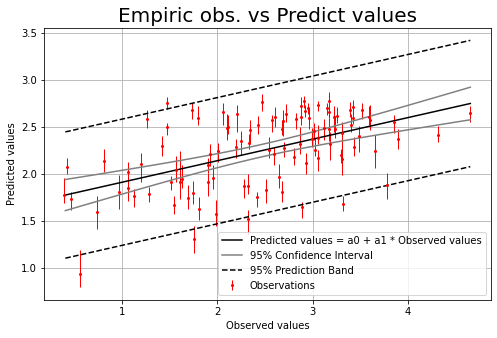

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: contr_b_MAX: mean - 0.137, median - 0.138, CI - [0.121-0.154]

SHAP-values for: contr_b_STD: mean - 0.079, median - 0.078, CI - [0.066-0.09]

SHAP-values for: mf_chm_MIN: mean - 0.071, median - 0.072, CI - [0.059-0.081]

SHAP-values for: r_MIN: mean - 0.194, median - 0.195, CI - [0.176-0.213]



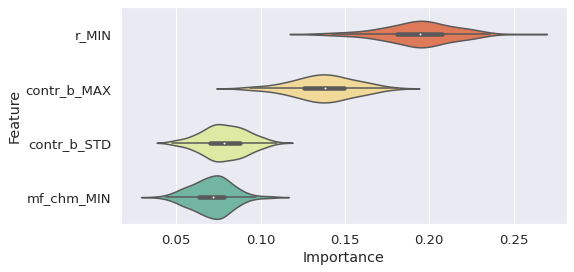

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['r_MIN', 'contr_b_MAX', 'contr_b_STD', 'mf_chm_MIN'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 47.635, median: 49.0,
 pred. interval (P(0.025)-P(0.975)): 36.0-49.0, 
 conf. interval (p-value=0.95): 47.194-49.0 
***
Aggregate bias statistic: 
 mean: -0.223, median: -0.219,
 pred. interval (P(0.025)-P(0.975)): -0.623-0.093, 
 conf. interval (p-value=0.95): -0.399--0.041 
***
Aggregate RMSE statistic: 
 mean: 0.8, median: 0.796, pred. interval (P(0.025)-P(0.975)): 0.606-1.011, 
 conf. interval (p-value=0.95): 0.701-0.901 
***
Aggregate MSE statistic: 
 mean: 0.652, median: 0.633, pred. interval (P(0.025)-P(0.975)): 0.367-1.022, 
 conf. interval (p-value=0.95): 0.492-0.813 
***
Aggregate R^2 statistic: 
 mean: 0.133, median: 0.189, pred. interval (P(0.025)-P(0.975)): -0.441-0.439, 
 conf. interval (p-value=0.95): -0.068-0.328 
***
Aggregate bias(%) statistic: 
 mean: -8.525, median: -8.602, pred. interval (P(0.025)-P(0.975)): -22.082-4.209, 
 conf. interval (p-value=0.95): -15.26

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

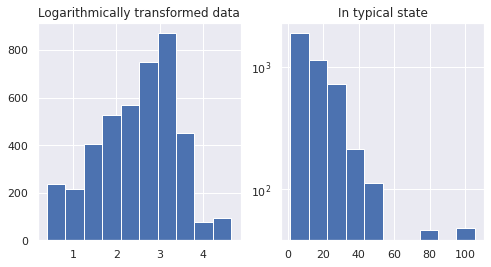

In [31]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [34]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 1, 2, 3, 4, 5])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1, 5, 10, 20, 40, 100])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

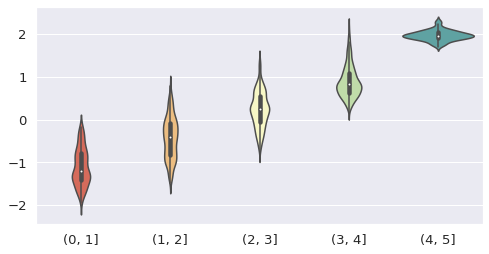

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

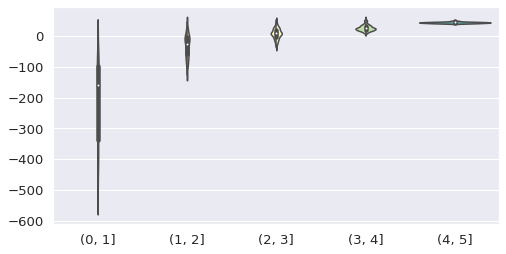

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

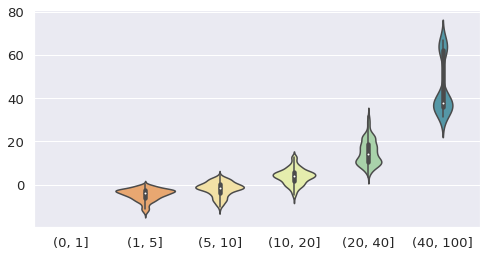

In [37]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

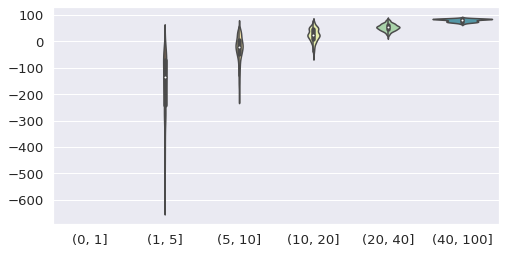

In [38]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [39]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [40]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [41]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.07333
[1]	validation_0-rmse:1.98857
[2]	validation_0-rmse:1.90647
[3]	validation_0-rmse:1.83604
[4]	validation_0-rmse:1.76602
[5]	validation_0-rmse:1.69944
[6]	validation_0-rmse:1.63804
[7]	validation_0-rmse:1.57809
[8]	validation_0-rmse:1.52152
[9]	validation_0-rmse:1.46467
[10]	validation_0-rmse:1.41430
[11]	validation_0-rmse:1.36722


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.32456
[13]	validation_0-rmse:1.28523
[14]	validation_0-rmse:1.24762
[15]	validation_0-rmse:1.20777
[16]	validation_0-rmse:1.16905
[17]	validation_0-rmse:1.13897
[18]	validation_0-rmse:1.10811
[19]	validation_0-rmse:1.07551
[20]	validation_0-rmse:1.04224
[21]	validation_0-rmse:1.01750
[22]	validation_0-rmse:0.99076
[23]	validation_0-rmse:0.96956
[24]	validation_0-rmse:0.94811
[25]	validation_0-rmse:0.92806
[26]	validation_0-rmse:0.90796
[27]	validation_0-rmse:0.88741
[28]	validation_0-rmse:0.87124
[29]	validation_0-rmse:0.85654
[30]	validation_0-rmse:0.83832
[31]	validation_0-rmse:0.82427
[32]	validation_0-rmse:0.81042
[33]	validation_0-rmse:0.79743
[34]	validation_0-rmse:0.78371
[35]	validation_0-rmse:0.77161
[36]	validation_0-rmse:0.76286
[37]	validation_0-rmse:0.75042
[38]	validation_0-rmse:0.73773
[39]	validation_0-rmse:0.72746
[40]	validation_0-rmse:0.71805
[41]	validation_0-rmse:0.70959
[42]	validation_0-rmse:0.70172
[43]	validation_0-rmse:0.69502
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 49


In [43]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

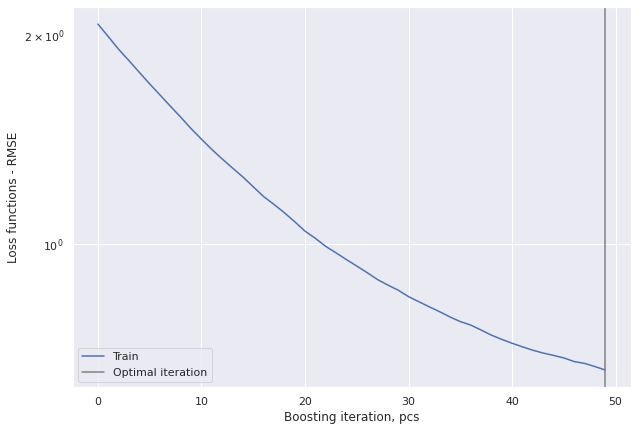

In [44]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [45]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.2
Relative bias(%):  -7.84
RMSE: 0.7
Relative RMSE(%):  26.655
MSE: 0.4
R square: 46.7%


In [46]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.605
Uncertainty
a0: 1.36+/-0.08
a1: 0.370+/-0.030


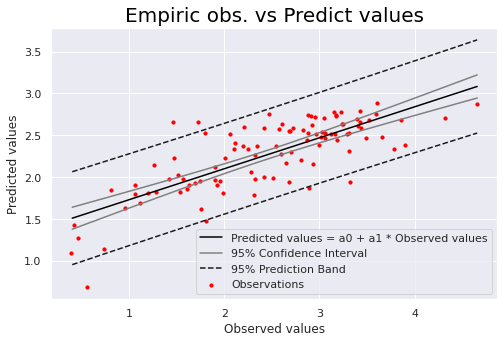

In [48]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

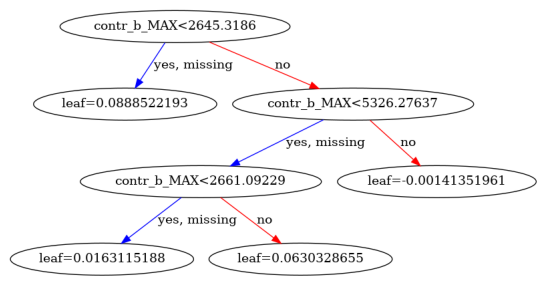

In [52]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

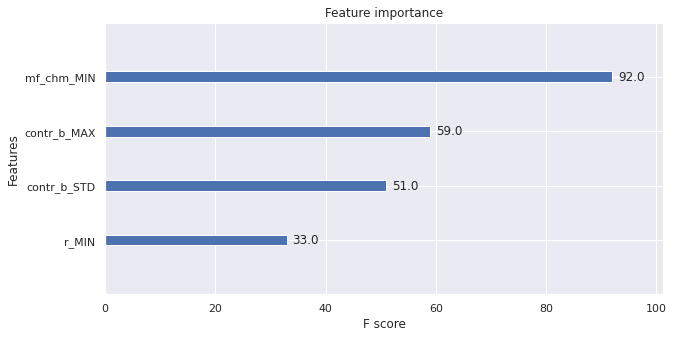

In [54]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

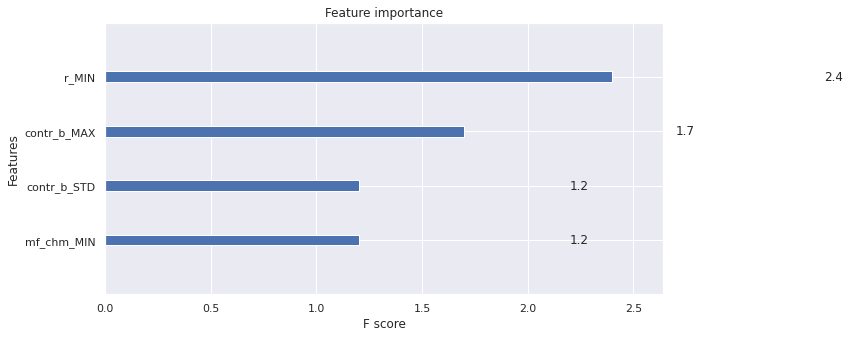

In [55]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

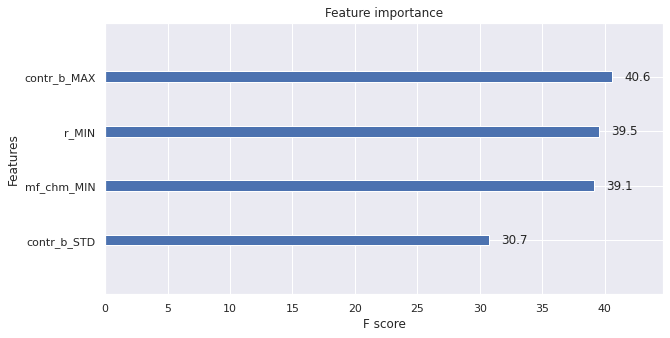

In [56]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [57]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


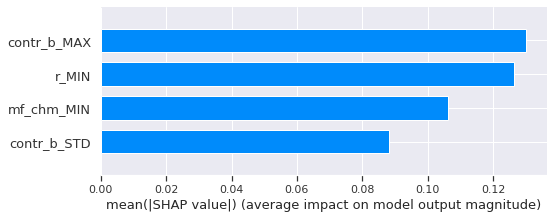

In [58]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

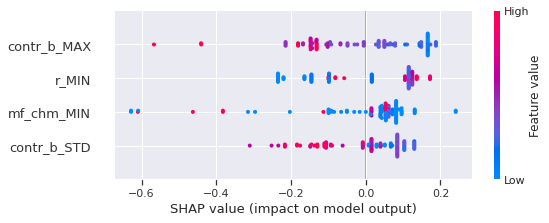

In [59]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

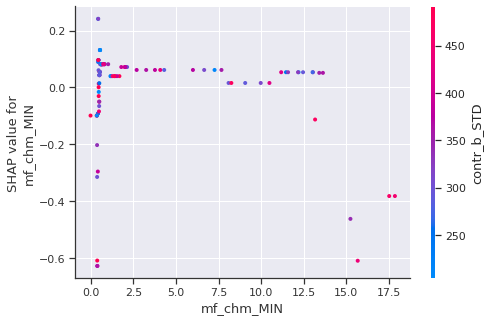

invalid value encountered in true_divide
invalid value encountered in true_divide


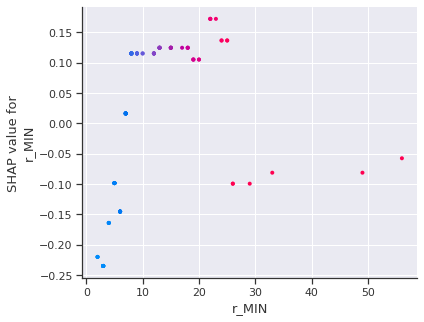

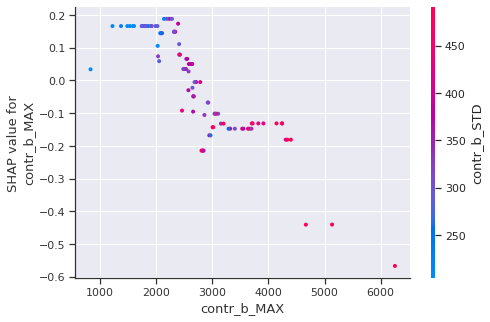

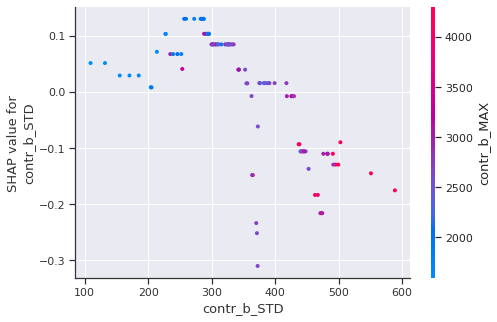

In [60]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [61]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/08_LN_Tag_Sr_vs_CHM_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/08_LN_Tag_Sr_vs_CHM_RGB_XGB_model.txt")